In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
import shap
import scikitplot as skplt
import math
from sklearn.feature_selection import RFECV
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
import lightgbm as lgb

In [2]:
from sklearn import set_config
set_config(transform_output = "pandas")

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from category_encoders import WOEEncoder 
from skopt import BayesSearchCV
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline, make_union
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import randint, uniform

In [3]:
# Import the train dataset
data_train = pd.read_csv(r"C:\KU Leuven\Advanced Analytics\Assignment\data\train.csv")
data_test = pd.read_csv(r"C:\KU Leuven\Advanced Analytics\Assignment\data\test.csv")
pd.set_option("display.max_columns", None)

In [4]:
# For training data
missing_count = data_train.isnull().sum() 
missing_data = pd.DataFrame({'Column Name': missing_count.index, 'Missing Count': missing_count.values})
missing_data = missing_data.sort_values(by='Missing Count', ascending=False)
missing_data = missing_data[missing_data['Missing Count'] > 0]
missing_data

Column Name  Missing Count
22  Dropped_calls_ratio              4
23           Usage_Band              4
25    call_cost_per_min              4

In [5]:
rows_with_missing_values_train = data_train[data_train.isnull().any(axis=1)]
print("Rows with Missing Values in training data:")
rows_with_missing_values_train

Rows with Missing Values in training data:


Gender   Age Connect_Date      L_O_S  Dropped_Calls    tariff Handset  \
1736      F  48.0     26/07/98  26.966667            2.0  Play 100   BS110   
3237      F  34.0     22/03/97  43.333333            2.0  Play 100   BS110   
3836      M  21.0     03/01/96  58.133333            2.0  Play 100   CAS30   
4301      F  22.0     08/08/98  26.533333            5.0  Play 100   CAS30   

      Peak_calls_Sum  Peak_mins_Sum  OffPeak_calls_Sum  OffPeak_mins_Sum  \
1736             0.0            0.0                0.0               0.0   
3237             0.0            0.0                0.0               0.0   
3836             0.0            0.0                0.0               0.0   
4301             0.0            0.0                0.0               0.0   

      Weekend_calls_Sum  Weekend_mins_Sum  International_mins_Sum  \
1736                0.0               0.0                     0.0   
3237                0.0               0.0                     0.0   
3836                0.0               0.0                     0.0   
4301                0.0               0.0                     0.0   

      Nat_call_cost_Sum  AvePeak  AveOffPeak  AveWeekend  National_calls  \
1736                0.0      0.0         0.0         0.0             0.0   
3237                0.0      0.0         0.0         0.0             0.0   
3836                0.0      0.0         0.0         0.0             0.0   
4301                0.0      0.0         0.0         0.0             0.0   

      National mins  AveNational  All_calls_mins  Dropped_calls_ratio  \
1736            0.0          0.0             0.0                  NaN   
3237            0.0          0.0             0.0                  NaN   
3836            0.0          0.0             0.0                  NaN   
4301            0.0          0.0             0.0                  NaN   

     Usage_Band  Mins_charge  call_cost_per_min  actual call cost  \
1736        NaN       -600.0                NaN               0.0   
3237        NaN       -600.0                NaN               0.0   
3836        NaN       -600.0                NaN               0.0   
4301        NaN       -600.0                NaN               0.0   

      Total_call_cost  Total_Cost Tariff_OK  average cost min  Peak ratio  \
1736              0.0       59.94        OK               0.5         0.0   
3237              0.0       59.94        OK               0.5         0.0   
3836              0.0       59.94        OK               0.5         0.0   
4301              0.0       59.94        OK               0.5         0.0   

      OffPeak ratio  Weekend ratio  Nat-InterNat Ratio high Dropped calls  \
1736            0.0            0.0                 0.0                  F   
3237            0.0            0.0                 0.0                  F   
3836            0.0            0.0                 0.0                  F   
4301            0.0            0.0                 0.0                  F   

     No Usage  target       id  
1736        T       0  K244380  
3237        T       0  K244320  
3836        T       1  K213590  
4301        T       1  K212820

In [6]:
# For test data
missing_count = data_test.isnull().sum() 
missing_data = pd.DataFrame({'Column Name': missing_count.index, 'Missing Count': missing_count.values})
missing_data = missing_data.sort_values(by='Missing Count', ascending=False)
missing_data = missing_data[missing_data['Missing Count'] > 0]
missing_data

Column Name  Missing Count
22  Dropped_calls_ratio              1
23           Usage_Band              1
25    call_cost_per_min              1

In [7]:
rows_with_missing_values_test = data_test[data_test.isnull().any(axis=1)]
print("\nRows with Missing Values in test data:")
rows_with_missing_values_test


Rows with Missing Values in test data:


Gender   Age Connect_Date      L_O_S  Dropped_Calls    tariff Handset  \
1389      F  34.0     07/09/98  24.858347            2.0  Play 100   BS110   

      Peak_calls_Sum  Peak_mins_Sum  OffPeak_calls_Sum  OffPeak_mins_Sum  \
1389             7.0       0.092169                2.0          12.29251   

      Weekend_calls_Sum  Weekend_mins_Sum  International_mins_Sum  \
1389                2.0          -3.12627               -3.215572   

      Nat_call_cost_Sum   AvePeak  AveOffPeak  AveWeekend  National_calls  \
1389          -5.011147  3.519628    2.912569     0.27729           -22.0   

      National mins  AveNational  All_calls_mins  Dropped_calls_ratio  \
1389      -2.090036     -0.10749      -20.274408                  NaN   

     Usage_Band  Mins_charge  call_cost_per_min  actual call cost  \
1389        NaN  -599.241325                NaN         -3.291928   

      Total_call_cost  Total_Cost Tariff_OK  average cost min  Peak ratio  \
1389         -2.74686   66.563274        OK          0.510543    0.001085   

      OffPeak ratio  Weekend ratio  Nat-InterNat Ratio high Dropped calls  \
1389      -0.017429      -0.003596           -0.004193                  F   

     No Usage       id  
1389        T  K689673

In [8]:
target_column = 'target'

# Separate features and target variable
X_train = data_train.drop(target_column, axis=1)
y_train = data_train[target_column]

X_test = data_test

In [9]:
stratified_splitter = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

for train_index, valid_index in stratified_splitter.split(X_train, y_train):
    X_train_split, X_valid_split = X_train.iloc[train_index], X_train.iloc[valid_index]
    y_train_split, y_valid_split = y_train.iloc[train_index], y_train.iloc[valid_index]
    # Now you can use X_train_split, y_train_split for training and X_valid_split, y_valid_split for validation

In [10]:
total_train_samples = X_train_split.shape[0] + X_valid_split.shape[0]
train_distribution_percentage = (X_train_split.shape[0]/ total_train_samples) * 100
validation_distribution_percentage = (X_valid_split.shape[0] / total_train_samples) * 100

print(f"Training Set Distribution: {train_distribution_percentage:.2f}% ({X_train_split.shape[0]} rows)")
print(f"Validation Set Distribution: {validation_distribution_percentage:.2f}% ({X_valid_split.shape[0]} rows)")

Training Set Distribution: 75.00% (3783 rows)
Validation Set Distribution: 25.00% (1261 rows)


In [11]:
X_train_split['Tariff_OK'] = np.where(X_train_split['Tariff_OK'] == 'OK', 1, 0)
X_valid_split['Tariff_OK'] = np.where(X_valid_split['Tariff_OK'] == 'OK', 1, 0)
X_test['Tariff_OK'] = np.where(X_test['Tariff_OK'] == 'OK', 1, 0)

C:\Users\Johnn\AppData\Local\Temp\ipykernel_30856\328505691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_split['Tariff_OK'] = np.where(X_train_split['Tariff_OK'] == 'OK', 1, 0)
C:\Users\Johnn\AppData\Local\Temp\ipykernel_30856\328505691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid_split['Tariff_OK'] = np.where(X_valid_split['Tariff_OK'] == 'OK', 1, 0)


In [12]:
# Custom transformer to remove prefix from column names
class RemovePrefixTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, prefixes):
        self.prefixes = prefixes

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        for prefix in self.prefixes:
            X.columns = [col.split(f'{prefix}__')[1] if f'{prefix}__' in col else col for col in X.columns]
        return X

In [13]:
X_train_split = X_train_split.copy()
X_train_split['Usage_Band'] = X_train_split['Usage_Band'].fillna(X_train_split['Usage_Band'].mode()[0])
print(X_train_split['Usage_Band'].unique())

# Handle missing values in 'Dropped_calls_ratio' by filling with the median
X_train_split['Dropped_calls_ratio'] = X_train_split['Dropped_calls_ratio'].fillna(X_train_split['Dropped_calls_ratio'].median())

# Handle missing values in 'call_cost_per_min' by filling with the median
X_train_split['call_cost_per_min'] = X_train_split['call_cost_per_min'].fillna(X_train_split['call_cost_per_min'].median())

['Med' 'MedLow' 'MedHigh' 'Low' 'High']


In [14]:
X_valid_split = X_valid_split.copy()

# Handle missing values in 'Dropped_calls_ratio' by filling with the median
X_valid_split['Dropped_calls_ratio'] = X_valid_split['Dropped_calls_ratio'].fillna(X_train_split['Dropped_calls_ratio'].median())

# Handle missing values in 'call_cost_per_min' by filling with the median
X_valid_split['call_cost_per_min'] = X_valid_split['call_cost_per_min'].fillna(X_train_split['call_cost_per_min'].median())

# Handle missing values in 'Usage_Band' for X_validation_split
X_valid_split['Usage_Band'] = X_valid_split['Usage_Band'].fillna(X_train_split['Usage_Band'].mode()[0])

In [15]:
X_test = X_test.copy()
X_test['Usage_Band'] = X_test['Usage_Band'].fillna(X_train_split['Usage_Band'].mode()[0])
print(X_test['Usage_Band'].unique())

# Handle missing values in 'Dropped_calls_ratio' by filling with the median
X_test['Dropped_calls_ratio'] = X_test['Dropped_calls_ratio'].fillna(X_train_split['Dropped_calls_ratio'].median())

# Handle missing values in 'call_cost_per_min' by filling with the median
X_test['call_cost_per_min'] = X_test['call_cost_per_min'].fillna(X_train_split['call_cost_per_min'].median())

['MedHigh' 'Med' 'High' 'MedLow' 'Low']


In [16]:
# # Binning of Dropped_Calls using Multiway Decision Tree 
# from sklearn.tree import DecisionTreeClassifier
# from sklearn import tree


# X_Dropped_Calls = data_train["Dropped_Calls"].values.reshape(-1,1)
# y_target = data_train["target"]

# dt_dropped_calls = DecisionTreeClassifier(max_depth=10, random_state=34, min_samples_split=0.5, splitter="best")
# dt_dropped_calls.fit(X_Dropped_Calls,y_target)

In [17]:
# tree.plot_tree(dt_dropped_calls, filled=True, class_names=["0","1"])
# plt.show()

In [18]:
# sns.barplot(data=data_train, x="Dropped_Calls", y="target")
# plt.show()

In [19]:
# # Binning of the Dropped_Calls continuous variable into above_11 = 1 and below_11 = 0 

# drop_calls_labels = ["0-11", "12-15"]


# drop_calls_ranges = [-0.1, 11.99, X_train_split["Dropped_Calls"].max()]


# X_train_split["binned_drop_calls"] = pd.cut(X_train_split["Dropped_Calls"],
#                                   bins=drop_calls_ranges,
#                                   labels=drop_calls_labels)

# X_train_split["above_11_dropped_calls"] = np.where(X_train_split["binned_drop_calls"]=="12-15",1,0)

# X_train_split.drop("binned_drop_calls",axis=1,inplace=True)

In [20]:
# # Binning of the Dropped_Calls continuous variable into above_11 = 1 and below_11 = 0 

# drop_calls_labels = ["0-11", "12-15"]


# drop_calls_ranges = [-0.1, 12, X_valid_split["Dropped_Calls"].max()]


# X_valid_split["binned_drop_calls"] = pd.cut(X_valid_split["Dropped_Calls"],
#                                   bins=drop_calls_ranges,
#                                   labels=drop_calls_labels)

# X_valid_split["above_11_dropped_calls"] = np.where(X_valid_split["binned_drop_calls"]=="12-15",1,0)

# X_valid_split.drop("binned_drop_calls",axis=1,inplace=True)

In [21]:
# # Binning of the Dropped_Calls continuous variable into above_11 = 1 and below_11 = 0 

# drop_calls_labels = ["0-11", "12-15"]


# drop_calls_ranges = [-0.1, 12, X_test["Dropped_Calls"].max()]


# X_test["binned_drop_calls"] = pd.cut(X_test["Dropped_Calls"],
#                                   bins=drop_calls_ranges,
#                                   labels=drop_calls_labels)

# X_test["above_11_dropped_calls"] = np.where(X_test["binned_drop_calls"]=="12-15",1,0)

# X_test.drop("binned_drop_calls",axis=1,inplace=True)

In [22]:
X_train_split.head()

Gender   Age Connect_Date      L_O_S  Dropped_Calls    tariff Handset  \
0      F  50.0     20/05/98  29.200000            2.0  Play 100   BS210   
1      M  25.0     16/12/96  46.533333            1.0   CAT 100  ASAD90   
3      F  59.0     13/07/98  27.400000            1.0    CAT 50   BS110   
4      F  25.0     08/01/99  21.433333            1.0  Play 300    WC95   
5      M  27.0     02/08/97  38.900000            8.0   CAT 100     S50   

   Peak_calls_Sum  Peak_mins_Sum  OffPeak_calls_Sum  OffPeak_mins_Sum  \
0            62.0     153.000000              185.0        438.600001   
1           146.0     718.800000               98.0        164.700000   
3            84.0     317.400001               57.0        161.699999   
4            14.0     309.600000              326.0        637.800000   
5           170.0     414.600001                2.0        342.300000   

   Weekend_calls_Sum  Weekend_mins_Sum  International_mins_Sum  \
0                4.0         29.000000              126.002615   
1                4.0         37.200000              251.580636   
3                0.0          0.000000               23.998036   
4                6.0         14.400000               87.051515   
5               21.0         38.399999               33.928464   

   Nat_call_cost_Sum    AvePeak  AveOffPeak  AveWeekend  National_calls  \
0           2.045727   2.467742    2.370811    7.250000           251.0   
1          41.072379   4.923288    1.680612    9.300000           248.0   
3          20.950771   3.778571    2.836842    0.000000           141.0   
4           0.000000  22.114286    1.956442    2.400000           346.0   
5          19.946237   2.438824  171.150000    1.828571           193.0   

   National mins  AveNational  All_calls_mins  Dropped_calls_ratio Usage_Band  \
0     620.600001     2.472510      746.602616             0.003984        Med   
1     920.700000     3.712500     1172.280636             0.002016        Med   
3     479.100000     3.397872      503.098036             0.003546     MedLow   
4     961.800000     2.779769     1048.851515             0.001445        Med   
5     795.300000     4.120725      829.228464             0.020725        Med   

   Mins_charge  call_cost_per_min  actual call cost  Total_call_cost  \
0    20.600001           9.930712          2.045727        52.446773   
1   320.700000          12.807103         41.072380       116.546571   
3   179.100000          11.624922         20.820235        28.019646   
4  -838.200000           9.403618          0.000000        34.820606   
5   195.300000          10.213127         19.946237        30.124776   

   Total_Cost  Tariff_OK  average cost min  Peak ratio  OffPeak ratio  \
0  112.386773          1          0.150531    0.246536       0.706735   
1  221.546571          1          0.188988    0.780710       0.178886   
3  111.419646          1          0.221467    0.662492       0.337508   
4  112.760606          1          0.107509    0.321896       0.663132   
5  135.124776          1          0.162952    0.521313       0.430404   

   Weekend ratio  Nat-InterNat Ratio high Dropped calls No Usage       id  
0       0.046729            0.203034                  F        F  K262360  
1       0.040404            0.273249                  F        F  K170160  
3       0.000000            0.050090                  F        F  K332460  
4       0.014972            0.090509                  F        F  K394220  
5       0.048284            0.042661                  F        F  K286620

In [23]:
# Define columns to drop
columns_to_drop = ['id', 'Connect_Date']

# Define columns for different pre-processing methods
one_hot_encode_columns = ['Gender', 'high Dropped calls', 'No Usage']
woe_encode_columns = ['tariff', 'Handset', 'Usage_Band'] 
# PCA_columns = ['Peak_calls_Sum', 'Peak_mins_Sum', 'OffPeak_calls_Sum', 'OffPeak_mins_Sum', 
#                'Weekend_calls_Sum', 'Weekend_mins_Sum', 'International_mins_Sum', 'Nat_call_cost_Sum', 
#                'National_calls', 'National mins', 'National mins', 'All_calls_mins', 'Dropped_calls_ratio', 
#                'Mins_charge', 'call_cost_per_min', 'actual call cost', 'Total_call_cost', 'Total_Cost', 
#                'Peak ratio', 'OffPeak ratio', 'Weekend ratio', 'Nat-InterNat Ratio'] #'average cost min'
# standard_columns = ['Age', 'L_O_S', 'Dropped_Calls']
# robust_columns = ['AvePeak', 'AveOffPeak', 'AveWeekend', 'AveNational']

# Define the PCA pipeline
pca_pipeline = Pipeline([
    ('standardscaler', StandardScaler()), # Standardize the data (needed for PCA)
    ('pca', PCA(n_components=0.80))       # Apply PCA to retain 80% of the variance
])

# Modify the preprocessing pipeline to apply PCA only on PCA columns
preprocessor = ColumnTransformer(
    transformers=[
        ('drop_columns', 'drop', columns_to_drop),
        ('one_hot_encode', OneHotEncoder(drop='first', sparse_output=False), one_hot_encode_columns),
        ('WOE_encode', WOEEncoder(), woe_encode_columns),
        # ('pca', pca_pipeline, PCA_columns), 
        # ('standardize1', StandardScaler(), standard_columns),
        # ('standardize2', RobustScaler(), robust_columns)
    ],
    remainder='passthrough'  # Keep the remaining columns as they are
)

# Build the preprocessing pipeline
preprocessing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('remove_prefix', RemovePrefixTransformer(prefixes=['one_hot_encode', 'WOE_encode', 'pca', 
                                                        'standardize1', 'standardize2', 'remainder']))
])


In [24]:
def calculate_profit_metric_2(y_true, y_test_proba, dataset=X_valid_split, top_k=20):
    # Reset indices of the dataset DataFrame
    dataset.reset_index(drop=True, inplace=True)
    
    # Convert y_probabilities to a DataFrame and then reset indices
    #proba_df = pd.DataFrame(proba, columns=['Prob_0', 'Prob_1'])
    proba_df = pd.DataFrame(y_test_proba, columns=['Prob_1'])
    proba_df.reset_index(drop=True, inplace=True)

    y_true.reset_index(drop=True, inplace=True)

    # Now concatenate the DataFrames
    profit_df = pd.concat([dataset[['average cost min']], proba_df, y_true], axis=1)

    # Sort concatenated_df by PROB_1 column in descending order
    profit_df_sorted = profit_df.sort_values(by='Prob_1', ascending=False)

    # Filter the top 20 rows
    top_k_rows = profit_df_sorted.head(top_k)

    # Filter the top 20 rows where target == 1 (actual churner) and sum the 'average cost min' values
    profit_at_top_k = top_k_rows[(top_k_rows[y_true.name] == 1) & (top_k_rows['Prob_1'] > 0.5)]['average cost min'].sum() 
    
    return profit_at_top_k

profit_scorer = make_scorer(calculate_profit_metric_2, needs_proba=True, greater_is_better=True)

c:\KU Leuven\Advanced Analytics\Assignment\.venv\lib\site-packages\sklearn\metrics\_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


In [25]:
def calculate_profit_metric_3(y_true, y_test_proba, dataset=X_valid_split):
    # Reset indices of the dataset DataFrame
    dataset.reset_index(drop=True, inplace=True)
    
    # Convert y_probabilities to a DataFrame and then reset indices
    #proba_df = pd.DataFrame(proba, columns=['Prob_0', 'Prob_1'])
    proba_df = pd.DataFrame(y_test_proba, columns=['Prob_1'])
    proba_df.reset_index(drop=True, inplace=True)

    y_true.reset_index(drop=True, inplace=True)

    # Now concatenate the DataFrames
    profit_df = pd.concat([dataset[['average cost min']], proba_df, y_true], axis=1)

    # Sort concatenated_df by PROB_1 column in descending order
    profit_df_sorted = profit_df.sort_values(by='Prob_1', ascending=False)

    # Filter the top 20 rows
    top_k_rows = profit_df_sorted.head(20)

    # Filter the top 20 rows where target == 1 (actual churner) and sum the 'average cost min' values
    profit_at_top_k = top_k_rows[(top_k_rows[y_true.name] == 1) & (top_k_rows['Prob_1'] > 0.5)]['average cost min'].sum() 
    
    return profit_at_top_k


profit_scorer = make_scorer(calculate_profit_metric_3, needs_proba=True, greater_is_better=True)

In [26]:


def custom_scorer(estimator, X, y):
    # Reset indices of the dataset DataFrame
    X.reset_index(drop=True, inplace=True)
    
    # Convert y_probabilities to a DataFrame and then reset indices
    #proba_df = pd.DataFrame(proba, columns=['Prob_0', 'Prob_1'])
    proba_df = pd.DataFrame(estimator.predict_proba(X)[:,1], columns=['Prob_1'])
    proba_df.reset_index(drop=True, inplace=True)

    y.reset_index(drop=True, inplace=True)
    
    profit_df = pd.concat([X[['average cost min']], proba_df, y], axis=1)

    profit_df_sorted = profit_df.sort_values(by='Prob_1', ascending=False)

    top_k_rows = profit_df_sorted.head(20)

    profit_at_top_k = top_k_rows[(top_k_rows[y.name] == 1) & (top_k_rows['Prob_1'] > 0.5)]['average cost min'].sum() 

    return profit_at_top_k



In [27]:
# lr = LogisticRegression()
# lr.fit(X_train_preprocessed,y_train_split)


In [28]:
# calculate_profit_metric_3(y_train_split,lr.predict_proba(X_train_preprocessed)[:,1])

In [29]:
# custom_scorer(lr, X_train_preprocessed, y_train_split)

In [30]:
X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train_split, y_train_split)
X_train_preprocessed.head()

Gender_M  high Dropped calls_T  No Usage_T    tariff   Handset  Usage_Band  \
0       0.0                   0.0         0.0  0.421050 -0.951537   -0.271153   
1       1.0                   0.0         0.0 -0.173919  2.982628   -0.271153   
3       0.0                   0.0         0.0 -0.016968  0.007327    0.756511   
4       0.0                   0.0         0.0 -0.485256 -2.908287   -0.271153   
5       1.0                   0.0         0.0 -0.173919 -0.135439   -0.271153   

    Age      L_O_S  Dropped_Calls  Peak_calls_Sum  Peak_mins_Sum  \
0  50.0  29.200000            2.0            62.0     153.000000   
1  25.0  46.533333            1.0           146.0     718.800000   
3  59.0  27.400000            1.0            84.0     317.400001   
4  25.0  21.433333            1.0            14.0     309.600000   
5  27.0  38.900000            8.0           170.0     414.600001   

   OffPeak_calls_Sum  OffPeak_mins_Sum  Weekend_calls_Sum  Weekend_mins_Sum  \
0              185.0        438.600001                4.0         29.000000   
1               98.0        164.700000                4.0         37.200000   
3               57.0        161.699999                0.0          0.000000   
4              326.0        637.800000                6.0         14.400000   
5                2.0        342.300000               21.0         38.399999   

   International_mins_Sum  Nat_call_cost_Sum    AvePeak  AveOffPeak  \
0              126.002615           2.045727   2.467742    2.370811   
1              251.580636          41.072379   4.923288    1.680612   
3               23.998036          20.950771   3.778571    2.836842   
4               87.051515           0.000000  22.114286    1.956442   
5               33.928464          19.946237   2.438824  171.150000   

   AveWeekend  National_calls  National mins  AveNational  All_calls_mins  \
0    7.250000           251.0     620.600001     2.472510      746.602616   
1    9.300000           248.0     920.700000     3.712500     1172.280636   
3    0.000000           141.0     479.100000     3.397872      503.098036   
4    2.400000           346.0     961.800000     2.779769     1048.851515   
5    1.828571           193.0     795.300000     4.120725      829.228464   

   Dropped_calls_ratio  Mins_charge  call_cost_per_min  actual call cost  \
0             0.003984    20.600001           9.930712          2.045727   
1             0.002016   320.700000          12.807103         41.072380   
3             0.003546   179.100000          11.624922         20.820235   
4             0.001445  -838.200000           9.403618          0.000000   
5             0.020725   195.300000          10.213127         19.946237   

   Total_call_cost  Total_Cost  Tariff_OK  average cost min  Peak ratio  \
0        52.446773  112.386773          1          0.150531    0.246536   
1       116.546571  221.546571          1          0.188988    0.780710   
3        28.019646  111.419646          1          0.221467    0.662492   
4        34.820606  112.760606          1          0.107509    0.321896   
5        30.124776  135.124776          1          0.162952    0.521313   

   OffPeak ratio  Weekend ratio  Nat-InterNat Ratio  
0       0.706735       0.046729            0.203034  
1       0.178886       0.040404            0.273249  
3       0.337508       0.000000            0.050090  
4       0.663132       0.014972            0.090509  
5       0.430404       0.048284            0.042661

In [31]:
correlation = X_train_split['Dropped_Calls'].corr(X_train_preprocessed['high Dropped calls_T'])
correlation

0.5016125220250545

In [32]:
correlation = X_train_preprocessed['Dropped_Calls'].corr(X_train_preprocessed['high Dropped calls_T'])
correlation

0.5016125220250545

In [33]:
X_train_split.head()

Gender   Age Connect_Date      L_O_S  Dropped_Calls    tariff Handset  \
0      F  50.0     20/05/98  29.200000            2.0  Play 100   BS210   
1      M  25.0     16/12/96  46.533333            1.0   CAT 100  ASAD90   
3      F  59.0     13/07/98  27.400000            1.0    CAT 50   BS110   
4      F  25.0     08/01/99  21.433333            1.0  Play 300    WC95   
5      M  27.0     02/08/97  38.900000            8.0   CAT 100     S50   

   Peak_calls_Sum  Peak_mins_Sum  OffPeak_calls_Sum  OffPeak_mins_Sum  \
0            62.0     153.000000              185.0        438.600001   
1           146.0     718.800000               98.0        164.700000   
3            84.0     317.400001               57.0        161.699999   
4            14.0     309.600000              326.0        637.800000   
5           170.0     414.600001                2.0        342.300000   

   Weekend_calls_Sum  Weekend_mins_Sum  International_mins_Sum  \
0                4.0         29.000000              126.002615   
1                4.0         37.200000              251.580636   
3                0.0          0.000000               23.998036   
4                6.0         14.400000               87.051515   
5               21.0         38.399999               33.928464   

   Nat_call_cost_Sum    AvePeak  AveOffPeak  AveWeekend  National_calls  \
0           2.045727   2.467742    2.370811    7.250000           251.0   
1          41.072379   4.923288    1.680612    9.300000           248.0   
3          20.950771   3.778571    2.836842    0.000000           141.0   
4           0.000000  22.114286    1.956442    2.400000           346.0   
5          19.946237   2.438824  171.150000    1.828571           193.0   

   National mins  AveNational  All_calls_mins  Dropped_calls_ratio Usage_Band  \
0     620.600001     2.472510      746.602616             0.003984        Med   
1     920.700000     3.712500     1172.280636             0.002016        Med   
3     479.100000     3.397872      503.098036             0.003546     MedLow   
4     961.800000     2.779769     1048.851515             0.001445        Med   
5     795.300000     4.120725      829.228464             0.020725        Med   

   Mins_charge  call_cost_per_min  actual call cost  Total_call_cost  \
0    20.600001           9.930712          2.045727        52.446773   
1   320.700000          12.807103         41.072380       116.546571   
3   179.100000          11.624922         20.820235        28.019646   
4  -838.200000           9.403618          0.000000        34.820606   
5   195.300000          10.213127         19.946237        30.124776   

   Total_Cost  Tariff_OK  average cost min  Peak ratio  OffPeak ratio  \
0  112.386773          1          0.150531    0.246536       0.706735   
1  221.546571          1          0.188988    0.780710       0.178886   
3  111.419646          1          0.221467    0.662492       0.337508   
4  112.760606          1          0.107509    0.321896       0.663132   
5  135.124776          1          0.162952    0.521313       0.430404   

   Weekend ratio  Nat-InterNat Ratio high Dropped calls No Usage       id  
0       0.046729            0.203034                  F        F  K262360  
1       0.040404            0.273249                  F        F  K170160  
3       0.000000            0.050090                  F        F  K332460  
4       0.014972            0.090509                  F        F  K394220  
5       0.048284            0.042661                  F        F  K286620

In [34]:
# sum(X_train_split["above_11_dropped_calls"]==X_train_preprocessed["high Dropped calls_T"])

In [35]:
X_valid_preprocessed = preprocessing_pipeline.transform(X_valid_split)
X_valid_preprocessed.head()

Gender_M  high Dropped calls_T  No Usage_T    tariff   Handset  Usage_Band  \
2       0.0                   0.0         0.0 -0.016968 -2.908287    0.756511   
6       1.0                   0.0         0.0 -0.173919  0.007327   -0.271153   
7       0.0                   1.0         0.0 -0.016968 -0.135439    0.756511   
8       1.0                   0.0         0.0  0.033322 -0.135439    0.008762   
9       0.0                   0.0         0.0  0.033322 -1.660876    0.008762   

    Age      L_O_S  Dropped_Calls  Peak_calls_Sum  Peak_mins_Sum  \
2  46.0  38.066667            1.0           160.0     322.800000   
6  39.0  32.200000           10.0           236.0     528.000000   
7  28.0  47.600000           14.0           221.0     332.400000   
8  23.0  50.900000            3.0           658.0    1516.200001   
9  56.0  11.733333            8.0           300.0     742.800000   

   OffPeak_calls_Sum  OffPeak_mins_Sum  Weekend_calls_Sum  Weekend_mins_Sum  \
2                7.0             123.9                0.0          0.000000   
6               32.0              67.5               15.0         62.400000   
7               14.0             128.7                7.0         14.400000   
8               17.0              92.4               54.0         88.200001   
9              100.0             544.8                9.0        112.200000   

   International_mins_Sum  Nat_call_cost_Sum   AvePeak  AveOffPeak  \
2               91.584877          21.575073  2.017500   17.700000   
6               24.846683           7.541785  2.237288    2.109375   
7               76.898743          21.043392  1.504072    9.192857   
8              400.284283          47.036139  2.304255    5.435294   
9              262.890611          15.291166  2.476000    5.448000   

   AveWeekend  National_calls  National mins  AveNational  All_calls_mins  \
2    0.000000           167.0     446.700000     2.674850      538.284877   
6    4.160000           283.0     657.900000     2.324735      682.746683   
7    2.057143           242.0     475.500000     1.964876      552.398743   
8    1.633333           729.0    1696.800002     2.327572     2097.084285   
9   12.466667           409.0    1399.800000     3.422494     1662.690611   

   Dropped_calls_ratio  Mins_charge  call_cost_per_min  actual call cost  \
2             0.002994   146.700000          12.226326         17.936021   
6             0.017668    57.900000          13.025536          7.541785   
7             0.028926   175.500000          11.990536         21.043391   
8             0.002058   496.800002           9.467822         47.036139   
9             0.009780   199.800000           7.653236         15.291166   

   Total_call_cost  Total_Cost  Tariff_OK  average cost min  Peak ratio  \
2        45.411484  128.811484          1          0.239300    0.722633   
6        14.995790  119.995790          1          0.175754    0.802554   
7        44.113014  127.513014          1          0.230835    0.699054   
8       167.121424  317.121424          1          0.151220    0.893564   
9        94.158349  244.158349          1          0.146845    0.530647   

   OffPeak ratio  Weekend ratio  Nat-InterNat Ratio  
2       0.277367       0.000000            0.205025  
6       0.102599       0.094847            0.037767  
7       0.270662       0.030284            0.161722  
8       0.054455       0.051980            0.235905  
9       0.389198       0.080154            0.187806

In [36]:
X_test_preprocessed = preprocessing_pipeline.transform(X_test)
X_test_preprocessed.head()

Gender_M  high Dropped calls_T  No Usage_T    tariff   Handset  Usage_Band  \
0       0.0                   0.0         0.0  0.033322 -2.908287    0.008762   
1       0.0                   0.0         0.0 -0.485256  0.007327   -0.271153   
2       0.0                   0.0         0.0  0.033322 -1.896285    0.111953   
3       0.0                   0.0         0.0  0.033322 -2.908287    0.008762   
4       0.0                   0.0         0.0 -0.173919 -2.908287   -0.271153   

    Age      L_O_S  Dropped_Calls  Peak_calls_Sum  Peak_mins_Sum  \
0  20.0  55.582251            3.0           513.0    1075.667903   
1  54.0  32.067010            0.0            13.0     378.078657   
2  28.0  26.621954            0.0          1000.0    2064.343139   
3  26.0  27.652735            5.0           122.0     999.111887   
4  34.0  25.479355            0.0           164.0     742.647381   

   OffPeak_calls_Sum  OffPeak_mins_Sum  Weekend_calls_Sum  Weekend_mins_Sum  \
0              110.0        189.982227                8.0          5.017969   
1               93.0        551.817423                8.0         17.593417   
2               90.0        152.731006               10.0         23.907633   
3              126.0        358.760706                0.0          3.024655   
4               73.0        141.180280               11.0         47.034972   

   International_mins_Sum  Nat_call_cost_Sum    AvePeak  AveOffPeak  \
0               25.872662          10.766282   9.598648    0.128126   
1              138.267040           0.570547  33.547208    3.963993   
2              492.202970          91.460036   2.945673    4.322230   
3              174.998124          11.509839  11.984087   -1.064854   
4               80.927142          27.402638   8.875573    4.853664   

   AveWeekend  National_calls  National mins  AveNational  All_calls_mins  \
0    2.044552           609.0    1397.818565     2.414391     1382.461509   
1    5.503624            87.0    1009.005349    11.445797     1085.179552   
2    2.370283          1020.0    2205.502075     2.415233     2695.044238   
3    9.663168           241.0    1324.338426     5.814761     1524.022052   
4    3.021928           281.0     794.535641     3.952980      887.649410   

   Dropped_calls_ratio  Mins_charge  call_cost_per_min  actual call cost  \
0             0.002272   120.133757           8.933287          9.409262   
1             0.001823  -709.894563          11.931697          2.739423   
2             0.002011  1005.776446           9.560903         95.406158   
3             0.011887   124.587195           8.398145         14.464628   
4             0.000796   214.172528          12.766109         34.757126   

   Total_call_cost  Total_Cost  Tariff_OK  average cost min  Peak ratio  \
0         9.195247  167.242853          1          0.116924    0.824189   
1        56.143013  136.404621          1          0.120457    0.415020   
2       248.197508  397.739114          1          0.149435    0.960100   
3        55.896596  196.789012          1          0.137372    0.745483   
4        62.593087  160.450386          1          0.180704    0.771754   

   OffPeak ratio  Weekend ratio  Nat-InterNat Ratio  
0       0.173365       0.009823            0.020349  
1       0.532898       0.022391            0.124480  
2       0.034434       0.006660            0.225763  
3       0.263256       0.005870            0.108872  
4       0.166995       0.056390            0.090896

In [37]:
smt = SMOTE(random_state=34)
X_train_preprocessed_smote, y_train_smote = smt.fit_resample(X_train_preprocessed,y_train_split)

In [38]:
Counter(y_train_split)

Counter({0: 3225, 1: 558})

In [39]:
Counter(y_train_smote)

Counter({0: 3225, 1: 3225})

In [40]:
X_train_preprocessed_smote.head()

Gender_M  high Dropped calls_T  No Usage_T    tariff   Handset  Usage_Band  \
0       0.0                   0.0         0.0  0.421050 -0.951537   -0.271153   
1       1.0                   0.0         0.0 -0.173919  2.982628   -0.271153   
2       0.0                   0.0         0.0 -0.016968  0.007327    0.756511   
3       0.0                   0.0         0.0 -0.485256 -2.908287   -0.271153   
4       1.0                   0.0         0.0 -0.173919 -0.135439   -0.271153   

    Age      L_O_S  Dropped_Calls  Peak_calls_Sum  Peak_mins_Sum  \
0  50.0  29.200000            2.0            62.0     153.000000   
1  25.0  46.533333            1.0           146.0     718.800000   
2  59.0  27.400000            1.0            84.0     317.400001   
3  25.0  21.433333            1.0            14.0     309.600000   
4  27.0  38.900000            8.0           170.0     414.600001   

   OffPeak_calls_Sum  OffPeak_mins_Sum  Weekend_calls_Sum  Weekend_mins_Sum  \
0              185.0        438.600001                4.0         29.000000   
1               98.0        164.700000                4.0         37.200000   
2               57.0        161.699999                0.0          0.000000   
3              326.0        637.800000                6.0         14.400000   
4                2.0        342.300000               21.0         38.399999   

   International_mins_Sum  Nat_call_cost_Sum    AvePeak  AveOffPeak  \
0              126.002615           2.045727   2.467742    2.370811   
1              251.580636          41.072379   4.923288    1.680612   
2               23.998036          20.950771   3.778571    2.836842   
3               87.051515           0.000000  22.114286    1.956442   
4               33.928464          19.946237   2.438824  171.150000   

   AveWeekend  National_calls  National mins  AveNational  All_calls_mins  \
0    7.250000           251.0     620.600001     2.472510      746.602616   
1    9.300000           248.0     920.700000     3.712500     1172.280636   
2    0.000000           141.0     479.100000     3.397872      503.098036   
3    2.400000           346.0     961.800000     2.779769     1048.851515   
4    1.828571           193.0     795.300000     4.120725      829.228464   

   Dropped_calls_ratio  Mins_charge  call_cost_per_min  actual call cost  \
0             0.003984    20.600001           9.930712          2.045727   
1             0.002016   320.700000          12.807103         41.072380   
2             0.003546   179.100000          11.624922         20.820235   
3             0.001445  -838.200000           9.403618          0.000000   
4             0.020725   195.300000          10.213127         19.946237   

   Total_call_cost  Total_Cost  Tariff_OK  average cost min  Peak ratio  \
0        52.446773  112.386773          1          0.150531    0.246536   
1       116.546571  221.546571          1          0.188988    0.780710   
2        28.019646  111.419646          1          0.221467    0.662492   
3        34.820606  112.760606          1          0.107509    0.321896   
4        30.124776  135.124776          1          0.162952    0.521313   

   OffPeak ratio  Weekend ratio  Nat-InterNat Ratio  
0       0.706735       0.046729            0.203034  
1       0.178886       0.040404            0.273249  
2       0.337508       0.000000            0.050090  
3       0.663132       0.014972            0.090509  
4       0.430404       0.048284            0.042661

In [41]:
stratified_splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=5)

# Logistic

## Logistic with Lasso Regularization and SMOTE for target imbalance

In [39]:
# Specify L1 regularization
#liblinear is the optimization method used to estimate the coefficients. liblinear is need for l1
lr = LogisticRegression(solver='liblinear', penalty="l1",random_state=8) 

param_grid = {
    'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
}

scoring = {"Profit": custom_scorer, "AUC": "roc_auc"}

# Instantiate the GridSearchCV object and run the search
# The GridSeachCV object, when fitted on the data, creates 5-fold splits for every C value and calculates a default scoring metric
searcher_lasso = GridSearchCV(lr, param_grid, cv=stratified_splitter, scoring=scoring, refit="Profit")
searcher_lasso.fit(X_train_preprocessed_smote, y_train_smote)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(penalty='l1', random_state=8,
                                          solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             refit='Profit',
             scoring={'AUC': 'roc_auc',
                      'Profit': <function custom_scorer at 0x00000243E03E5630>})

In [40]:
searcher_lasso.best_params_

{'C': 0.01}

In [43]:
lr = LogisticRegression(solver='liblinear', penalty="l1",random_state=8,C=0.01) 
lr.fit(X_train_preprocessed_smote,y_train_smote)

LogisticRegression(C=0.01, penalty='l1', random_state=8, solver='liblinear')

In [44]:
lr.coef_

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.01991748e+00,  4.85000146e-01,
        -2.13042212e-02, -4.66682939e-05,  6.19705460e-03,
         6.59582458e-02,  9.87557582e-03, -2.08150754e-01,
        -5.32990255e-02,  2.81953447e-01, -2.44016262e-02,
         5.04650305e-03,  0.00000000e+00,  0.00000000e+00,
        -1.91612475e-01,  0.00000000e+00]])

In [45]:
mask_lasso = abs(lr.coef_) > 0
mask_lasso.shape
mask_lasso = mask_lasso[0]
mask_lasso

array([False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True, False])

In [47]:
reduced_train_lasso= X_train_preprocessed_smote.loc[:,mask_lasso]
reduced_test_lasso = X_valid_preprocessed.loc[:,mask_lasso]
reduced_train_lasso.head()

Handset  Usage_Band      pca0      pca1      pca2      pca3      pca4  \
0 -0.951537   -0.271153 -2.568681  2.103107 -0.970825  0.336637  0.443232   
1  2.982628   -0.271153  0.727921 -1.376481 -0.489993  1.714494  0.402646   
2  0.007327    0.756511 -2.222597 -1.437766 -2.204695 -0.437399  0.605702   
3 -2.908287   -0.271153 -2.209708  3.358562 -1.820766 -0.961110 -0.250943   
4 -0.135439   -0.271153 -1.667525 -0.510305 -0.414703 -1.002194  1.142253   

        Age     L_O_S  Dropped_Calls   AvePeak  AveOffPeak  Tariff_OK  
0  1.479855 -0.315520      -0.198503 -0.108087   -0.148181          1  
1 -0.491319  0.917762      -0.491152  0.507529   -0.330827          1  
2  2.189477 -0.443591      -0.491152  0.220543   -0.024856          1  
3 -0.491319 -0.868125      -0.491152  4.817387   -0.257835          1  
4 -0.333625  0.374644       1.557391 -0.115337   44.515591          1

In [48]:
lr.fit(reduced_train_lasso,y_train_smote)

LogisticRegression(C=0.01, penalty='l1', random_state=8, solver='liblinear')

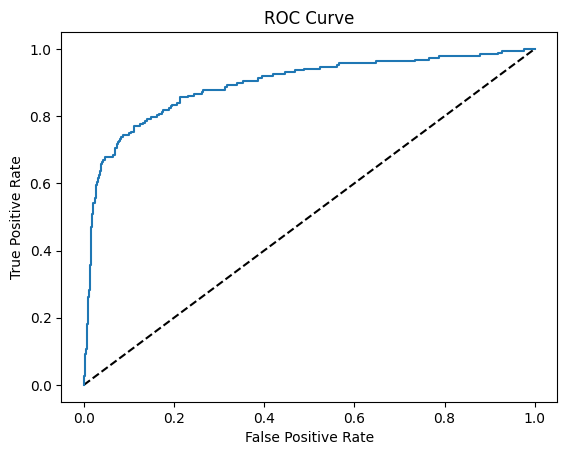

0.8925950268375505
[[959 115]
 [ 46 141]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1074
           1       0.55      0.75      0.64       187

    accuracy                           0.87      1261
   macro avg       0.75      0.82      0.78      1261
weighted avg       0.89      0.87      0.88      1261



In [49]:
 #Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_valid_split, lr.predict_proba(reduced_test_lasso)[:,1])

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate roc_auc_score
print(roc_auc_score(y_valid_split, lr.predict_proba(reduced_test_lasso)[:,1]))

# Calculate the confusion matrix
print(confusion_matrix(y_valid_split,  lr.predict(reduced_test_lasso)))

# Calculate the classification report
print(classification_report(y_valid_split,  lr.predict(reduced_test_lasso)))

In [50]:
calculate_profit_metric_3(y_valid_split, lr.predict_proba(X_valid_preprocessed.loc[: ,reduced_test_lasso.columns])[:,1])

3.996343

In [48]:
data = {'ID': X_test["id"], 'PRED': lr.predict_proba(X_test_preprocessed.loc[:, reduced_test_lasso.columns])[:,1]}

# Create DataFrame from the dictionary
df = pd.DataFrame(data)


# Display the DataFrame
file_path = 'C:\KU Leuven\Advanced Analytics\Assignment\predictions_pr_lr_lasso.csv'  # Specify the file path where you want to save the CSV file
df.to_csv(file_path, index=False)

In [ ]:
# 7th 5.357857 0.887996

## RFECV for Feature Selection 

In [161]:
# Create RFECV estimator

rfecv = RFECV(LogisticRegression(random_state=8,max_iter=1000),cv=stratified_splitter, scoring="roc_auc")

param_grid = {
    'estimator__C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
   # 'min_features_to_select' : [1,2,3,4,5,6,7,8,9,10]
}

scoring = {"Profit": custom_scorer, "AUC": "roc_auc"}

grid_search_rfe_lr = GridSearchCV(rfecv, param_grid, cv=stratified_splitter, scoring=scoring, refit="Profit")

grid_search_rfe_lr.fit(X_train_preprocessed_smote, y_train_smote)

c:\KU Leuven\Advanced Analytics\Assignment\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\KU Leuven\Advanced Analytics\Assignment\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\KU Leuven\Advanced Analytics\Assignment\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\KU Leuven\Advanced Analytics\Assignment\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\KU Leuven\Advanced Analytics\Assignment\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\KU Leuven\Advanced Ana

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RFECV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                             estimator=LogisticRegression(max_iter=1000,
                                                          random_state=8),
                             scoring='roc_auc'),
             param_grid={'estimator__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             refit='Profit',
             scoring={'AUC': 'roc_auc',
                      'Profit': <function custom_scorer at 0x0000025BA081D5A0>})

In [162]:
grid_search_rfe_lr.best_params_

{'estimator__C': 0.001}

In [163]:
mask_rfe_lr = grid_search_rfe_lr.best_estimator_.get_support()
mask_rfe_lr

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True, False])

In [164]:
reduced_train_rfe_lr = X_train_preprocessed_smote.loc[:,mask_rfe_lr]
reduced_test_rfe_lr = X_valid_preprocessed.loc[:,mask_rfe_lr]

In [165]:
reduced_train_rfe_lr.head()

Gender_M  high Dropped calls_T    tariff   Handset  Usage_Band      pca0  \
0       0.0                   0.0  0.421050 -0.951537   -0.271153 -2.568681   
1       1.0                   0.0 -0.173919  2.982628   -0.271153  0.727921   
2       0.0                   0.0 -0.016968  0.007327    0.756511 -2.222597   
3       0.0                   0.0 -0.485256 -2.908287   -0.271153 -2.209708   
4       1.0                   0.0 -0.173919 -0.135439   -0.271153 -1.667525   

       pca1      pca2      pca3      pca4       Age     L_O_S  Dropped_Calls  \
0  2.103107 -0.970825  0.336637  0.443232  1.479855 -0.315520      -0.198503   
1 -1.376481 -0.489993  1.714494  0.402646 -0.491319  0.917762      -0.491152   
2 -1.437766 -2.204695 -0.437399  0.605702  2.189477 -0.443591      -0.491152   
3  3.358562 -1.820766 -0.961110 -0.250943 -0.491319 -0.868125      -0.491152   
4 -0.510305 -0.414703 -1.002194  1.142253 -0.333625  0.374644       1.557391   

    AvePeak  AveNational  Tariff_OK  
0 -0.108087    -0.219327          1  
1  0.507529     0.337205          1  
2  0.220543     0.195994          1  
3  4.817387    -0.081423          1  
4 -0.115337     0.520425          1

In [181]:
lr_rfe = LogisticRegression(random_state=8, C=0.001)
lr_rfe.fit(reduced_train_rfe_lr,y_train_smote)

LogisticRegression(C=0.001, random_state=8)

In [182]:
calculate_profit_metric_2(y_valid_split,lr_rfe.predict_proba(reduced_test_rfe_lr)[:,1])

3.843213

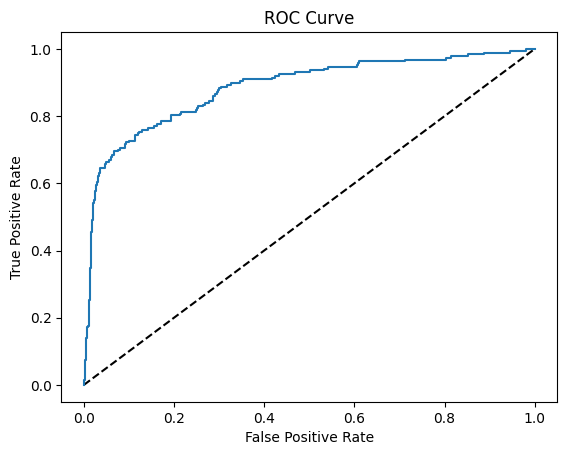

0.8837819536143557
[[951 123]
 [ 49 138]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1074
           1       0.53      0.74      0.62       187

    accuracy                           0.86      1261
   macro avg       0.74      0.81      0.77      1261
weighted avg       0.89      0.86      0.87      1261



In [183]:
 #Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_valid_split, lr_rfe.predict_proba(reduced_test_rfe_lr)[:,1])

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate roc_auc_score
print(roc_auc_score(y_valid_split, lr_rfe.predict_proba(reduced_test_rfe_lr)[:,1]))

# Calculate the confusion matrix
print(confusion_matrix(y_valid_split,  lr_rfe.predict(reduced_test_rfe_lr)))

# Calculate the classification report
print(classification_report(y_valid_split,  lr_rfe.predict(reduced_test_rfe_lr)))

In [57]:
data = {'ID': X_test["id"], 'PRED': lr_rfe.predict_proba(X_test_preprocessed.loc[:,reduced_test_rfe_lr.columns])[:,1]}

# Create DataFrame from the dictionary
df = pd.DataFrame(data)

# Display the DataFrame
file_path = 'C:\KU Leuven\Advanced Analytics\Assignment\predictions_pr_lr_rfecv.csv'  # Specify the file path where you want to save the CSV file
df.to_csv(file_path, index=False)

In [ ]:
 #7th 5.393956 0.880692 

## Step Forward Selection 

In [324]:
# Specify L2 regularization
#liblinear is the optimization method used to estimate the coefficients. liblinear is need for l1

lr = LogisticRegression(random_state=8, max_iter=1000)

pipeline = Pipeline(
    [
     ('selector',SequentialFeatureSelector(lr,cv=stratified_splitter,scoring=profit_scorer)),
     ('model',lr)
    ]
)

param_grid = {
    'model__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'selector__n_features_to_select' : [1,2,3,4,5,6,7,8,9,10,11]

}

scoring = {"Profit": custom_scorer, "AUC": "roc_auc"}

# Instantiate the GridSearchCV object and run the search
# The GridSeachCV object, when fitted on the data, creates 5-fold splits for every C value and calculates a default scoring metric
searcher_ridge = RandomizedSearchCV(pipeline, param_grid, cv=stratified_splitter, scoring=scoring, refit="Profit", random_state=33)
searcher_ridge.fit(X_train_preprocessed_smote, y_train_smote)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('selector',
                                              SequentialFeatureSelector(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                                                                        estimator=LogisticRegression(max_iter=1000,
                                                                                                     random_state=8),
                                                                        scoring=make_scorer(calculate_profit_metric_3, response_method='predict_proba'))),
                                             ('model',
                                              LogisticRegression(max_iter=1000,
                                                                 random_state=8))]),
                   param_distributions={'model__C': [0.001, 0.01, 0.1, 1, 10,
                                                     100, 1000],
                                        'selector__n_features_to_select': [1, 2,
                                                                           3, 4,
                                                                           5, 6,
                                                                           7, 8,
                                                                           9,
                                                                           10,
                                                                           11]},
                   random_state=33, refit='Profit',
                   scoring={'AUC': 'roc_auc',
                            'Profit': <function custom_scorer at 0x0000025BA081D5A0>})

In [325]:
searcher_ridge.best_params_

{'selector__n_features_to_select': 6, 'model__C': 1000}

In [326]:
mask_step_ridge = searcher_ridge.best_estimator_.named_steps['selector'].support_
mask_step_ridge

array([ True, False,  True, False, False, False, False, False,  True,
       False,  True, False, False,  True, False, False, False,  True,
       False, False])

In [327]:
reduced_train_ridge_step = X_train_preprocessed_smote.loc[:,mask_step_ridge]
reduced_test_ridge_step = X_valid_preprocessed.loc[:,mask_step_ridge]
reduced_train_ridge_step.head()

Gender_M  No Usage_T      pca2      pca4  Dropped_Calls  AveNational
0       0.0         0.0 -0.970825  0.443232      -0.198503    -0.219327
1       1.0         0.0 -0.489993  0.402646      -0.491152     0.337205
2       0.0         0.0 -2.204695  0.605702      -0.491152     0.195994
3       0.0         0.0 -1.820766 -0.250943      -0.491152    -0.081423
4       1.0         0.0 -0.414703  1.142253       1.557391     0.520425

In [328]:
lr_step = LogisticRegression(random_state=8, C=1000)
lr_step.fit(reduced_train_ridge_step,y_train_smote)

LogisticRegression(C=1000, random_state=8)

In [329]:
calculate_profit_metric_2(y_valid_split,lr_step.predict_proba(reduced_test_ridge_step)[:,1])

2.8029100000000002

In [330]:
calculate_profit_metric_3(y_valid_split,lr_step.predict_proba(reduced_test_ridge_step)[:,1])

2.8029100000000002

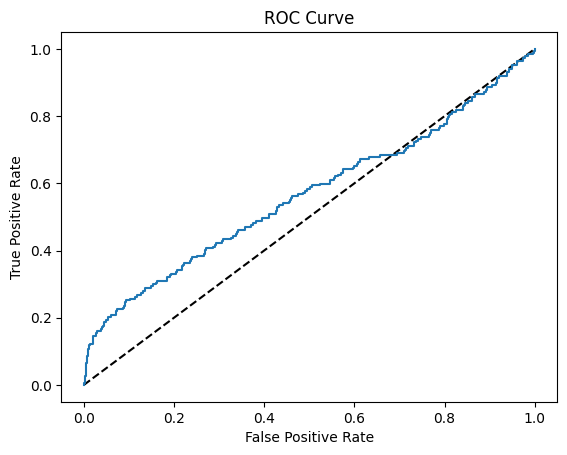

0.5651868670271561
[[747 327]
 [108  79]]
              precision    recall  f1-score   support

           0       0.87      0.70      0.77      1074
           1       0.19      0.42      0.27       187

    accuracy                           0.66      1261
   macro avg       0.53      0.56      0.52      1261
weighted avg       0.77      0.66      0.70      1261



In [331]:
 #Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_valid_split, lr_step.predict_proba(reduced_test_ridge_step)[:,1])

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate roc_auc_score
print(roc_auc_score(y_valid_split, lr_step.predict_proba(reduced_test_ridge_step)[:,1]))

# Calculate the confusion matrix
print(confusion_matrix(y_valid_split,  lr_step.predict(reduced_test_ridge_step)))

# Calculate the classification report
print(classification_report(y_valid_split,  lr_step.predict(reduced_test_ridge_step)))

In [323]:
data = {'ID': X_test["id"], 'PRED': lr_step.predict_proba(X_test_preprocessed.loc[:,reduced_test_ridge_step.columns])[:,1]}

# Create DataFrame from the dictionary
df = pd.DataFrame(data)

# Display the DataFrame
file_path = 'C:\KU Leuven\Advanced Analytics\Assignment\predictions_pr_lr_step.csv'  # Specify the file path where you want to save the CSV file
df.to_csv(file_path, index=False)

In [ ]:
# 20th 2.233638 0.889075


## K-Best 

In [171]:
# Specify L2 regularization
#liblinear is the optimization method used to estimate the coefficients. liblinear is need for l1

lr_k_best = LogisticRegression(random_state=9, max_iter=1000)

pipeline = Pipeline(
    [
     ('selector',SelectKBest(f_regression)),
     ('model',lr_k_best)
    ]
)

param_grid = {
    'model__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'selector__k' : [1,2,3,4,5,6,7,8,9,10,11]

}

scoring = {"Profit":custom_scorer, "AUC": "roc_auc"}

# kf = KFold(n_splits=5, shuffle=True, random_state=5)

# Instantiate the GridSearchCV object and run the search
# The GridSeachCV object, when fitted on the data, creates 5-fold splits for every C value and calculates a default scoring metric
searcher_k_best = GridSearchCV(pipeline, param_grid, cv=stratified_splitter, scoring=scoring, refit="Profit")
searcher_k_best.fit(X_train_preprocessed_smote, y_train_smote)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('selector',
                                        SelectKBest(score_func=<function f_regression at 0x0000025B9FD2E4D0>)),
                                       ('model',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=9))]),
             param_grid={'model__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'selector__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]},
             refit='Profit',
             scoring={'AUC': 'roc_auc',
                      'Profit': <function custom_scorer at 0x0000025BA081D5A0>})

In [172]:
searcher_k_best.best_params_

{'model__C': 0.001, 'selector__k': 3}

In [173]:
mask_k_best = searcher_k_best.best_estimator_.named_steps['selector'].get_support()
mask_k_best

array([False,  True, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [175]:
reduced_train_k_best = X_train_preprocessed_smote.loc[:,mask_k_best]
reduced_test_k_best = X_valid_preprocessed.loc[:,mask_k_best]
reduced_train_k_best.head()

high Dropped calls_T   Handset  Usage_Band
0                   0.0 -0.951537   -0.271153
1                   0.0  2.982628   -0.271153
2                   0.0  0.007327    0.756511
3                   0.0 -2.908287   -0.271153
4                   0.0 -0.135439   -0.271153

In [178]:
lr_k_best = LogisticRegression(random_state=9,C=10)
lr_k_best.fit(reduced_train_k_best,y_train_smote)

LogisticRegression(C=10, random_state=9)

In [179]:
calculate_profit_metric_2(y_valid_split, lr_k_best.predict_proba(reduced_test_k_best)[:,1])

3.067749

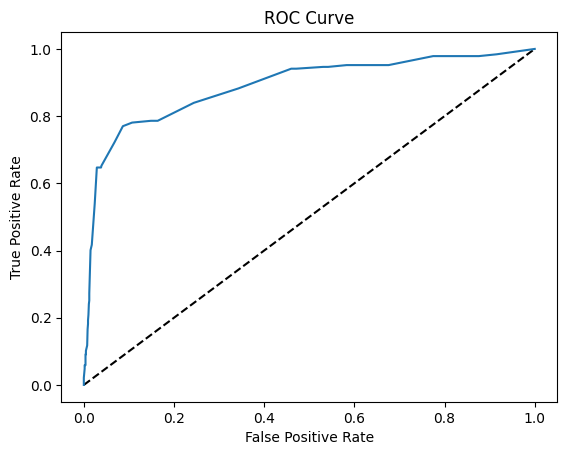

0.8891146097850008
[[981  93]
 [ 43 144]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.94      1074
           1       0.61      0.77      0.68       187

    accuracy                           0.89      1261
   macro avg       0.78      0.84      0.81      1261
weighted avg       0.91      0.89      0.90      1261



In [180]:
 #Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_valid_split, lr_k_best.predict_proba(reduced_test_k_best)[:,1])

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate roc_auc_score
print(roc_auc_score(y_valid_split, lr_k_best.predict_proba(reduced_test_k_best)[:,1]))

# Calculate the confusion matrix
print(confusion_matrix(y_valid_split,  lr_k_best.predict(reduced_test_k_best)))

# Calculate the classification report
print(classification_report(y_valid_split,  lr_k_best.predict(reduced_test_k_best)))

In [87]:
data = {'ID': X_test["id"], 'PRED': lr_k_best.predict_proba(X_test_preprocessed.loc[:,reduced_test_k_best.columns])[:,1]}

# Create DataFrame from the dictionary
df = pd.DataFrame(data)

# Display the DataFrame
file_path = 'C:\KU Leuven\Advanced Analytics\Assignment\predictions_pr_lr_kbest.csv'  # Specify the file path where you want to save the CSV file
df.to_csv(file_path, index=False)

In [ ]:
#7th 5.313559 0.871816

## SHAP Values 

In [88]:
# Specify L1 regularization
#liblinear is the optimization method used to estimate the coefficients. liblinear is need for l1

lr = LogisticRegression(random_state=8,max_iter=1000)

param_grid = {
    'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]

}

scoring = {"Profit": custom_scorer, "AUC": "roc_auc"}
# kf = KFold(n_splits=5, shuffle=True, random_state=5)

# Instantiate the GridSearchCV object and run the search
# The GridSeachCV object, when fitted on the data, creates 5-fold splits for every C value and calculates a default scoring metric
searcher_ridge = GridSearchCV(lr, param_grid, cv=stratified_splitter, scoring=scoring, refit="Profit")
searcher_ridge.fit(X_train_preprocessed_smote, y_train_smote)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(max_iter=1000, random_state=8),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             refit='Profit',
             scoring={'AUC': 'roc_auc',
                      'Profit': <function custom_scorer at 0x0000025BA081D5A0>})

In [89]:
searcher_ridge.best_params_

{'C': 0.001}

In [90]:
lr_ridge = LogisticRegression(random_state=8, C=0.001, max_iter=1000)
lr_ridge.fit(X_train_preprocessed_smote,y_train_smote)

LogisticRegression(C=0.001, max_iter=1000, random_state=8)

PermutationExplainer explainer: 1262it [00:34, 29.96it/s]                          


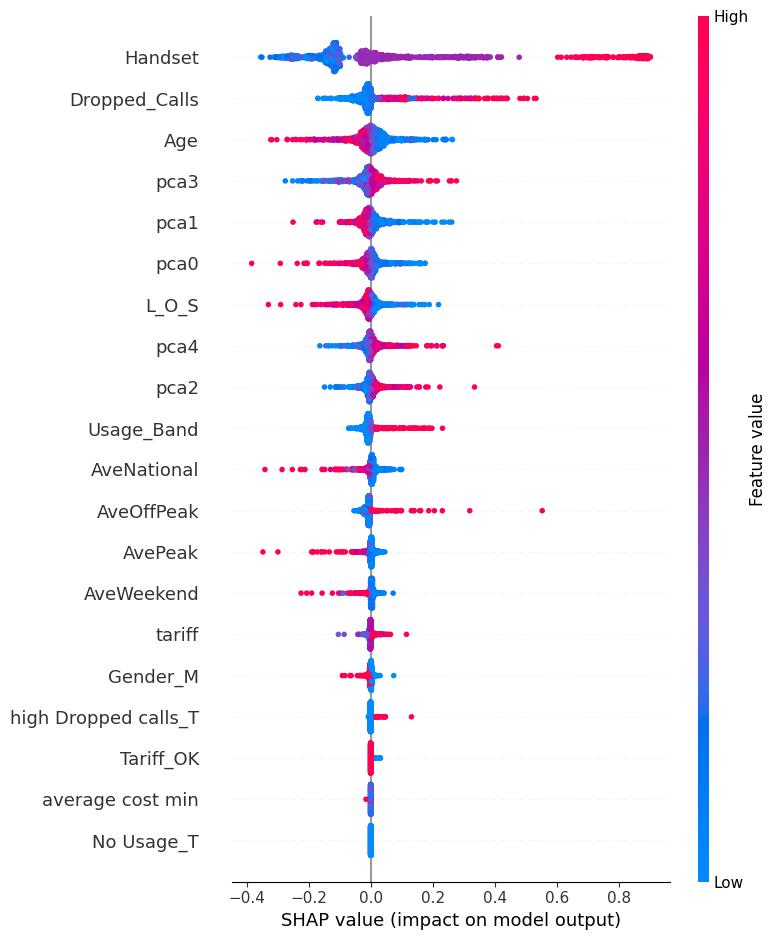

In [91]:
explainer = shap.Explainer(lr_ridge.predict,X_valid_preprocessed)
shap_values = explainer(X_valid_preprocessed)

shap.summary_plot(shap_values)

In [ ]:
# lr = LogisticRegression(random_state=8,max_iter=1000)

# param_grid = {
#     'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]

# }

# # kf = KFold(n_splits=5, shuffle=True, random_state=5)

# # Instantiate the GridSearchCV object and run the search
# # The GridSeachCV object, when fitted on the data, creates 5-fold splits for every C value and calculates a default scoring metric
# searcher_ridge = GridSearchCV(lr, param_grid, cv=stratified_splitter, scoring="precision")
# searcher_ridge.fit(X_train_preprocessed_smote, y_train_smote)

In [92]:
mean_shap_values = np.abs(shap_values.values).mean(axis=0)
mean_shap_values

array([4.02272820e-03, 1.49652291e-03, 0.00000000e+00, 4.90051648e-03,
       1.98977358e-01, 1.65146963e-02, 2.25941713e-02, 2.30828707e-02,
       1.66782824e-02, 2.91808241e-02, 2.07074158e-02, 3.71335326e-02,
       2.20892302e-02, 4.87585911e-02, 8.71009476e-03, 1.31343663e-02,
       7.09985461e-03, 1.39124931e-02, 1.75455987e-04, 8.95707517e-05])

In [93]:
shap_dict = dict(zip(X_train_preprocessed_smote.columns.values, mean_shap_values))
sorted_dict = dict(sorted(shap_dict.items(), key=lambda item: item[1], reverse=True))
sorted_dict

{'Handset': 0.19897735822200557,
 'Dropped_Calls': 0.04875859106529221,
 'Age': 0.037133532605380416,
 'pca3': 0.02918082413225161,
 'pca1': 0.0230828707375099,
 'pca0': 0.022594171292624914,
 'L_O_S': 0.022089230159214324,
 'pca4': 0.020707415766892365,
 'pca2': 0.016678282396958042,
 'Usage_Band': 0.016514696313467112,
 'AveNational': 0.013912493137314687,
 'AveOffPeak': 0.01313436629455663,
 'AvePeak': 0.008710094755891745,
 'AveWeekend': 0.007099854612741228,
 'tariff': 0.004900516480611643,
 'Gender_M': 0.004022728196994651,
 'high Dropped calls_T': 0.0014965229061184725,
 'Tariff_OK': 0.00017545598731165743,
 'average cost min': 8.957075174363059e-05,
 'No Usage_T': 0.0}

In [94]:
X_train_shap = X_train_preprocessed_smote.reindex(columns=sorted_dict.keys())

X_test_shap = X_valid_preprocessed.reindex(columns=sorted_dict.keys())

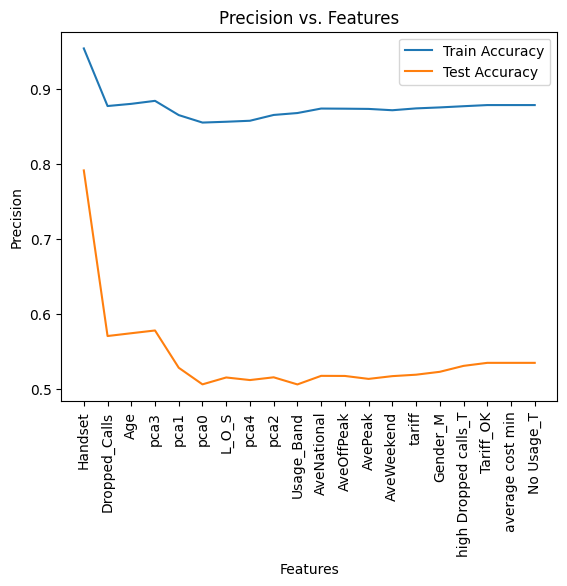

In [98]:
# Initialize lists to store error rates and number of features
train_errors = []
test_errors = []
num_features = []

# Store feature names
feature_names = X_train_shap.columns.tolist()

# Fit the model with increasing number of features
for i in range(1, X_train_shap.shape[1] + 1):
    lr_ridge.fit(X_train_shap.iloc[:, :i], y_train_smote)  # Fit the model with the first i features
    
    # Predictions
    y_train_pred = lr_ridge.predict(X_train_shap.iloc[:, :i])
    y_test_pred = lr_ridge.predict(X_test_shap.iloc[:, :i])
    
    # Calculate error rates
    train_error = precision_score(y_train_smote, y_train_pred)
    test_error = precision_score(y_valid_split, y_test_pred)
    
    # Append to lists
    train_errors.append(train_error)
    test_errors.append(test_error)
    num_features.append(i)

# Plot the error rates
plt.plot(feature_names, train_errors, label='Train Accuracy')
plt.plot(feature_names, test_errors, label='Test Accuracy')
plt.xlabel('Features')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.ylabel('Precision')
plt.title('Precision vs. Features')
plt.legend()
plt.show()

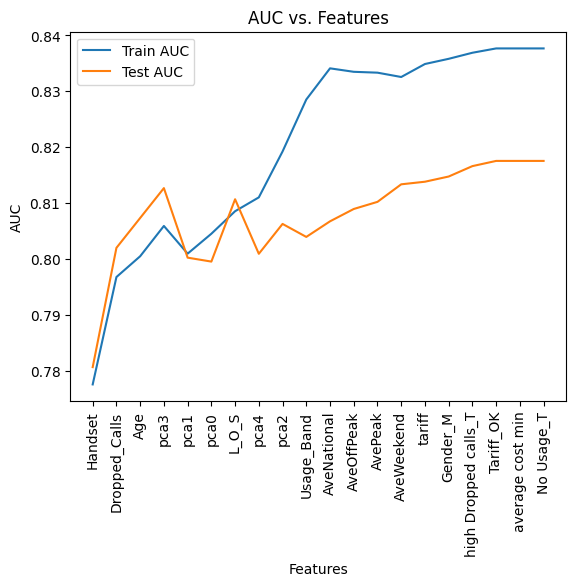

In [95]:
# Initialize lists to store error rates and number of features
train_errors = []
test_errors = []
num_features = []

# Store feature names
feature_names = X_train_shap.columns.tolist()

# Fit the model with increasing number of features
for i in range(1, X_train_shap.shape[1] + 1):
    lr_ridge.fit(X_train_shap.iloc[:, :i], y_train_smote)  # Fit the model with the first i features
    
    # Predictions
    y_train_pred = lr_ridge.predict(X_train_shap.iloc[:, :i])
    y_test_pred = lr_ridge.predict(X_test_shap.iloc[:, :i])
    
    # Calculate error rates
    train_error = roc_auc_score(y_train_smote, y_train_pred)
    test_error = roc_auc_score(y_valid_split, y_test_pred)
    
    # Append to lists
    train_errors.append(train_error)
    test_errors.append(test_error)
    num_features.append(i)

# Plot the error rates
plt.plot(feature_names, train_errors, label='Train AUC')
plt.plot(feature_names, test_errors, label='Test AUC')
plt.xlabel('Features')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.ylabel('AUC')
plt.title('AUC vs. Features')
plt.legend()
plt.show()

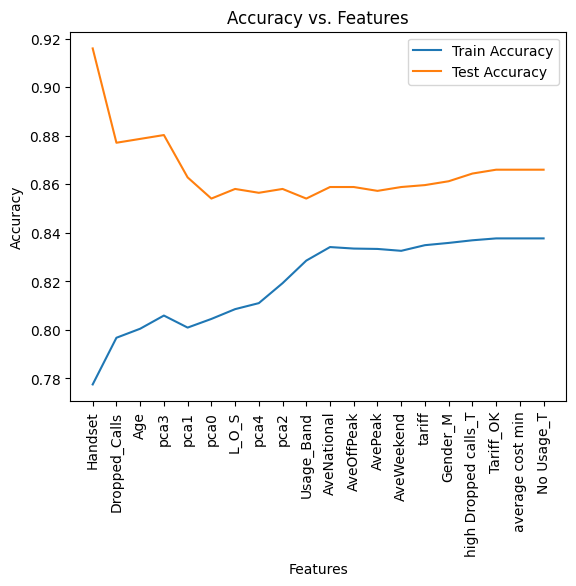

In [96]:
# Initialize lists to store error rates and number of features
train_errors = []
test_errors = []
num_features = []

# Store feature names
feature_names = X_train_shap.columns.tolist()

# Fit the model with increasing number of features
for i in range(1, X_train_shap.shape[1] + 1):
    lr_ridge.fit(X_train_shap.iloc[:, :i], y_train_smote)  # Fit the model with the first i features
    
    # Predictions
    y_train_pred = lr_ridge.predict(X_train_shap.iloc[:, :i])
    y_test_pred = lr_ridge.predict(X_test_shap.iloc[:, :i])
    
    # Calculate error rates
    train_error = accuracy_score(y_train_smote, y_train_pred)
    test_error = accuracy_score(y_valid_split, y_test_pred)
    
    # Append to lists
    train_errors.append(train_error)
    test_errors.append(test_error)
    num_features.append(i)

# Plot the error rates
plt.plot(feature_names, train_errors, label='Train Accuracy')
plt.plot(feature_names, test_errors, label='Test Accuracy')
plt.xlabel('Features')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Features')
plt.legend()
plt.show()

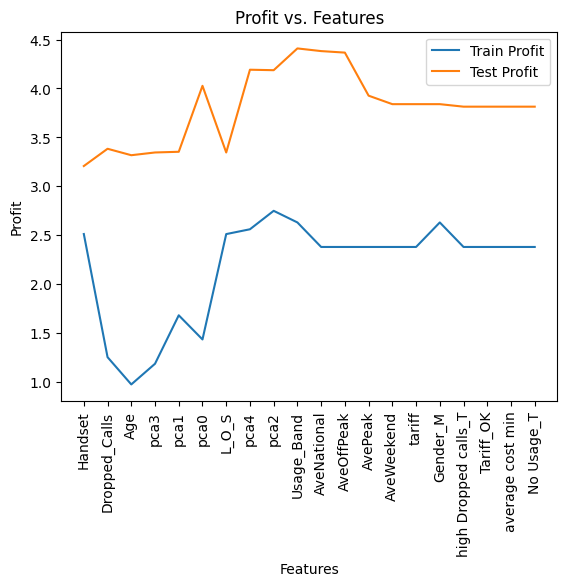

In [97]:
# Initialize lists to store error rates and number of features
train_errors = []
test_errors = []
# train_2_errors = []
# test_2_errors = [] 
num_features = []

# Store feature names
feature_names = X_train_shap.columns.tolist()

# Fit the model with increasing number of features
for i in range(1, X_train_shap.shape[1] + 1):
    lr_ridge.fit(X_train_shap.iloc[:, :i], y_train_smote)  # Fit the model with the first i features
    
    # Predictions
    y_train_pred = lr_ridge.predict_proba(X_train_shap.iloc[:, :i])[:,1]
    y_test_pred = lr_ridge.predict_proba(X_test_shap.iloc[:, :i])[:,1]

    y_train_pred_2 = lr_ridge.predict(X_train_shap.iloc[:, :i])
    y_test_pred_2 = lr_ridge.predict(X_test_shap.iloc[:, :i])
    
    
    # Calculate error rates
    train_error = calculate_profit_metric_2(y_train_smote, y_train_pred, dataset=X_train_preprocessed)
    test_error = calculate_profit_metric_2(y_valid_split, y_test_pred, dataset=X_valid_preprocessed)
    # train_error = roc_auc_score(y_train_smote, y_train_pred)
    # test_error = roc_auc_score(y_test, y_test_pred)
    # train_error_2 = roc_auc_score(y_train_smote, y_train_pred_2)
    # test_error_2 = roc_auc_score(y_valid_split, y_test_pred_2)
    
    # Append to lists
    train_errors.append(train_error)
    test_errors.append(test_error)
    # train_2_errors.append(train_error_2)
    # test_2_errors.append(test_error_2)
    num_features.append(i)

# Plot the error rates
plt.plot(feature_names, train_errors, label='Train Profit')
plt.plot(feature_names, test_errors, label='Test Profit')
plt.xlabel('Features')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.ylabel('Profit')
plt.title('Profit vs. Features')
plt.legend()
plt.show()

### Best Precision (Handset) 

In [105]:
mask_shap = mean_shap_values > 0.008710094755891745
mask_shap

array([False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
       False, False])

In [106]:
shap_subset_train = X_train_preprocessed_smote.loc[:,mask_shap]
shap_subset_test = X_valid_preprocessed.loc[:,mask_shap]
shap_subset_train.head()

Handset  Usage_Band      pca0      pca1      pca2      pca3      pca4  \
0 -0.951537   -0.271153 -2.568681  2.103107 -0.970825  0.336637  0.443232   
1  2.982628   -0.271153  0.727921 -1.376481 -0.489993  1.714494  0.402646   
2  0.007327    0.756511 -2.222597 -1.437766 -2.204695 -0.437399  0.605702   
3 -2.908287   -0.271153 -2.209708  3.358562 -1.820766 -0.961110 -0.250943   
4 -0.135439   -0.271153 -1.667525 -0.510305 -0.414703 -1.002194  1.142253   

        Age     L_O_S  Dropped_Calls  AveOffPeak  AveNational  
0  1.479855 -0.315520      -0.198503   -0.148181    -0.219327  
1 -0.491319  0.917762      -0.491152   -0.330827     0.337205  
2  2.189477 -0.443591      -0.491152   -0.024856     0.195994  
3 -0.491319 -0.868125      -0.491152   -0.257835    -0.081423  
4 -0.333625  0.374644       1.557391   44.515591     0.520425

In [107]:
lr_ridge.fit(shap_subset_train,y_train_smote)

LogisticRegression(C=0.001, max_iter=1000, random_state=8)

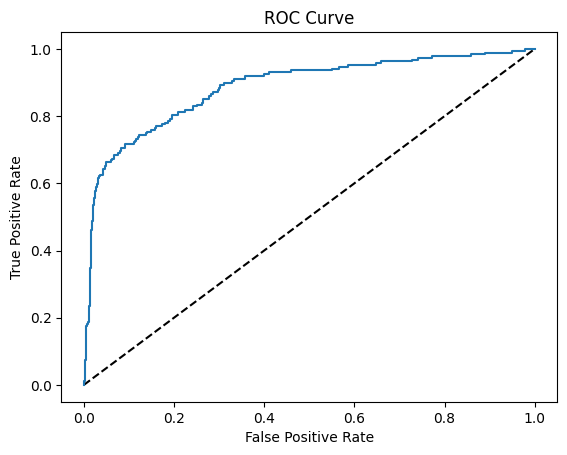

0.8848823429829017
[[945 129]
 [ 49 138]]
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      1074
           1       0.52      0.74      0.61       187

    accuracy                           0.86      1261
   macro avg       0.73      0.81      0.76      1261
weighted avg       0.89      0.86      0.87      1261



In [108]:
 #Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_valid_split, lr_ridge.predict_proba(shap_subset_test)[:,1])

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate roc_auc_score
print(roc_auc_score(y_valid_split, lr_ridge.predict_proba(shap_subset_test)[:,1]))

# Calculate the confusion matrix
print(confusion_matrix(y_valid_split,  lr_ridge.predict(shap_subset_test)))

# Calculate the classification report
print(classification_report(y_valid_split,  lr_ridge.predict(shap_subset_test)))

In [109]:
calculate_profit_metric_2(y_valid_split,lr_ridge.predict_proba(shap_subset_test)[:,1], dataset=X_valid_preprocessed)

4.366366

In [110]:
data = {'ID': X_test["id"], 'PRED': lr_ridge.predict_proba(X_test_preprocessed.loc[:,shap_subset_test.columns])[:,1]}

# Create DataFrame from the dictionary
df = pd.DataFrame(data)

# Display the DataFrame
file_path = 'C:\KU Leuven\Advanced Analytics\Assignment\predictions_pr_lr_shap_1.csv'  # Specify the file path where you want to save the CSV file
df.to_csv(file_path, index=False)

In [ ]:

#7th 1 best profiτ up to usageband] 4.831543 0.873427
#7th 4.831543 0.878509 up to aveoffpeak]
# up to                                      

### Best Profit 

In [371]:
mask_shap = mean_shap_values >  0.04051116838487973
mask_shap

array([False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [372]:
shap_subset_train = X_train_preprocessed_smote.loc[:,mask_shap]
shap_subset_test = X_valid_preprocessed.loc[:,mask_shap]
shap_subset_train.head()

Handset  Usage_Band
0 -0.951537   -0.271153
1  2.982628   -0.271153
2  0.007327    0.756511
3 -2.908287   -0.271153
4 -0.135439   -0.271153

In [373]:
lr_ridge.fit(shap_subset_train,y_train_smote)

LogisticRegression(C=1000, max_iter=1000, random_state=8)

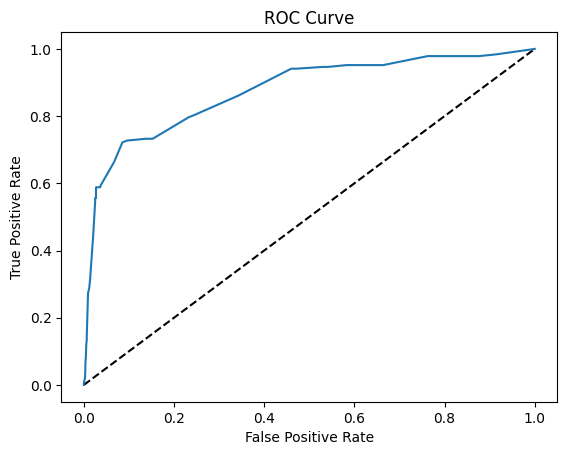

0.8748120375626127
[[971 103]
 [ 51 136]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      1074
           1       0.57      0.73      0.64       187

    accuracy                           0.88      1261
   macro avg       0.76      0.82      0.78      1261
weighted avg       0.89      0.88      0.88      1261



In [374]:
 #Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_valid_split, lr_ridge.predict_proba(shap_subset_test)[:,1])

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate roc_auc_score
print(roc_auc_score(y_valid_split, lr_ridge.predict_proba(shap_subset_test)[:,1]))

# Calculate the confusion matrix
print(confusion_matrix(y_valid_split,  lr_ridge.predict(shap_subset_test)))

# Calculate the classification report
print(classification_report(y_valid_split,  lr_ridge.predict(shap_subset_test)))

In [375]:
calculate_profit_metric_2(y_valid_split,lr_ridge.predict_proba(shap_subset_test)[:,1], dataset=X_valid_preprocessed)

5.582338999999999

In [376]:
data = {'ID': X_test["id"], 'PRED': lr_ridge.predict(X_test_preprocessed.loc[:,shap_subset_test.columns])}

# Create DataFrame from the dictionary
df = pd.DataFrame(data)

# Display the DataFrame
file_path = 'C:\KU Leuven\Advanced Analytics\Assignment\predictions_pr_lr_shap.csv'  # Specify the file path where you want to save the CSV file
df.to_csv(file_path, index=False)

In [ ]:
 # 20th	2.46 0.786786

## Vote among the features chosen from the best scores in either precision or profit scoring

In [ ]:
# In either with profit or precision optimization: 

# Best from Lasso 
# Best from feature importance
# Best from forward selection
# Best from K-best
# Best from SHAP

In [120]:
votes = np.sum([mask_lasso,mask_rfe_lr,mask_k_best,mask_shap],axis=0)
print(votes)

[1 2 0 1 4 4 3 3 3 3 3 3 3 3 2 2 0 2 2 0]


In [151]:
meta_mask_lr = votes > 3
meta_mask_lr

array([False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [152]:
reduced_vote_train = X_train_preprocessed_smote.loc[:,meta_mask_lr]
reduced_vote_test = X_valid_preprocessed.loc[:,meta_mask_lr]
reduced_vote_train.head()

Handset  Usage_Band
0 -0.951537   -0.271153
1  2.982628   -0.271153
2  0.007327    0.756511
3 -2.908287   -0.271153
4 -0.135439   -0.271153

In [377]:
# reduced_vote_train["average cost min"] = X_train_preprocessed_smote["average cost min"]
# reduced_vote_test["average cost min"] = X_train_preprocessed_smote["average cost min"]
# reduced_vote_train.head()



C:\Users\Johnn\AppData\Local\Temp\ipykernel_17540\2718760008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_vote_train["average cost min"] = X_train_preprocessed_smote["average cost min"]
C:\Users\Johnn\AppData\Local\Temp\ipykernel_17540\2718760008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_vote_test["average cost min"] = X_train_preprocessed_smote["average cost min"]


Handset  Usage_Band      pca3       Age  Tariff_OK  average cost min
0 -0.951537   -0.271153  0.336637  1.479855          1          0.150531
1  2.982628   -0.271153  1.714494 -0.491319          1          0.188988
2  0.007327    0.756511 -0.437399  2.189477          1          0.221467
3 -2.908287   -0.271153 -0.961110 -0.491319          1          0.107509
4 -0.135439   -0.271153 -1.002194 -0.333625          1          0.162952

In [153]:
# Specify L1 regularization
#liblinear is the optimization method used to estimate the coefficients. liblinear is need for l1

lr = LogisticRegression(random_state=8, max_iter=1000)

param_grid = {
    'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]

}
scoring = {"Profit": profit_scorer, "AUC": "roc_auc"}

# Instantiate the GridSearchCV object and run the search
# The GridSeachCV object, when fitted on the data, creates 5-fold splits for every C value and calculates a default scoring metric
searcher_ridge = GridSearchCV(lr, param_grid, cv=stratified_splitter, scoring=scoring, refit="Profit")
searcher_ridge.fit(reduced_vote_train, y_train_smote)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(max_iter=1000, random_state=8),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             refit='Profit',
             scoring={'AUC': 'roc_auc',
                      'Profit': make_scorer(calculate_profit_metric_3, response_method='predict_proba')})

In [154]:
searcher_ridge.best_params_

{'C': 0.001}

In [155]:
lr_vote = LogisticRegression(random_state=8,C=0.001) 
lr_vote.fit(reduced_vote_train,y_train_smote)

LogisticRegression(C=0.001, random_state=8)

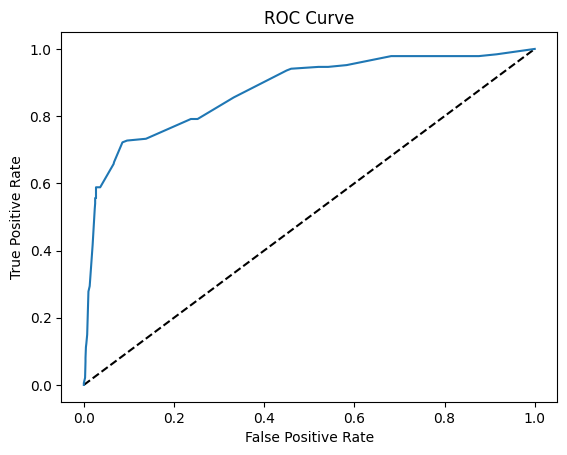

0.8762808830998118
[[1003   71]
 [  64  123]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1074
           1       0.63      0.66      0.65       187

    accuracy                           0.89      1261
   macro avg       0.79      0.80      0.79      1261
weighted avg       0.89      0.89      0.89      1261



In [156]:
 #Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_valid_split, lr_vote.predict_proba(reduced_vote_test)[:,1])

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate roc_auc_score
print(roc_auc_score(y_valid_split, lr_vote.predict_proba(reduced_vote_test)[:,1]))

# Calculate the confusion matrix
print(confusion_matrix(y_valid_split,  lr_vote.predict(reduced_vote_test)))

# Calculate the classification report
print(classification_report(y_valid_split,  lr_vote.predict(reduced_vote_test)))

In [157]:
calculate_profit_metric_2(y_valid_split, lr_vote.predict_proba(reduced_vote_test)[:,1], dataset=X_valid_preprocessed)

5.0715840000000005

In [158]:
data = {'ID': X_test["id"], 'PRED': lr_vote.predict_proba(X_test_preprocessed.loc[:,reduced_vote_test.columns])[:,1]}

# Create DataFrame from the dictionary
df = pd.DataFrame(data)

# Display the DataFrame
file_path = 'C:\KU Leuven\Advanced Analytics\Assignment\predictions_pr_lr_vote.csv'  # Specify the file path where you want to save the CSV file
df.to_csv(file_path, index=False)

In [ ]:
 #7th	5.237581 0.881342 >1
 #7th	4.831543 0.873427 >2
 #7th	5.313559 0.865045

 #7th	5.30344 0.913106 >1 grid
#7th 4.831543 0.873427 >2 grid
 #7th	5.313559 0.865045 >3 grid


# Random Forest using Weights for imbalance

## GridSearch (Precision vs Profit )

In [32]:
random_f = RandomForestClassifier(bootstrap=True,random_state=7)

grid_param = {
    "n_estimators" : [50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200],
    'criterion': ['gini','entropy'],
    'class_weight' : ["balanced", "balanced_subsample"],
    'max_features' : [1,2,"log2","sqrt"]
}
scoring = {"Profit": custom_scorer, "AUC": "roc_auc"}
# kf = KFold(n_splits=5, shuffle=True, random_state=5)

random_searcher = GridSearchCV(random_f, grid_param, scoring=scoring, cv=stratified_splitter,refit="Profit")
random_searcher.fit(X_train_preprocessed, y_train_split)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=7),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': [1, 2, 'log2', 'sqrt'],
                         'n_estimators': [50, 60, 70, 80, 90, 100, 110, 120,
                                          130, 140, 150, 160, 170, 180, 190,
                                          200]},
             refit='Profit',
             scoring={'AUC': 'roc_auc',
                      'Profit': <function custom_scorer at 0x00000172E238B400>})

In [33]:
random_searcher.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_features': 1,
 'n_estimators': 50}

In [ ]:
# {'class_weight': 'balanced_subsample',
#  'criterion': 'gini',
#  'max_features': 1,
#  'n_estimators': 70}

In [ ]:
# # Hyperparameters with profit Dropped_calls_T instead of above_11 
# {'class_weight': 'balanced',
#  'criterion': 'entropy',
#  'max_features': 1,
#  'n_estimators': 200}

In [ ]:
# Hyperparameters with precision
# {'class_weight': 'balanced_subsample',
#  'criterion': 'entropy',
#  'max_features': 1,
#  'n_estimators': 120
#   max_leaf_nodes=115} 

# Hyperparameters with profit
# {'class_weight': 'balanced',
#  'criterion': 'gini',
#  'max_features': 2,
#  'n_estimators': 80
#max_leaf_nodes=100)}

In [34]:
random_f_best = RandomForestClassifier(bootstrap=True, max_features=1,random_state=7,criterion="gini",n_estimators=50,class_weight='balanced_subsample')

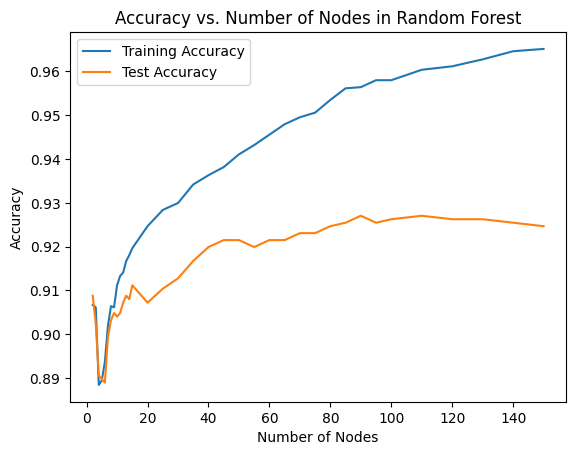

In [187]:
# Define a range of values for the number of nodes
node_values = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,110,120,130,140,150]  # Adjust this range as needed

# Initialize lists to store accuracy values
train_accuracies = []
test_accuracies = []

# Train Random Forest models with different numbers of nodes
for num_nodes in node_values:
    # Create and fit Random Forest model
    rf_model = RandomForestClassifier(bootstrap=True, max_features=1,random_state=7,criterion="gini",n_estimators=50,class_weight='balanced_subsample', max_leaf_nodes=num_nodes)
    rf_model.fit(X_train_preprocessed, y_train_split)

    #RandomForestClassifier(bootstrap=True, max_features="log2", random_state=45, class_weight="balanced")
    # Predict on training and test data
    train_preds = rf_model.predict(X_train_preprocessed)
    test_preds = rf_model.predict(X_valid_preprocessed)
    
    # Calculate accuracy and append to lists
    train_accuracy = accuracy_score(y_train_split, train_preds)
    test_accuracy = accuracy_score(y_valid_split, test_preds)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

plt.plot(node_values, train_accuracies, label='Training Accuracy')
plt.plot(node_values, test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Nodes')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Nodes in Random Forest')
plt.legend()
plt.show()

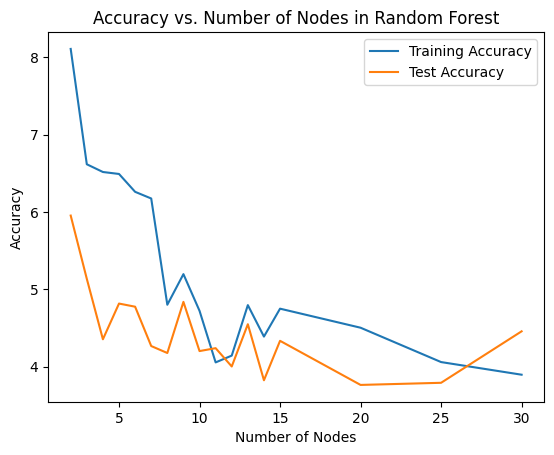

In [37]:
# Define a range of values for the number of nodes
node_values = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30]   # Adjust this range as needed

# Initialize lists to store accuracy values
train_accuracies = []
test_accuracies = []

# Train Random Forest models with different numbers of nodes
for num_nodes in node_values:
    # Create and fit Random Forest model
    rf_model = RandomForestClassifier(bootstrap=True, max_features=1,random_state=7,criterion="gini",n_estimators=50,class_weight='balanced_subsample', max_leaf_nodes=num_nodes)
    rf_model.fit(X_train_preprocessed, y_train_split)

    #RandomForestClassifier(bootstrap=True, max_features="log2", random_state=45, class_weight="balanced")
    # Predict on training and test data
    train_preds = rf_model.predict_proba(X_train_preprocessed)[:,1]
    test_preds = rf_model.predict_proba(X_valid_preprocessed)[:,1]
    
    # Calculate accuracy and append to lists
    train_accuracy = calculate_profit_metric_2(y_train_split, train_preds, dataset=X_train_preprocessed)
    test_accuracy = calculate_profit_metric_2(y_valid_split, test_preds, dataset=X_valid_preprocessed)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

plt.plot(node_values, train_accuracies, label='Training Accuracy')
plt.plot(node_values, test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Nodes')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Nodes in Random Forest')
plt.legend()
plt.show()

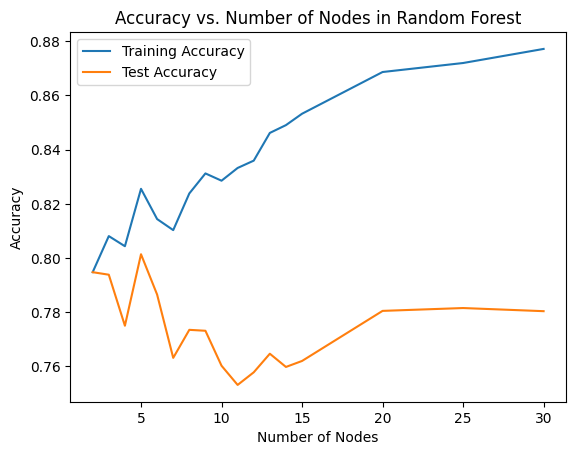

In [36]:
# Define a range of values for the number of nodes
node_values = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30]  # Adjust this range as needed

# Initialize lists to store accuracy values
train_accuracies = []
test_accuracies = []

# Train Random Forest models with different numbers of nodes
for num_nodes in node_values:
    # Create and fit Random Forest model
    rf_model = RandomForestClassifier(bootstrap=True, max_features=1,random_state=7,criterion="gini",n_estimators=50,class_weight='balanced_subsample', max_leaf_nodes=num_nodes)
    rf_model.fit(X_train_preprocessed, y_train_split)

    #RandomForestClassifier(bootstrap=True, max_features="log2", random_state=45, class_weight="balanced")
    # Predict on training and test data
    train_preds = rf_model.predict(X_train_preprocessed)
    test_preds = rf_model.predict(X_valid_preprocessed)
    
    # Calculate accuracy and append to lists
    train_accuracy = roc_auc_score(y_train_split, train_preds)
    test_accuracy = roc_auc_score(y_valid_split, test_preds)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

plt.plot(node_values, train_accuracies, label='Training Accuracy')
plt.plot(node_values, test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Nodes')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Nodes in Random Forest')
plt.legend()
plt.show()

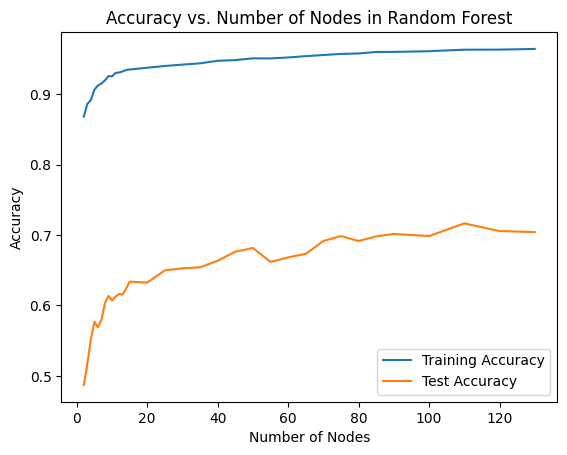

In [190]:
# Define a range of values for the number of nodes
node_values = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,100,110,120,130]  # Adjust this range as needed

# Initialize lists to store accuracy values
train_accuracies = []
test_accuracies = []

# Train Random Forest models with different numbers of nodes
for num_nodes in node_values:
    # Create and fit Random Forest model
    rf_model = RandomForestClassifier(bootstrap=True, max_features=1,random_state=7,criterion="gini",n_estimators=70,class_weight='balanced_subsample', max_leaf_nodes=num_nodes)
    rf_model.fit(X_train_preprocessed_smote, y_train_smote)

    #RandomForestClassifier(bootstrap=True, max_features="log2", random_state=45, class_weight="balanced")
    # Predict on training and test data
    train_preds = rf_model.predict(X_train_preprocessed_smote)
    test_preds = rf_model.predict(X_valid_preprocessed)
    
    # Calculate accuracy and append to lists
    train_accuracy = precision_score(y_train_smote, train_preds)
    test_accuracy = precision_score(y_valid_split, test_preds)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

plt.plot(node_values, train_accuracies, label='Training Accuracy')
plt.plot(node_values, test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Nodes')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Nodes in Random Forest')
plt.legend()
plt.show()

In [51]:
random_f_best = RandomForestClassifier(bootstrap=True, max_features=1,random_state=7,criterion="gini",n_estimators=50,class_weight='balanced_subsample',max_leaf_nodes=2)

random_f_best.fit(X_train_preprocessed,y_train_split)

RandomForestClassifier(class_weight='balanced_subsample', max_features=1,
                       max_leaf_nodes=2, n_estimators=50, random_state=7)

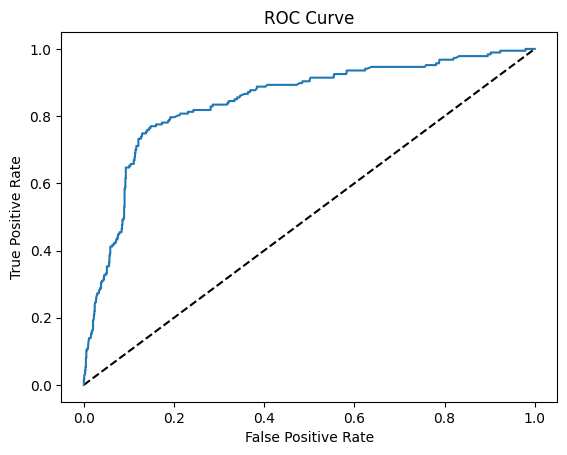

0.8445214551031179
[[949 125]
 [ 55 132]]
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      1074
           1       0.51      0.71      0.59       187

    accuracy                           0.86      1261
   macro avg       0.73      0.79      0.75      1261
weighted avg       0.88      0.86      0.87      1261



In [52]:
 #Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_valid_split, random_f_best.predict_proba(X_valid_preprocessed)[:,1])

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate roc_auc_score
print(roc_auc_score(y_valid_split, random_f_best.predict_proba(X_valid_preprocessed)[:,1]))

# Calculate the confusion matrix
print(confusion_matrix(y_valid_split, random_f_best.predict(X_valid_preprocessed)))

# Calculate the classification report
print(classification_report(y_valid_split, random_f_best.predict(X_valid_preprocessed)))

In [53]:
calculate_profit_metric_2(y_valid_split,random_f_best.predict_proba(X_valid_preprocessed)[:,1])

5.952115999999999

In [45]:
data = {'ID': X_test["id"], 'PRED': random_f_best.predict_proba(X_test_preprocessed)[:,1]}

# Create DataFrame from the dictionary
df = pd.DataFrame(data)

# Display the DataFrame
file_path = 'C:\KU Leuven\Advanced Analytics\Assignment\predictions_pr_simple.csv'  # Specify the file path where you want to save the CSV file
df.to_csv(file_path, index=False)

In [ ]:
#6th 5.739049 0.895326
#5th 6.308181 0.874246 5 nodes 
#7th 5.382603 0.892987
#7th 5.37454 0.892363
#6th 5.693401 0.880601

#7th 5.371591 0.893793 9
#5th 5.97142 0.878756 3 
#6th 5.641944 0.888997 5 
#7th 4.940217 0.89569 14 
#5th 6.074948 0.864278 2 
#6th 5.616515 0.886346 4 
#6th 5.6419440.888997 6
#6th 5.616515 0.891233 7
#7th 5.371591 0.896509 8
#7th 5.526076 0.89209 10


#7th 5.5357010.784395 2

## New GridSearch-Additional Parameters

## min sample split

In [248]:
# random_f_best = RandomForestClassifier(bootstrap=True, max_features=1,random_state=7,criterion="gini",n_estimators=70,class_weight='balanced_subsample',max_leaf_nodes=2)

# random_f_best.fit(X_train_preprocessed,y_train_split)

RandomForestClassifier(class_weight='balanced_subsample', max_features=1,
                       max_leaf_nodes=2, n_estimators=70, random_state=7)

In [54]:
random_f_best = RandomForestClassifier(bootstrap=True, max_features=1,random_state=7,criterion="gini",n_estimators=50,class_weight='balanced_subsample')

random_f_best.fit(X_train_preprocessed,y_train_split)

RandomForestClassifier(class_weight='balanced_subsample', max_features=1,
                       n_estimators=50, random_state=7)

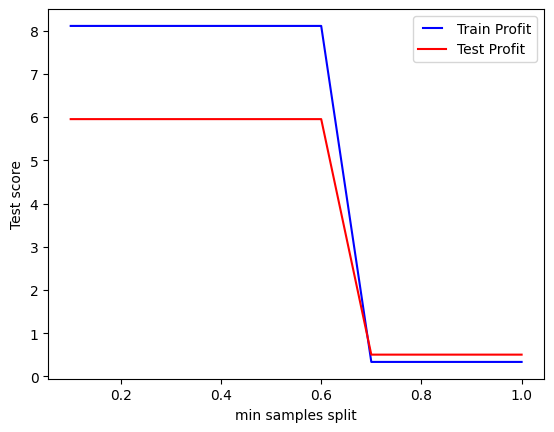

In [88]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   rf = RandomForestClassifier(bootstrap=True, max_features=1,random_state=7,criterion="gini",n_estimators=50,class_weight='balanced_subsample',max_leaf_nodes=2, min_samples_split=min_samples_split)
   rf.fit(X_train_preprocessed,y_train_split)  
   train_pred = rf.predict_proba(X_train_preprocessed)[:,1]  
   # false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   # roc_auc = auc(false_positive_rate, true_positive_rate)
   profit_train =calculate_profit_metric_2(y_train_split,train_pred,dataset=X_train_preprocessed)
   train_results.append(profit_train)  
   valid_pred = rf.predict_proba(X_valid_preprocessed)[:,1] 
   # false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   # roc_auc = auc(false_positive_rate, true_positive_rate)
   profit_valid =calculate_profit_metric_2(y_valid_split,valid_pred,dataset=X_valid_preprocessed)
   test_results.append(profit_valid)
   
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, "b", label="Train Profit")
line2, = plt.plot(min_samples_splits, test_results, "r", label="Test Profit")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Test score")
plt.xlabel("min samples split")
plt.show()

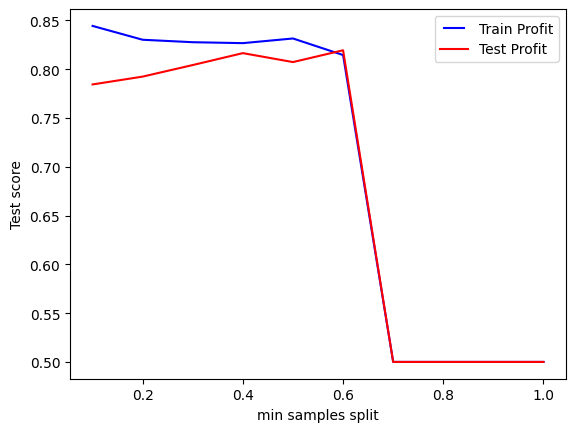

In [56]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   rf = RandomForestClassifier(bootstrap=True, max_features=1,random_state=7,criterion="gini",n_estimators=50,class_weight='balanced_subsample',min_samples_split=min_samples_split)
   rf.fit(X_train_preprocessed,y_train_split)  
   train_pred = rf.predict(X_train_preprocessed)
   # false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   # roc_auc = auc(false_positive_rate, true_positive_rate)
   profit_train = roc_auc_score(y_train_split,train_pred)
   train_results.append(profit_train)  
   valid_pred = rf.predict(X_valid_preprocessed)
   # false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   # roc_auc = auc(false_positive_rate, true_positive_rate)
   profit_valid =roc_auc_score(y_valid_split,valid_pred)
   test_results.append(profit_valid)
   
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, "b", label="Train Profit")
line2, = plt.plot(min_samples_splits, test_results, "r", label="Test Profit")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Test score")
plt.xlabel("min samples split")
plt.show()

c:\KU Leuven\Advanced Analytics\Assignment\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\KU Leuven\Advanced Analytics\Assignment\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\KU Leuven\Advanced Analytics\Assignment\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

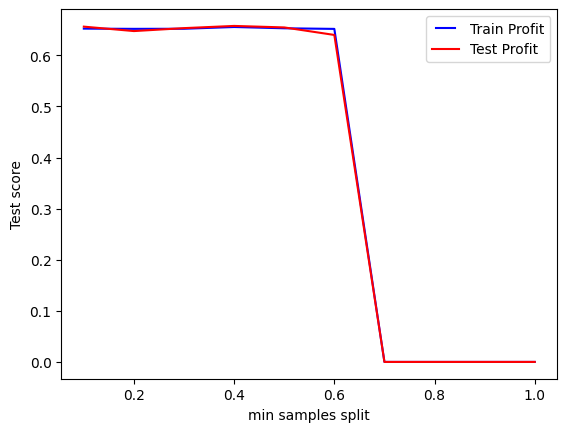

In [159]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   rf = RandomForestClassifier(bootstrap=True, max_features=1,random_state=7,criterion="entropy",n_estimators=200,class_weight='balanced',max_leaf_nodes=5,min_samples_split=min_samples_split)
   rf.fit(X_train_preprocessed,y_train_split)  
   train_pred = rf.predict(X_train_preprocessed)
   # false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   # roc_auc = auc(false_positive_rate, true_positive_rate)
   profit_train = precision_score(y_train_split,train_pred)
   train_results.append(profit_train)  
   valid_pred = rf.predict(X_valid_preprocessed) 
   # false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   # roc_auc = auc(false_positive_rate, true_positive_rate)
   profit_valid =precision_score(y_valid_split,valid_pred)
   test_results.append(profit_valid)
   
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, "b", label="Train Profit")
line2, = plt.plot(min_samples_splits, test_results, "r", label="Test Profit")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Test score")
plt.xlabel("min samples split")
plt.show()

In [93]:
random_f_best = RandomForestClassifier(bootstrap=True, max_features=1,random_state=7,criterion="gini",n_estimators=50,class_weight='balanced_subsample',min_samples_split=0.6)

random_f_best.fit(X_train_preprocessed,y_train_split)

RandomForestClassifier(class_weight='balanced_subsample', max_features=1,
                       min_samples_split=0.6, n_estimators=50, random_state=7)

In [89]:
random_f_best = RandomForestClassifier(bootstrap=True, max_features=1,random_state=7,criterion="gini",n_estimators=50,class_weight='balanced_subsample',min_samples_split=0.6, max_leaf_nodes=2)

random_f_best.fit(X_train_preprocessed,y_train_split)

RandomForestClassifier(class_weight='balanced_subsample', max_features=1,
                       max_leaf_nodes=2, min_samples_split=0.6, n_estimators=50,
                       random_state=7)

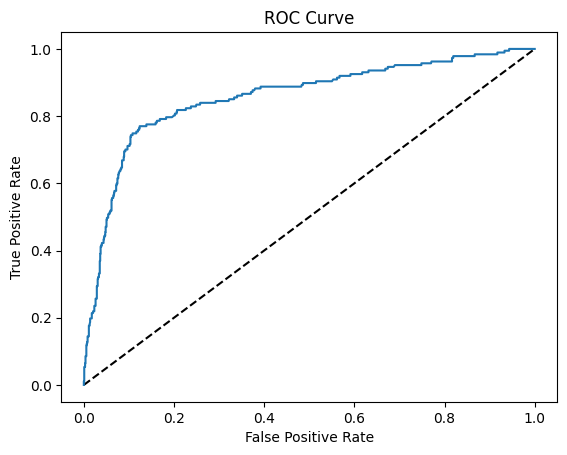

0.8567676435734273
[[956 118]
 [ 47 140]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1074
           1       0.54      0.75      0.63       187

    accuracy                           0.87      1261
   macro avg       0.75      0.82      0.77      1261
weighted avg       0.89      0.87      0.88      1261



In [94]:
 #Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_valid_split, random_f_best.predict_proba(X_valid_preprocessed)[:,1])

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate roc_auc_score
print(roc_auc_score(y_valid_split, random_f_best.predict_proba(X_valid_preprocessed)[:,1]))

# Calculate the confusion matrix
print(confusion_matrix(y_valid_split, random_f_best.predict(X_valid_preprocessed)))

# Calculate the classification report
print(classification_report(y_valid_split, random_f_best.predict(X_valid_preprocessed)))

In [95]:
calculate_profit_metric_2(y_valid_split,random_f_best.predict_proba(X_valid_preprocessed)[:,1])

5.224115

In [96]:
data = {'ID': X_test["id"], 'PRED': random_f_best.predict_proba(X_test_preprocessed)[:,1]}

# Create DataFrame from the dictionary
df = pd.DataFrame(data)

# Display the DataFrame
file_path = 'C:\KU Leuven\Advanced Analytics\Assignment\predictions_pr_simple.csv'  # Specify the file path where you want to save the CSV file
df.to_csv(file_path, index=False)

In [ ]:
 # 5th 6.113344 0.869658 0.3 
 #5th 6.287165 0.87283 0.1 
 #5th 6.074948 0.86446 0.1 2 nodes
 #5th 6.128994 0.866637 0.6

 #5th 5.990489 0.799828 0.6 simple no max leaf nodes

## min sample leaf

In [ ]:
random_f_best = RandomForestClassifier(bootstrap=True, max_features=1,random_state=7,criterion="gini",n_estimators=70,class_weight='balanced_subsample')

random_f_best.fit(X_train_preprocessed,y_train_split)

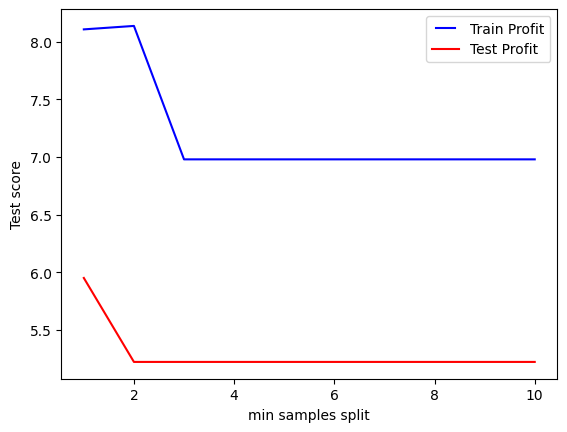

In [83]:
max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(bootstrap=True, max_features=1,random_state=7,criterion="gini",n_estimators=50,class_weight='balanced_subsample',min_samples_split=0.6,
                               max_depth=max_depth )
   rf.fit(X_train_preprocessed,y_train_split)  
   train_pred = rf.predict_proba(X_train_preprocessed)[:,1]  
   # false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   # roc_auc = auc(false_positive_rate, true_positive_rate)
   profit_train =calculate_profit_metric_2(y_train_split,train_pred,dataset=X_train_preprocessed)
   train_results.append(profit_train)  
   valid_pred = rf.predict_proba(X_valid_preprocessed)[:,1] 
   # false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   # roc_auc = auc(false_positive_rate, true_positive_rate)
   profit_valid =calculate_profit_metric_2(y_valid_split,valid_pred,dataset=X_valid_preprocessed)
   test_results.append(profit_valid)
   
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, "b", label="Train Profit")
line2, = plt.plot(max_depths, test_results, "r", label="Test Profit")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Test score")
plt.xlabel("min samples split")
plt.show()

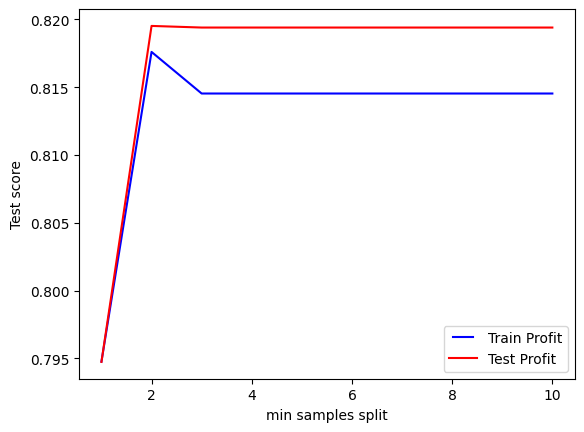

In [82]:
max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(bootstrap=True, max_features=1,random_state=7,criterion="gini",n_estimators=50,class_weight='balanced_subsample', min_samples_split=0.6,
                               max_depth=max_depth)
   rf.fit(X_train_preprocessed,y_train_split)  
   train_pred = rf.predict(X_train_preprocessed)
   # false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   # roc_auc = auc(false_positive_rate, true_positive_rate)
   profit_train = roc_auc_score(y_train_split,train_pred)
   train_results.append(profit_train)  
   valid_pred = rf.predict(X_valid_preprocessed)
   # false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   # roc_auc = auc(false_positive_rate, true_positive_rate)
   profit_valid =roc_auc_score(y_valid_split,valid_pred)
   test_results.append(profit_valid)
   
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, "b", label="Train Profit")
line2, = plt.plot(max_depths, test_results, "r", label="Test Profit")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Test score")
plt.xlabel("min samples split")
plt.show()

c:\KU Leuven\Advanced Analytics\Assignment\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\KU Leuven\Advanced Analytics\Assignment\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\KU Leuven\Advanced Analytics\Assignment\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

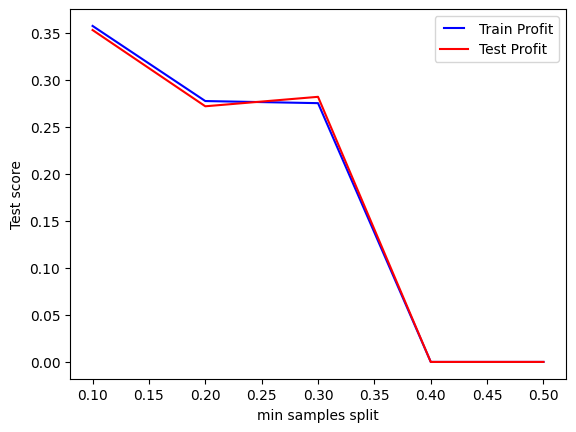

In [175]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   rf = RandomForestClassifier(bootstrap=True, max_features=1,random_state=7,criterion="entropy",n_estimators=200,class_weight='balanced',max_leaf_nodes=5,
                               min_samples_leaf=min_samples_leaf)
   rf.fit(X_train_preprocessed,y_train_split)  
   train_pred = rf.predict(X_train_preprocessed)
   # false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   # roc_auc = auc(false_positive_rate, true_positive_rate)
   profit_train = precision_score(y_train_split,train_pred)
   train_results.append(profit_train)  
   valid_pred = rf.predict(X_valid_preprocessed) 
   # false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   # roc_auc = auc(false_positive_rate, true_positive_rate)
   profit_valid =precision_score(y_valid_split,valid_pred)
   test_results.append(profit_valid)
   
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, "b", label="Train Profit")
line2, = plt.plot(min_samples_leafs, test_results, "r", label="Test Profit")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Test score")
plt.xlabel("min samples split")
plt.show()

In [84]:
random_f_best = RandomForestClassifier(bootstrap=True, max_features=1,random_state=7,criterion="gini",n_estimators=50,class_weight='balanced_subsample',max_depth=2, min_samples_split=0.6)

random_f_best.fit(X_train_preprocessed,y_train_split)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=2,
                       max_features=1, min_samples_split=0.6, n_estimators=50,
                       random_state=7)

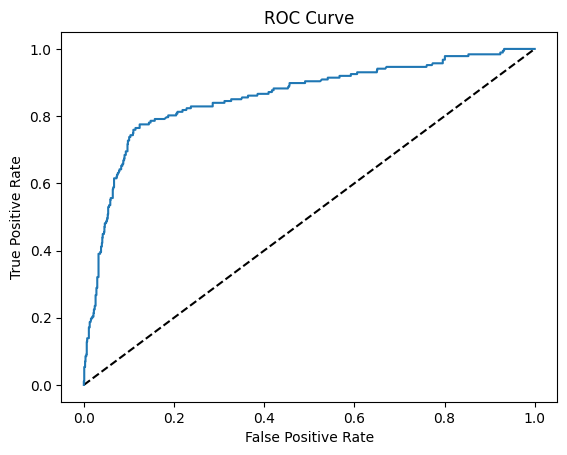

0.8567377687489419
[[962 112]
 [ 48 139]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      1074
           1       0.55      0.74      0.63       187

    accuracy                           0.87      1261
   macro avg       0.75      0.82      0.78      1261
weighted avg       0.89      0.87      0.88      1261



In [85]:
 #Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_valid_split, random_f_best.predict_proba(X_valid_preprocessed)[:,1])

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate roc_auc_score
print(roc_auc_score(y_valid_split, random_f_best.predict_proba(X_valid_preprocessed)[:,1]))

# Calculate the confusion matrix
print(confusion_matrix(y_valid_split, random_f_best.predict(X_valid_preprocessed)))

# Calculate the classification report
print(classification_report(y_valid_split, random_f_best.predict(X_valid_preprocessed)))

In [86]:
calculate_profit_metric_2(y_valid_split,random_f_best.predict_proba(X_valid_preprocessed)[:,1])

5.224115

In [87]:
data = {'ID': X_test["id"], 'PRED': random_f_best.predict_proba(X_test_preprocessed)[:,1]}

# Create DataFrame from the dictionary
df = pd.DataFrame(data)

# Display the DataFrame
file_path = 'C:\KU Leuven\Advanced Analytics\Assignment\predictions_pr_simple_2.csv'  # Specify the file path where you want to save the CSV file
df.to_csv(file_path, index=False)

In [ ]:
#5th 5.990489 0.799893

## BEST MODEL - Feature Importance (on the precision metric optimized, best position)

In [141]:
random_f_best = RandomForestClassifier(bootstrap=True, max_features=1,random_state=7,criterion="gini",n_estimators=50,class_weight='balanced_subsample',max_depth=2, min_samples_split=0.6)

random_f_best.fit(X_train_preprocessed,y_train_split)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=2,
                       max_features=1, min_samples_split=0.6, n_estimators=50,
                       random_state=7)

In [450]:
# random_f_best = RandomForestClassifier(bootstrap=True, max_features=1,random_state=7,criterion="gini",n_estimators=70,class_weight='balanced_subsample',min_samples_split=0.6)

# random_f_best.fit(X_train_preprocessed,y_train_split)

RandomForestClassifier(class_weight='balanced_subsample', max_features=1,
                       min_samples_split=0.6, n_estimators=70, random_state=7)

c:\KU Leuven\Advanced Analytics\Assignment\.venv\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: >

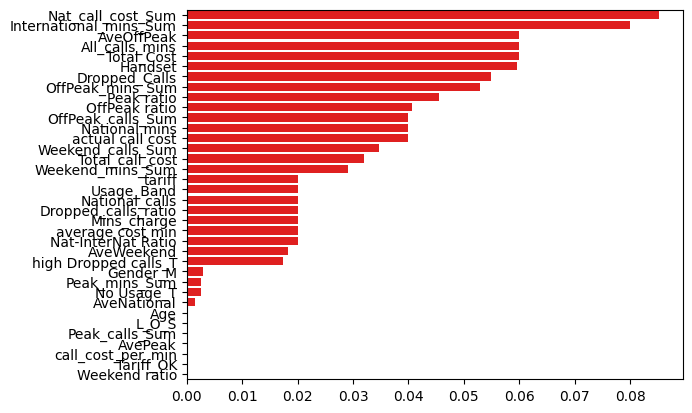

In [142]:
# Feature Importance 

diction = {key: value for key, value in zip(X_valid_preprocessed.columns.values, random_f_best.feature_importances_)}
sorted_dict = dict(sorted(diction.items(), key=lambda item: item[1], reverse=True))

sns.barplot(x=list(sorted_dict.values()),y=list(sorted_dict.keys()),color="red")

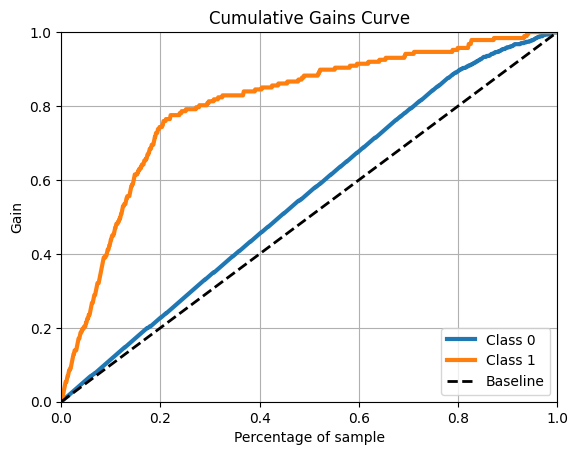

In [99]:
skplt.metrics.plot_cumulative_gain(y_valid_split, random_f_best.predict_proba(X_valid_preprocessed))
plt.show()

In [143]:
sorted_ft = sorted(random_f_best.feature_importances_)
sorted_ft

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0015074855157332782,
 0.0025400863131248897,
 0.002660745020278006,
 0.002914069638911439,
 0.017339254979721993,
 0.01826760669447292,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.029070582825222128,
 0.03195640671197601,
 0.034765005325236166,
 0.04,
 0.04,
 0.04,
 0.04064330108289736,
 0.04550350697489909,
 0.052980678592689755,
 0.05493514376245792,
 0.0596811318876152,
 0.06,
 0.06,
 0.06,
 0.08,
 0.08523499467476384]

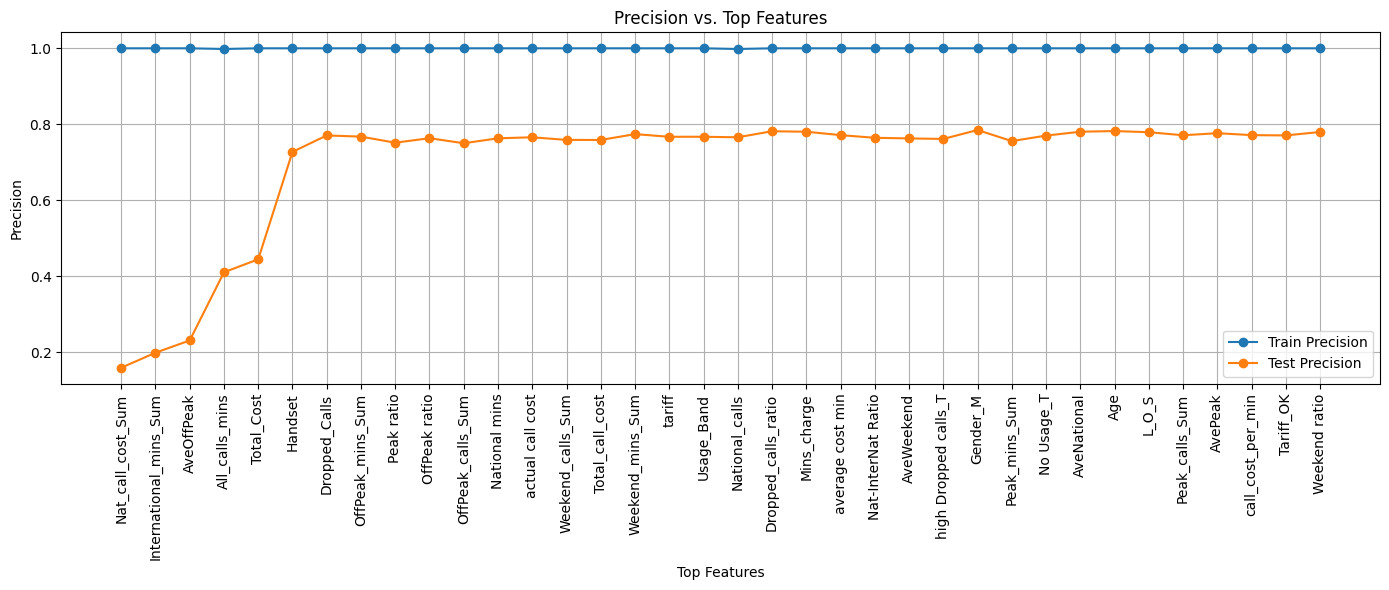

In [122]:

# Get feature importance dictionary
feature_importance_dict = {key: value for key, value in zip(X_train_preprocessed.columns.values, random_f_best.feature_importances_)}
sorted_dict = dict(sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True))

# Initialize lists to store precision scores
train_precision_scores = []
test_precision_scores = []

# Initialize the model
model = RandomForestClassifier()

# Iterate over increasing number of top features
for i in range(1, len(sorted_dict) + 1):
    top_features = list(sorted_dict.keys())[:i]
    
    # Train model using top features
    model.fit(X_train_preprocessed[top_features], y_train_split)
    
    # Predictions on train and test set
    train_pred = model.predict(X_train_preprocessed[top_features])
    test_pred = model.predict(X_valid_preprocessed[top_features])
    
    # Calculate precision scores
    train_precision = precision_score(y_train_split, train_pred)
    test_precision = precision_score(y_valid_split, test_pred)
    
    # Append precision scores to lists
    train_precision_scores.append(train_precision)
    test_precision_scores.append(test_precision)

# Plot precision scores
plt.figure(figsize=(14, 6))
plt.plot(list(sorted_dict.keys()), train_precision_scores, label='Train Precision', marker='o')
plt.plot(list(sorted_dict.keys()), test_precision_scores, label='Test Precision', marker='o')
plt.xlabel('Top Features')
plt.ylabel('Precision')
plt.title('Precision vs. Top Features')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

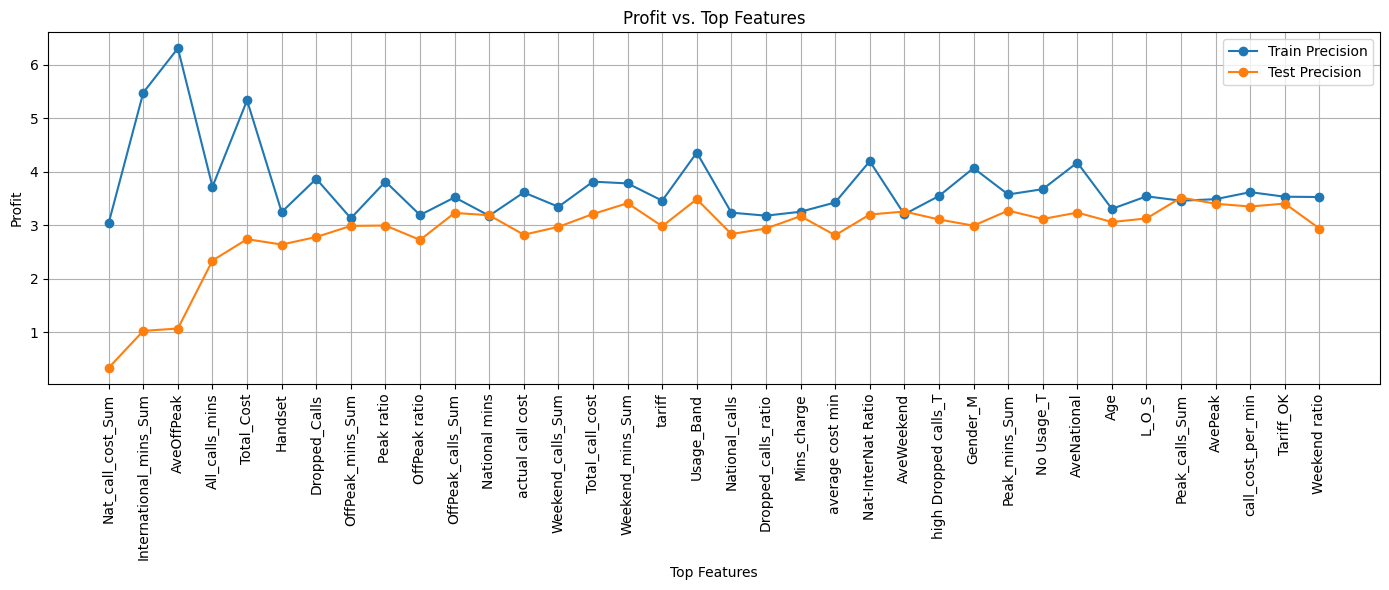

In [102]:
# Get feature importance dictionary
feature_importance_dict = {key: value for key, value in zip(X_train_preprocessed.columns.values, random_f_best.feature_importances_)}
sorted_dict = dict(sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True))

# Initialize lists to store precision scores
train_precision_scores = []
test_precision_scores = []

# Initialize the model
model = RandomForestClassifier()

# Iterate over increasing number of top features
for i in range(1, len(sorted_dict) + 1):
    top_features = list(sorted_dict.keys())[:i]
    
    # Train model using top features
    model.fit(X_train_preprocessed[top_features], y_train_split)
    
    # Predictions on train and test set
    train_pred = model.predict_proba(X_train_preprocessed[top_features])[:,1]
    test_pred = model.predict_proba(X_valid_preprocessed[top_features])[:,1]
    
    # Calculate precision scores
    train_precision = calculate_profit_metric_2(y_train_split, train_pred, dataset=X_train_preprocessed)
    test_precision = calculate_profit_metric_2(y_valid_split, test_pred, dataset=X_valid_preprocessed)
    
    # Append precision scores to lists
    train_precision_scores.append(train_precision)
    test_precision_scores.append(test_precision)

# Plot precision scores
plt.figure(figsize=(14, 6))
plt.plot(list(sorted_dict.keys()), train_precision_scores, label='Train Precision', marker='o')
plt.plot(list(sorted_dict.keys()), test_precision_scores, label='Test Precision', marker='o')
plt.xlabel('Top Features')
plt.ylabel('Profit')
plt.title('Profit vs. Top Features')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

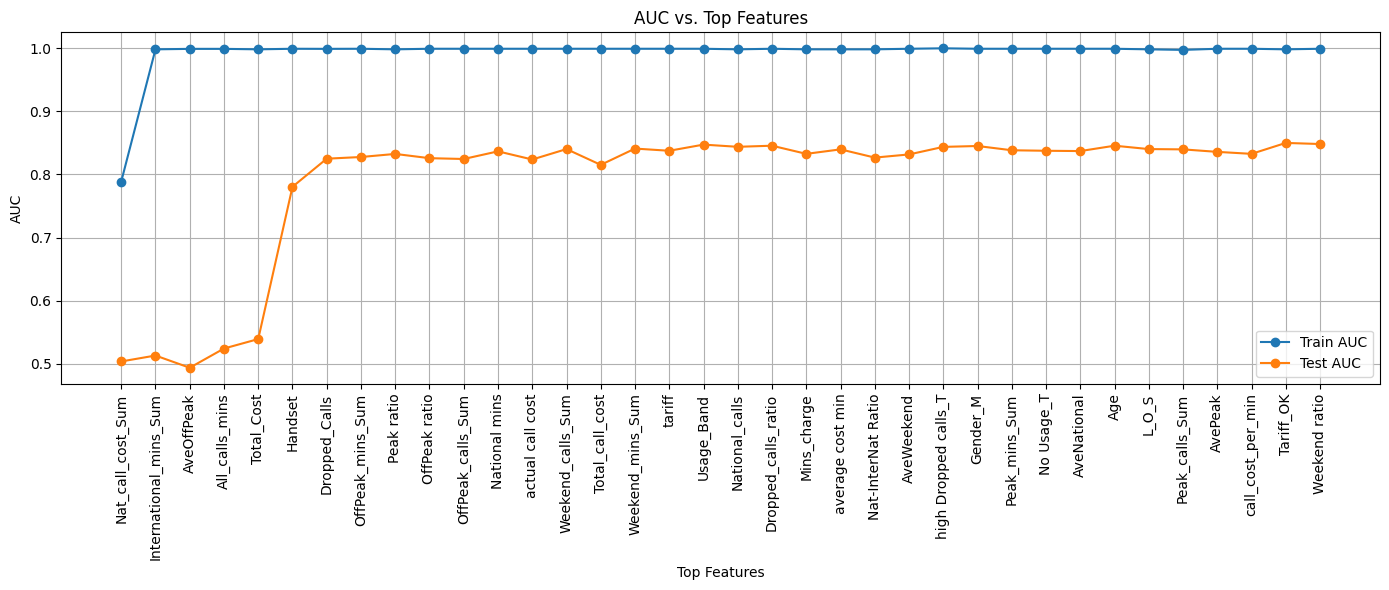

In [103]:
# Get feature importance dictionary
feature_importance_dict = {key: value for key, value in zip(X_train_preprocessed.columns.values, random_f_best.feature_importances_)}
sorted_dict = dict(sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True))

# Initialize lists to store precision scores
train_precision_scores = []
test_precision_scores = []

# Initialize the model
model = RandomForestClassifier()

# Iterate over increasing number of top features
for i in range(1, len(sorted_dict) + 1):
    top_features = list(sorted_dict.keys())[:i]
    
    # Train model using top features
    model.fit(X_train_preprocessed[top_features], y_train_split)
    
    # Predictions on train and test set
    train_pred = model.predict(X_train_preprocessed[top_features])
    test_pred = model.predict(X_valid_preprocessed[top_features])
    
    # Calculate precision scores
    train_precision = roc_auc_score(y_train_split, train_pred)
    test_precision = roc_auc_score(y_valid_split, test_pred)
    
    # Append precision scores to lists
    train_precision_scores.append(train_precision)
    test_precision_scores.append(test_precision)

# Plot precision scores
plt.figure(figsize=(14, 6))
plt.plot(list(sorted_dict.keys()), train_precision_scores, label='Train AUC', marker='o')
plt.plot(list(sorted_dict.keys()), test_precision_scores, label='Test AUC', marker='o')
plt.xlabel('Top Features')
plt.ylabel('AUC')
plt.title('AUC vs. Top Features')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

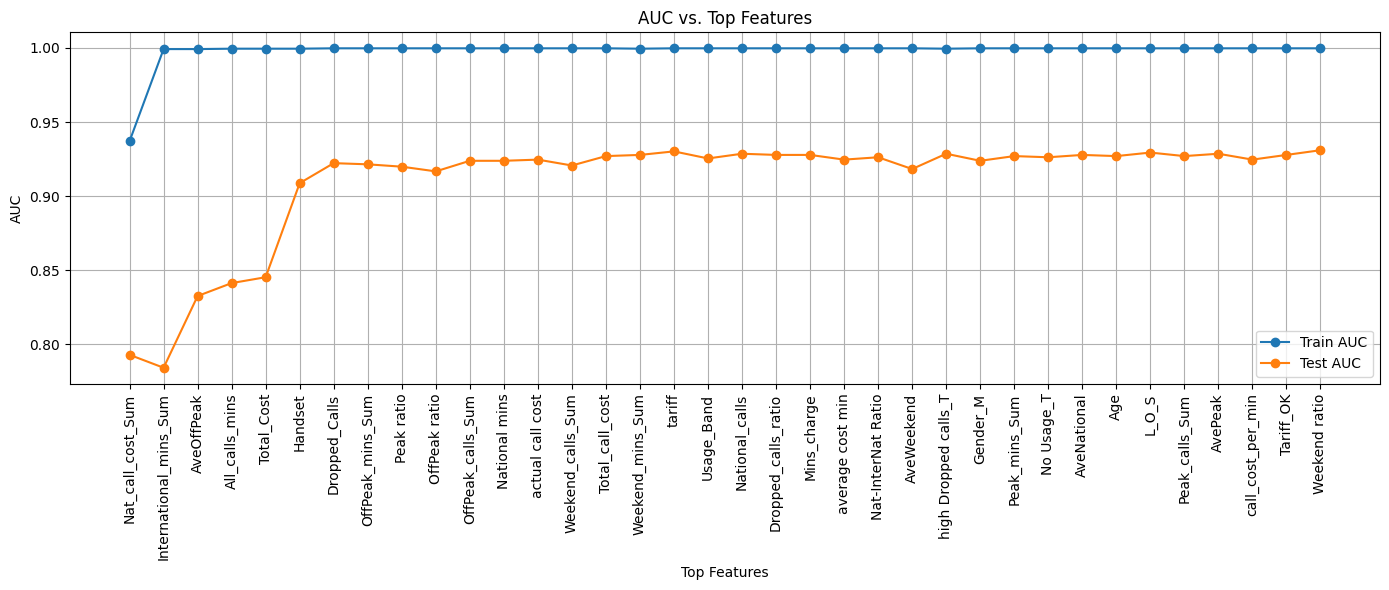

In [123]:
# Get feature importance dictionary
feature_importance_dict = {key: value for key, value in zip(X_train_preprocessed.columns.values, random_f_best.feature_importances_)}
sorted_dict = dict(sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True))

# Initialize lists to store precision scores
train_precision_scores = []
test_precision_scores = []

# Initialize the model
model = RandomForestClassifier()

# Iterate over increasing number of top features
for i in range(1, len(sorted_dict) + 1):
    top_features = list(sorted_dict.keys())[:i]
    
    # Train model using top features
    model.fit(X_train_preprocessed[top_features], y_train_split)
    
    # Predictions on train and test set
    train_pred = model.predict(X_train_preprocessed[top_features])
    test_pred = model.predict(X_valid_preprocessed[top_features])
    
    # Calculate precision scores
    train_precision = accuracy_score(y_train_split, train_pred)
    test_precision = accuracy_score(y_valid_split, test_pred)
    
    # Append precision scores to lists
    train_precision_scores.append(train_precision)
    test_precision_scores.append(test_precision)

# Plot precision scores
plt.figure(figsize=(14, 6))
plt.plot(list(sorted_dict.keys()), train_precision_scores, label='Train AUC', marker='o')
plt.plot(list(sorted_dict.keys()), test_precision_scores, label='Test AUC', marker='o')
plt.xlabel('Top Features')
plt.ylabel('AUC')
plt.title('AUC vs. Top Features')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

In [262]:
random_f_best.feature_importances_

array([0.07142857, 0.07142857, 0.04285714, 0.01428571, 0.08571429,
       0.07142857, 0.02857143, 0.07142857, 0.04285714, 0.01428571,
       0.05714286, 0.12857143, 0.04285714, 0.07142857, 0.        ,
       0.07142857, 0.02857143, 0.01428571, 0.05714286, 0.01428571])

In [106]:
X_train_preprocessed.columns

Index(['Gender_M', 'high Dropped calls_T', 'No Usage_T', 'tariff', 'Handset',
       'Usage_Band', 'Age', 'L_O_S', 'Dropped_Calls', 'Peak_calls_Sum',
       'Peak_mins_Sum', 'OffPeak_calls_Sum', 'OffPeak_mins_Sum',
       'Weekend_calls_Sum', 'Weekend_mins_Sum', 'International_mins_Sum',
       'Nat_call_cost_Sum', 'AvePeak', 'AveOffPeak', 'AveWeekend',
       'National_calls', 'National mins', 'AveNational', 'All_calls_mins',
       'Dropped_calls_ratio', 'Mins_charge', 'call_cost_per_min',
       'actual call cost', 'Total_call_cost', 'Total_Cost', 'Tariff_OK',
       'average cost min', 'Peak ratio', 'OffPeak ratio', 'Weekend ratio',
       'Nat-InterNat Ratio'],
      dtype='object')

In [144]:
mask = random_f_best.feature_importances_ > 0.034765005325236166
mask

array([False, False, False, False,  True, False, False, False,  True,
       False, False,  True,  True, False, False,  True,  True, False,
        True, False, False,  True, False,  True, False, False, False,
        True, False,  True, False, False,  True,  True, False, False])

In [145]:
reduced_train = X_train_preprocessed.loc[:,mask]
reduced_test = X_valid_preprocessed.loc[:,mask]
reduced_train.head()

Handset  Dropped_Calls  OffPeak_calls_Sum  OffPeak_mins_Sum  \
0 -0.951537            2.0              185.0        438.600001   
1  2.982628            1.0               98.0        164.700000   
2  0.007327            1.0               57.0        161.699999   
3 -2.908287            1.0              326.0        637.800000   
4 -0.135439            8.0                2.0        342.300000   

   International_mins_Sum  Nat_call_cost_Sum  AveOffPeak  National mins  \
0              126.002615           2.045727    2.370811     620.600001   
1              251.580636          41.072379    1.680612     920.700000   
2               23.998036          20.950771    2.836842     479.100000   
3               87.051515           0.000000    1.956442     961.800000   
4               33.928464          19.946237  171.150000     795.300000   

   All_calls_mins  actual call cost  Total_Cost  Peak ratio  OffPeak ratio  
0      746.602616          2.045727  112.386773    0.246536       0.706735  
1     1172.280636         41.072380  221.546571    0.780710       0.178886  
2      503.098036         20.820235  111.419646    0.662492       0.337508  
3     1048.851515          0.000000  112.760606    0.321896       0.663132  
4      829.228464         19.946237  135.124776    0.521313       0.430404

In [146]:
# reduced_train_new = reduced_train.drop(['National_calls','Dropped_calls_ratio','Mins_charge','average cost min'],axis=1)
# reduced_test_new = reduced_test.drop(['National_calls','Dropped_calls_ratio','Mins_charge','average cost min'],axis=1)
# reduced_train_new.head()

reduced_train_new = reduced_train.drop("actual call cost",axis=1)
reduced_test_new = reduced_test.drop("actual call cost",axis=1)
reduced_train_new.head()

reduced_train_new = reduced_train.drop(["actual call cost","National mins"],axis=1)
reduced_test_new = reduced_test.drop(["actual call cost","National mins"],axis=1)
reduced_train_new.head()



Handset  Dropped_Calls  OffPeak_calls_Sum  OffPeak_mins_Sum  \
0 -0.951537            2.0              185.0        438.600001   
1  2.982628            1.0               98.0        164.700000   
2  0.007327            1.0               57.0        161.699999   
3 -2.908287            1.0              326.0        637.800000   
4 -0.135439            8.0                2.0        342.300000   

   International_mins_Sum  Nat_call_cost_Sum  AveOffPeak  All_calls_mins  \
0              126.002615           2.045727    2.370811      746.602616   
1              251.580636          41.072379    1.680612     1172.280636   
2               23.998036          20.950771    2.836842      503.098036   
3               87.051515           0.000000    1.956442     1048.851515   
4               33.928464          19.946237  171.150000      829.228464   

   Total_Cost  Peak ratio  OffPeak ratio  
0  112.386773    0.246536       0.706735  
1  221.546571    0.780710       0.178886  
2  111.419646    0.662492       0.337508  
3  112.760606    0.321896       0.663132  
4  135.124776    0.521313       0.430404

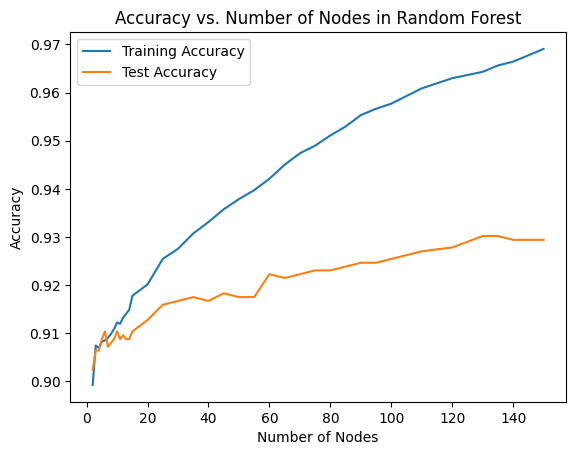

In [451]:
# Define a range of values for the number of nodes
node_values = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,110,120,130,135,140]  # Adjust this range as needed

# Initialize lists to store accuracy values
train_accuracies = []
test_accuracies = []

# Train Random Forest models with different numbers of nodes
for num_nodes in node_values:
    # Create and fit Random Forest model
    rf_model = RandomForestClassifier(bootstrap=True, max_features=2,random_state=7,criterion="gini",n_estimators=80,class_weight='balanced', max_leaf_nodes=num_nodes)
    rf_model.fit(reduced_train, y_train_split)

    #RandomForestClassifier(bootstrap=True, max_features="log2", random_state=45, class_weight="balanced")
    # Predict on training and test data
    train_preds = rf_model.predict(reduced_train)
    test_preds = rf_model.predict(reduced_test)
    
    # Calculate accuracy and append to lists
    train_accuracy = accuracy_score(y_train_split, train_preds)
    test_accuracy = accuracy_score(y_valid_split, test_preds)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

plt.plot(node_values, train_accuracies, label='Training Accuracy')
plt.plot(node_values, test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Nodes')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Nodes in Random Forest')
plt.legend()
plt.show()

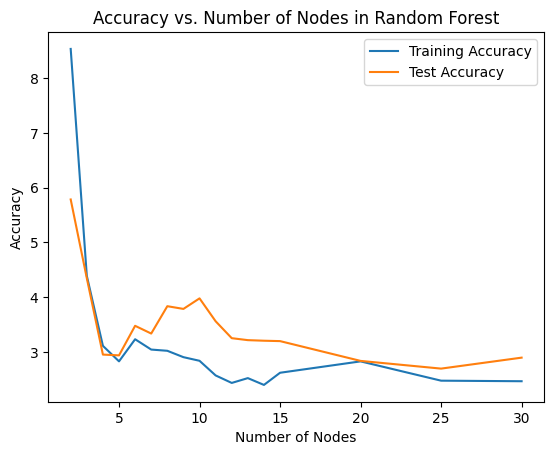

In [461]:
# Define a range of values for the number of nodes
node_values = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30]   # Adjust this range as needed

# Initialize lists to store accuracy values
train_accuracies = []
test_accuracies = []

# Train Random Forest models with different numbers of nodes
for num_nodes in node_values:
    # Create and fit Random Forest model
    rf_model = RandomForestClassifier(bootstrap=True, max_features=2,random_state=7,criterion="gini",n_estimators=80,class_weight='balanced', max_leaf_nodes=num_nodes)
    rf_model.fit(reduced_train, y_train_split)

    #RandomForestClassifier(bootstrap=True, max_features="log2", random_state=45, class_weight="balanced")
    # Predict on training and test data
    train_preds = rf_model.predict_proba(reduced_train)[:,1]
    test_preds = rf_model.predict_proba(reduced_test)[:,1]
    
    # Calculate accuracy and append to lists
    train_accuracy = calculate_profit_metric_2(y_train_split, train_preds, dataset=X_train_preprocessed)
    test_accuracy = calculate_profit_metric_2(y_valid_split, test_preds, dataset=X_valid_preprocessed)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

plt.plot(node_values, train_accuracies, label='Training Accuracy')
plt.plot(node_values, test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Nodes')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Nodes in Random Forest')
plt.legend()
plt.show()

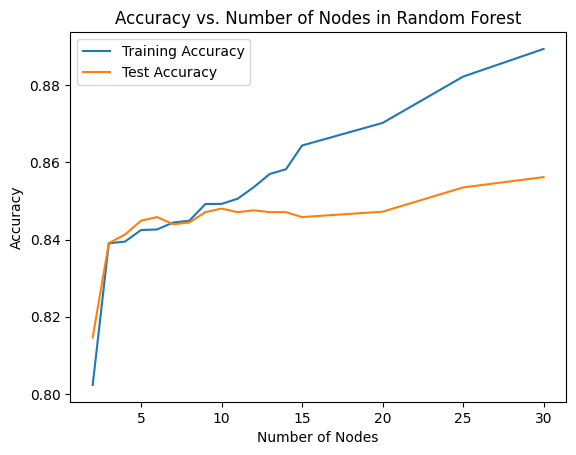

In [460]:
# Define a range of values for the number of nodes
node_values = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30]  # Adjust this range as needed

# Initialize lists to store accuracy values
train_accuracies = []
test_accuracies = []

# Train Random Forest models with different numbers of nodes
for num_nodes in node_values:
    # Create and fit Random Forest model
    rf_model = RandomForestClassifier(bootstrap=True, max_features=2,random_state=7,criterion="gini",n_estimators=80,class_weight='balanced', max_leaf_nodes=num_nodes)
    rf_model.fit(reduced_train, y_train_split)

    #RandomForestClassifier(bootstrap=True, max_features="log2", random_state=45, class_weight="balanced")
    # Predict on training and test data
    train_preds = rf_model.predict(reduced_train)
    test_preds = rf_model.predict(reduced_test)
    
    # Calculate accuracy and append to lists
    train_accuracy = roc_auc_score(y_train_split, train_preds)
    test_accuracy = roc_auc_score(y_valid_split, test_preds)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

plt.plot(node_values, train_accuracies, label='Training Accuracy')
plt.plot(node_values, test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Nodes')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Nodes in Random Forest')
plt.legend()
plt.show()

In [147]:
random_f_best = RandomForestClassifier(bootstrap=True, max_features=1,random_state=7,criterion="gini",n_estimators=50,class_weight='balanced_subsample',max_depth=2, min_samples_split=0.6)

random_f_best.fit(reduced_train_new,y_train_split)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=2,
                       max_features=1, min_samples_split=0.6, n_estimators=50,
                       random_state=7)

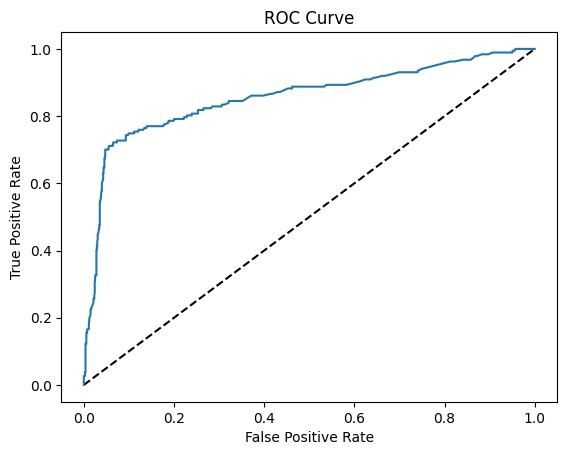

0.8557419412660952
[[957 117]
 [ 47 140]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1074
           1       0.54      0.75      0.63       187

    accuracy                           0.87      1261
   macro avg       0.75      0.82      0.78      1261
weighted avg       0.89      0.87      0.88      1261



In [148]:
 #Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_valid_split, random_f_best.predict_proba(reduced_test_new)[:,1])

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate roc_auc_score
print(roc_auc_score(y_valid_split, random_f_best.predict_proba(reduced_test_new)[:,1]))

# Calculate the confusion matrix
print(confusion_matrix(y_valid_split, random_f_best.predict(reduced_test_new)))

# Calculate the classification report
print(classification_report(y_valid_split, random_f_best.predict(reduced_test_new)))

In [149]:
calculate_profit_metric_2(y_valid_split, random_f_best.predict_proba(reduced_test_new)[:,1], dataset=X_valid_preprocessed)

5.203067

In [150]:
data = {'ID': X_test["id"], 'PRED': random_f_best.predict_proba(X_test_preprocessed.loc[:,reduced_test_new.columns])[:,1]}

# Create DataFrame from the dictionary
df = pd.DataFrame(data)

# Display the DataFrame
file_path = 'C:\KU Leuven\Advanced Analytics\Assignment\predictions_pr_simple_importance'  # Specify the file path where you want to save the CSV file
df.to_csv(file_path, index=False)

In [ ]:
 #4th 6.561372 0.834425 up to Dropped calls] BEST SO FAR 
# 5th 6.126433 0.847662 simple up to UsageBand]
#4th 6.699146 0.81367 simple up to NationalMins]
 #4th	6.451097 0.799153 simple up to OffPeakcallsSum 


## RFECV 

In [ ]:
# Hyperparameters with precision
# {'class_weight': 'balanced_subsample',
#  'criterion': 'entropy',
#  'max_features': 1,
#  'n_estimators': 120
#   max_leaf_nodes=115} 

# profit
# {'class_weight': 'balanced',
#  'criterion': 'gini',
#  'max_features': 2,
#  'n_estimators': 80
#max_leaf_nodes=100)}

In [153]:
random_rfe = RandomForestClassifier(bootstrap=True, max_features=1,random_state=7,criterion="gini",n_estimators=50,class_weight='balanced_subsample',max_depth=2, min_samples_split=0.6)
#random_rfe = RandomForestClassifier(bootstrap=True, max_features=1,random_state=7,criterion="entropy",n_estimators=120, class_weight="balanced_subsample")
rfecv = RFECV(random_rfe, cv=stratified_splitter, scoring="roc_auc", min_features_to_select=1)
rfecv.fit(X_train_preprocessed, y_train_split)
rfecv.n_features_

36

In [154]:
mask_rfe = rfecv.get_support()
mask_rfe

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [155]:
reduced_train_rfe = X_train_preprocessed.loc[:,rfecv.get_support()]
reduced_test_rfe = X_valid_preprocessed.loc[:,rfecv.get_support()]

In [156]:
reduced_test_rfe.head()

Gender_M  high Dropped calls_T  No Usage_T    tariff   Handset  Usage_Band  \
0       0.0                   0.0         0.0 -0.016968 -2.908287    0.756511   
1       1.0                   0.0         0.0 -0.173919  0.007327   -0.271153   
2       0.0                   1.0         0.0 -0.016968 -0.135439    0.756511   
3       1.0                   0.0         0.0  0.033322 -0.135439    0.008762   
4       0.0                   0.0         0.0  0.033322 -1.660876    0.008762   

    Age      L_O_S  Dropped_Calls  Peak_calls_Sum  Peak_mins_Sum  \
0  46.0  38.066667            1.0           160.0     322.800000   
1  39.0  32.200000           10.0           236.0     528.000000   
2  28.0  47.600000           14.0           221.0     332.400000   
3  23.0  50.900000            3.0           658.0    1516.200001   
4  56.0  11.733333            8.0           300.0     742.800000   

   OffPeak_calls_Sum  OffPeak_mins_Sum  Weekend_calls_Sum  Weekend_mins_Sum  \
0                7.0             123.9                0.0          0.000000   
1               32.0              67.5               15.0         62.400000   
2               14.0             128.7                7.0         14.400000   
3               17.0              92.4               54.0         88.200001   
4              100.0             544.8                9.0        112.200000   

   International_mins_Sum  Nat_call_cost_Sum   AvePeak  AveOffPeak  \
0               91.584877          21.575073  2.017500   17.700000   
1               24.846683           7.541785  2.237288    2.109375   
2               76.898743          21.043392  1.504072    9.192857   
3              400.284283          47.036139  2.304255    5.435294   
4              262.890611          15.291166  2.476000    5.448000   

   AveWeekend  National_calls  National mins  AveNational  All_calls_mins  \
0    0.000000           167.0     446.700000     2.674850      538.284877   
1    4.160000           283.0     657.900000     2.324735      682.746683   
2    2.057143           242.0     475.500000     1.964876      552.398743   
3    1.633333           729.0    1696.800002     2.327572     2097.084285   
4   12.466667           409.0    1399.800000     3.422494     1662.690611   

   Dropped_calls_ratio  Mins_charge  call_cost_per_min  actual call cost  \
0             0.002994   146.700000          12.226326         17.936021   
1             0.017668    57.900000          13.025536          7.541785   
2             0.028926   175.500000          11.990536         21.043391   
3             0.002058   496.800002           9.467822         47.036139   
4             0.009780   199.800000           7.653236         15.291166   

   Total_call_cost  Total_Cost  Tariff_OK  average cost min  Peak ratio  \
0        45.411484  128.811484          1          0.239300    0.722633   
1        14.995790  119.995790          1          0.175754    0.802554   
2        44.113014  127.513014          1          0.230835    0.699054   
3       167.121424  317.121424          1          0.151220    0.893564   
4        94.158349  244.158349          1          0.146845    0.530647   

   OffPeak ratio  Weekend ratio  Nat-InterNat Ratio  
0       0.277367       0.000000            0.205025  
1       0.102599       0.094847            0.037767  
2       0.270662       0.030284            0.161722  
3       0.054455       0.051980            0.235905  
4       0.389198       0.080154            0.187806

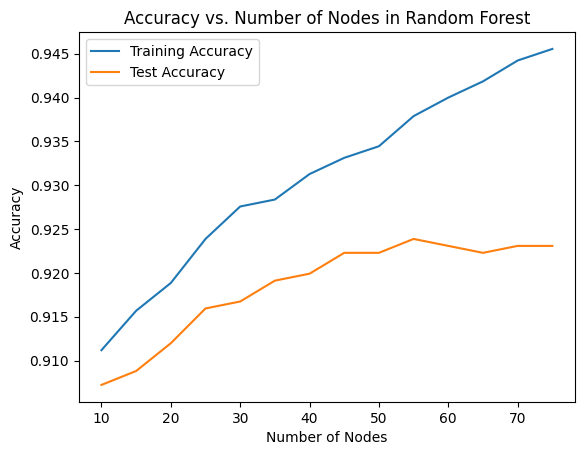

In [443]:
# Define a range of values for the number of nodes
node_values = [10,15,20,25,30,35,40,45,50,55,60,65,70,75]  # Adjust this range as needed

# Initialize lists to store accuracy values
train_accuracies = []
test_accuracies = []

# Train Random Forest models with different numbers of nodes
for num_nodes in node_values:
    # Create and fit Random Forest model
    rf_model = RandomForestClassifier(bootstrap=True, max_features=1,random_state=7,criterion="entropy",n_estimators=120,class_weight='balanced_subsample',max_leaf_nodes=num_nodes)
    rf_model.fit(reduced_train_rfe, y_train_split)
    #RandomForestClassifier(bootstrap=True, max_features="log2", random_state=45, class_weight="balanced")
    # Predict on training and test data
    train_preds = rf_model.predict(reduced_train_rfe)
    test_preds = rf_model.predict(reduced_test_rfe)
    
    # Calculate accuracy and append to lists
    train_accuracy = accuracy_score(y_train_split, train_preds)
    test_accuracy = accuracy_score(y_valid_split, test_preds)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

plt.plot(node_values, train_accuracies, label='Training Accuracy')
plt.plot(node_values, test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Nodes')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Nodes in Random Forest')
plt.legend()
plt.show()

In [157]:
random_rfe = RandomForestClassifier(bootstrap=True, max_features=1,random_state=7,criterion="gini",n_estimators=50,class_weight='balanced_subsample',max_depth=2, min_samples_split=0.6)
random_rfe.fit(reduced_train_rfe,y_train_split)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=2,
                       max_features=1, min_samples_split=0.6, n_estimators=50,
                       random_state=7)

In [158]:
calculate_profit_metric_2(y_valid_split,random_rfe.predict_proba(reduced_test_rfe)[:,1], dataset=X_valid_preprocessed)

5.224115

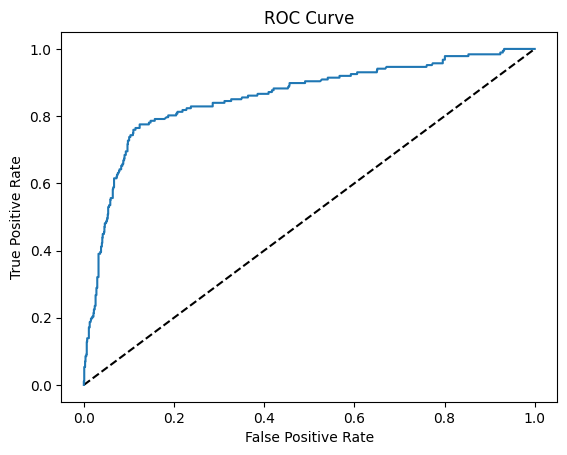

0.8567377687489419
[[962 112]
 [ 48 139]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      1074
           1       0.55      0.74      0.63       187

    accuracy                           0.87      1261
   macro avg       0.75      0.82      0.78      1261
weighted avg       0.89      0.87      0.88      1261



In [159]:
 #Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_valid_split, random_rfe.predict_proba(reduced_test_rfe)[:,1])

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate roc_auc_score
print(roc_auc_score(y_valid_split, random_rfe.predict_proba(reduced_test_rfe)[:,1]))

# Calculate the confusion matrix
print(confusion_matrix(y_valid_split, random_rfe.predict(reduced_test_rfe)))

# Calculate the classification report
print(classification_report(y_valid_split, random_rfe.predict(reduced_test_rfe)))

In [160]:
data = {'ID': X_test["id"], 'PRED': random_rfe.predict_proba(X_test_preprocessed.loc[:,reduced_test_rfe.columns])[:,1]}

# Create DataFrame from the dictionary
df = pd.DataFrame(data)

# Display the DataFrame
file_path = 'C:\KU Leuven\Advanced Analytics\Assignment\predictions_pr_simple_rfe.csv'  # Specify the file path where you want to save the CSV file
df.to_csv(file_path, index=False)

In [ ]:
 	#5th 6.074948 0.864278
 	#5th 5.9904890.799893 simple

## K-Best

In [163]:
# Specify L2 regularization
#liblinear is the optimization method used to estimate the coefficients. liblinear is need for l1

random_k_best = RandomForestClassifier(random_state=8, bootstrap=True)

pipeline = Pipeline(
    [
     ('selector',SelectKBest(f_regression)),
     ('model',random_k_best)
    ]
)

param_grid = {
    'model__n_estimators' : [50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200],
    'model__max_features' : [1,2,"log2"],
    'selector__k' : [1,2,3,4,5,6],
    'model__class_weight' : ["balanced", "balanced_subsample"],
    'model__max_depth' : [2,3,4,5,6],
    'model__min_samples_split' : [0.1,0.2,0.3,0.4,0.5,0.6]

}
scoring = {"Profit": custom_scorer, "AUC": "roc_auc"}


# Instantiate the GridSearchCV object and run the search
# The GridSeachCV object, when fitted on the data, creates 5-fold splits for every C value and calculates a default scoring metric
searcher_random = RandomizedSearchCV(pipeline, param_grid, cv=stratified_splitter, scoring=scoring, refit="Profit",random_state=22)
searcher_random.fit(X_train_preprocessed, y_train_split)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('selector',
                                              SelectKBest(score_func=<function f_regression at 0x00000172E1C8A440>)),
                                             ('model',
                                              RandomForestClassifier(random_state=8))]),
                   param_distributions={'model__class_weight': ['balanced',
                                                                'balanced_subsample'],
                                        'model__max_depth': [2, 3, 4, 5, 6],
                                        'model__max_features': [1, 2, 'log2'],
                                        'model__min_samples_split': [0.1, 0.2,
                                                                     0.3, 0.4,
                                                                     0.5, 0.6],
                                        'model__n_estimators': [50, 60, 70, 80,
                                                                90, 100, 110,
                                                                120, 130, 140,
                                                                150, 160, 170,
                                                                180, 190, 200],
                                        'selector__k': [1, 2, 3, 4, 5, 6]},
                   refit='Profit',
                   scoring={'AUC': 'roc_auc',
                            'Profit': <function custom_scorer at 0x00000172E238B400>})

In [164]:
searcher_random.best_params_

{'selector__k': 6,
 'model__n_estimators': 120,
 'model__min_samples_split': 0.1,
 'model__max_features': 'log2',
 'model__max_depth': 2,
 'model__class_weight': 'balanced'}

In [ ]:
# Simple Profit 
# {'selector__k': 6,
#  'model__n_estimators': 120,
#  'model__min_samples_split': 0.1,
#  'model__max_features': 'log2',
#  'model__max_depth': 2,
#  'model__class_weight': 'balanced'}




# profit 

# {'selector__k': 2,
#  'model__n_estimators': 120,
#  'model__max_features': '2',
#  'model__class_weight': 'balanced'}

# precision
# {'model__class_weight': 'balanced',
#  'model__max_features': 1,
#  'model__n_estimators': 50,
#  'selector__k': 2}

In [165]:

# Get the best pipeline
best_pipeline = searcher_random.best_estimator_

# Extract the best feature selector from the pipeline
best_selector = best_pipeline.named_steps['selector']

In [166]:
mask_anova = best_selector.get_support()
mask_anova

array([False,  True, False,  True,  True,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False])

In [168]:
# Get the indices of the selected features
selected_indices = best_selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X_train_preprocessed.columns[selected_indices]
selected_feature_names

Index(['high Dropped calls_T', 'tariff', 'Handset', 'Usage_Band',
       'Dropped_Calls', 'Tariff_OK'],
      dtype='object')

In [169]:
reduced_train_anova = X_train_preprocessed.loc[:,selected_feature_names]
reduced_test_anove = X_valid_preprocessed.loc[:,selected_feature_names]

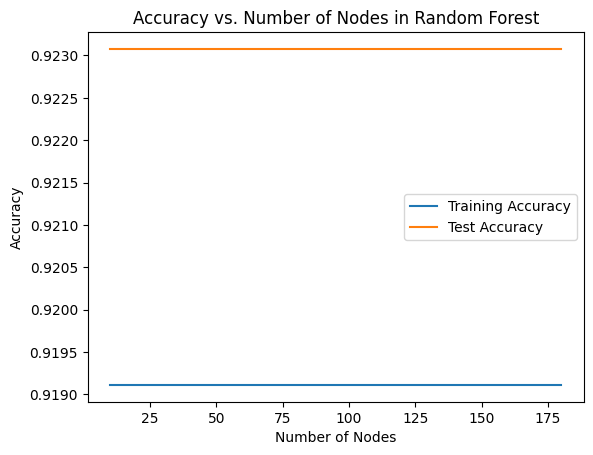

In [285]:
# Define a range of values for the number of nodes
node_values = [10,15,20,25,30,35,40,45,50,55,65,70,75,80,85,90,95,100,105,110,120,130,140,150,155,160,165,170,175,180]  # Adjust this range as needed

# Initialize lists to store accuracy values
train_accuracies = []
test_accuracies = []

# Train Random Forest models with different numbers of nodes
for num_nodes in node_values:
    # Create and fit Random Forest model
    rf_model = RandomForestClassifier(bootstrap=True, max_features=1,random_state=7,criterion="gini",n_estimators=50, class_weight="balanced" ,max_leaf_nodes=num_nodes)
    rf_model.fit(reduced_train_anova, y_train_split)
    #RandomForestClassifier(bootstrap=True, max_features="log2", random_state=45, class_weight="balanced")
    # Predict on training and test data
    train_preds = rf_model.predict(reduced_train_anova)
    test_preds = rf_model.predict(reduced_test_anove)
    
    # Calculate accuracy and append to lists
    train_accuracy = accuracy_score(y_train_split, train_preds)
    test_accuracy = accuracy_score(y_valid_split, test_preds)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

plt.plot(node_values, train_accuracies, label='Training Accuracy')
plt.plot(node_values, test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Nodes')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Nodes in Random Forest')
plt.legend()
plt.show()

In [171]:
random_k_best = RandomForestClassifier(bootstrap=True, max_features="log2",random_state=7,criterion="gini",n_estimators=120,class_weight='balanced',max_depth=2, min_samples_split=0.1)
random_k_best.fit(reduced_train_anova,y_train_split)

RandomForestClassifier(class_weight='balanced', max_depth=2,
                       max_features='log2', min_samples_split=0.1,
                       n_estimators=120, random_state=7)

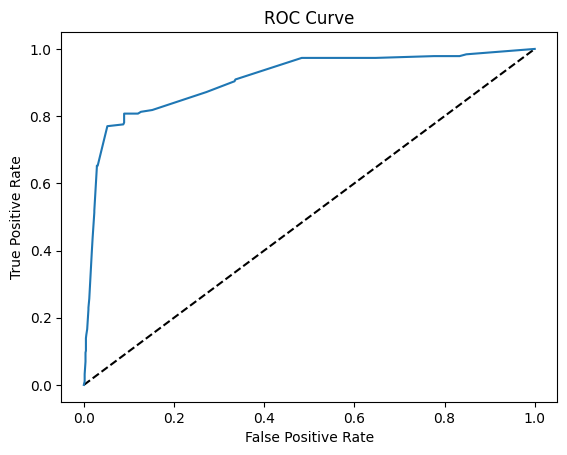

0.9086402971549208
[[1041   33]
 [  65  122]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1074
           1       0.79      0.65      0.71       187

    accuracy                           0.92      1261
   macro avg       0.86      0.81      0.83      1261
weighted avg       0.92      0.92      0.92      1261



In [172]:
 #Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_valid_split, random_k_best.predict_proba(reduced_test_anove)[:,1])

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate roc_auc_score
print(roc_auc_score(y_valid_split, random_k_best.predict_proba(reduced_test_anove)[:,1]))

# Calculate the confusion matrix
print(confusion_matrix(y_valid_split, random_k_best.predict(reduced_test_anove)))

# Calculate the classification report
print(classification_report(y_valid_split, random_k_best.predict(reduced_test_anove)))

In [173]:
calculate_profit_metric_2(y_valid_split, random_k_best.predict_proba(reduced_test_anove)[:,1], dataset=X_valid_preprocessed)

2.994677

In [176]:
data = {'ID': X_test["id"], 'PRED': random_k_best.predict_proba(X_test_preprocessed.loc[:,reduced_test_anove.columns])[:,1]}

# Create DataFrame from the dictionary
df = pd.DataFrame(data)

# Display the DataFrame
file_path = 'C:\KU Leuven\Advanced Analytics\Assignment\predictions_simple_best.csv'  # Specify the file path where you want to save the CSV file
df.to_csv(file_path, index=False)

In [ ]:
#10th 3.936732 0.749565 profit 
#10th 	3.936732 0.749565 precision

## SHAP Values

In [ ]:
# Hyperparameters with precision
# {'class_weight': 'balanced_subsample',
#  'criterion': 'entropy',
#  'max_features': 1,
#  'n_estimators': 120
#   max_leaf_nodes=115} 

# Hyperparameters with profit
# {'class_weight': 'balanced',
#  'criterion': 'gini',
#  'max_features': 2,
#  'n_estimators': 80
#max_leaf_nodes=100)}

In [42]:
# BEST MODEL MINE

random_grid = RandomForestClassifier(bootstrap=True, max_features=1,random_state=7,criterion="gini",n_estimators=50,class_weight='balanced_subsample',max_depth=2, min_samples_split=0.6)
random_grid.fit(X_train_preprocessed,y_train_split)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=2,
                       max_features=1, min_samples_split=0.6, n_estimators=50,
                       random_state=7)

In [230]:
# BEST MODEL LENNERT
# random_grid=RandomForestClassifier(bootstrap=True, random_state=42, class_weight='balanced',max_depth=1, min_samples_split= 2, n_estimators= 141)
# random_grid.fit(X_train_preprocessed,y_train_split)

RandomForestClassifier(class_weight='balanced', max_depth=1, n_estimators=141,
                       random_state=42)

PermutationExplainer explainer: 1262it [01:01, 18.20it/s]                          


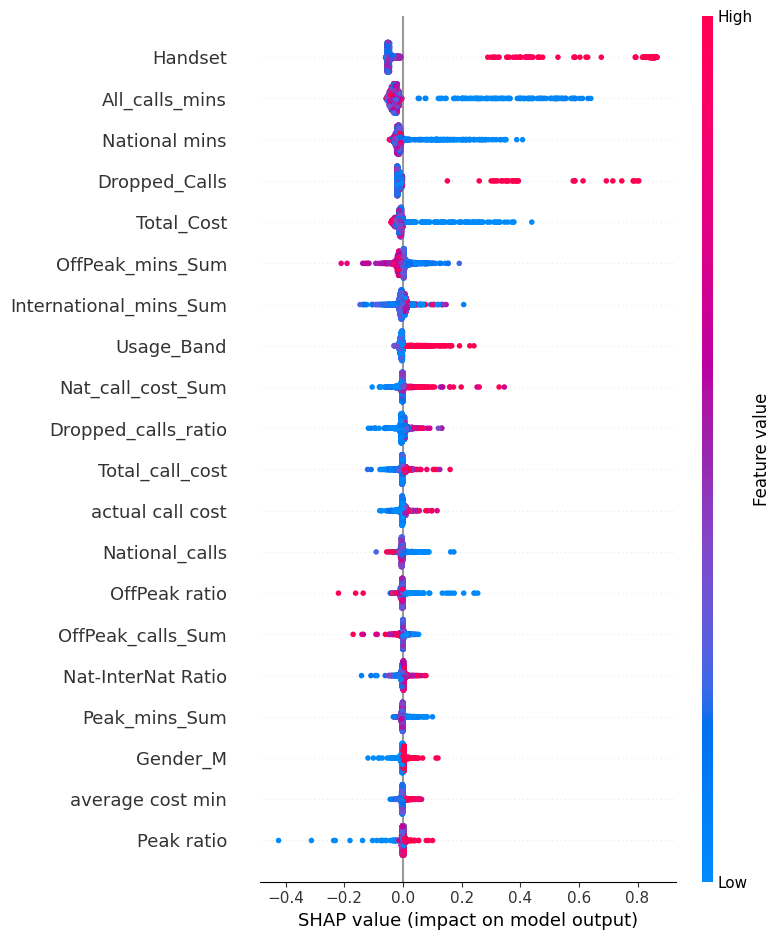

In [43]:
explainer = shap.Explainer(random_grid.predict,X_valid_preprocessed)
shap_values = explainer(X_valid_preprocessed)

shap.summary_plot(shap_values)

In [44]:
mean_shap_values = np.abs(shap_values.values).mean(axis=0)
mean_shap_values

array([0.00526849, 0.00480401, 0.00026   , 0.00341282, 0.11998017,
       0.01266625, 0.        , 0.        , 0.02704373, 0.        ,
       0.00529002, 0.00573864, 0.01646312, 0.00296307, 0.00358786,
       0.01378441, 0.01183924, 0.        , 0.00258865, 0.00458253,
       0.00771327, 0.03125524, 0.00048544, 0.06092444, 0.00930441,
       0.00429591, 0.        , 0.00790246, 0.00883709, 0.02496715,
       0.        , 0.00518976, 0.00491843, 0.00748499, 0.        ,
       0.00556248])

In [45]:
shap_dict = dict(zip(X_train_preprocessed.columns.values, mean_shap_values))
sorted_dict = dict(sorted(shap_dict.items(), key=lambda item: item[1], reverse=True))
sorted_dict

{'Handset': 0.11998017446471114,
 'All_calls_mins': 0.060924436388354146,
 'National mins': 0.03125523960575517,
 'Dropped_Calls': 0.027043729466409896,
 'Total_Cost': 0.02496714625580609,
 'OffPeak_mins_Sum': 0.01646312450436163,
 'International_mins_Sum': 0.013784411464823898,
 'Usage_Band': 0.012666251274498743,
 'Nat_call_cost_Sum': 0.011839243230995868,
 'Dropped_calls_ratio': 0.009304406933272955,
 'Total_call_cost': 0.00883709074430728,
 'actual call cost': 0.007902458366375912,
 'National_calls': 0.007713266115327994,
 'OffPeak ratio': 0.00748498923756659,
 'OffPeak_calls_Sum': 0.005738642800498474,
 'Nat-InterNat Ratio': 0.005562478758355065,
 'Peak_mins_Sum': 0.0052900192590914314,
 'Gender_M': 0.0052684943922057465,
 'average cost min': 0.005189758694913346,
 'Peak ratio': 0.004918432083380551,
 'high Dropped calls_T': 0.004804010422567127,
 'AveWeekend': 0.004582530871190681,
 'Mins_charge': 0.004295910275291726,
 'Weekend_mins_Sum': 0.003587855443525557,
 'tariff': 0.00341

In [46]:
X_train_shap = X_train_preprocessed.reindex(columns=sorted_dict.keys())

X_test_shap = X_valid_preprocessed.reindex(columns=sorted_dict.keys())

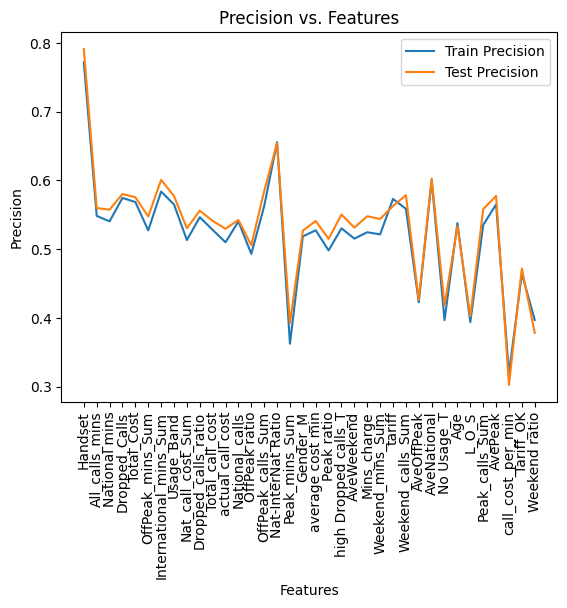

In [47]:
# Initialize lists to store error rates and number of features
train_errors = []
test_errors = []
num_features = []

# Store feature names
feature_names = X_train_shap.columns.tolist()

# Fit the model with increasing number of features
for i in range(1, X_train_shap.shape[1] + 1):
    random_grid.fit(X_train_shap.iloc[:, :i], y_train_split)  # Fit the model with the first i features
    
    # Predictions
    y_train_pred = random_grid.predict(X_train_shap.iloc[:, :i])
    y_test_pred = random_grid.predict(X_test_shap.iloc[:, :i])
    
    # Calculate error rates
    train_error = precision_score(y_train_split, y_train_pred)
    test_error = precision_score(y_valid_split, y_test_pred)
    
    # Append to lists
    train_errors.append(train_error)
    test_errors.append(test_error)
    num_features.append(i)

# Plot the error rates
plt.plot(feature_names, train_errors, label='Train Precision')
plt.plot(feature_names, test_errors, label='Test Precision')
plt.xlabel('Features')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.ylabel('Precision')
plt.title('Precision vs. Features')
plt.legend()
plt.show()

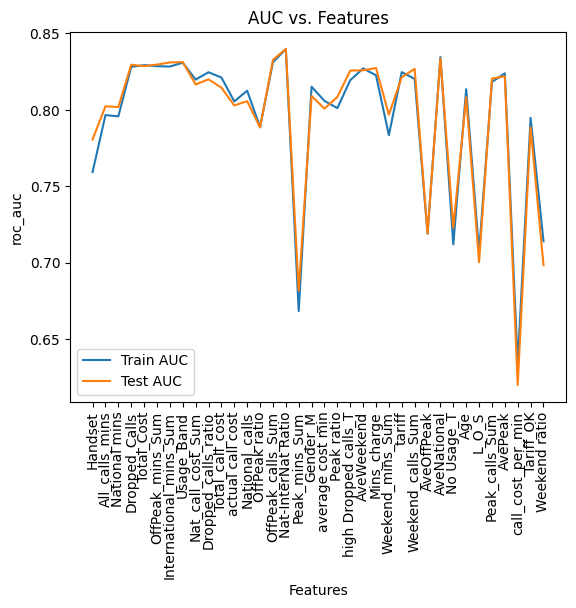

In [48]:
# Initialize lists to store error rates and number of features
train_errors = []
test_errors = []
num_features = []

# Store feature names
feature_names = X_train_shap.columns.tolist()

# Fit the model with increasing number of features
for i in range(1, X_train_shap.shape[1] + 1):
    random_grid.fit(X_train_shap.iloc[:, :i], y_train_split)  # Fit the model with the first i features
    
    # Predictions
    y_train_pred = random_grid.predict(X_train_shap.iloc[:, :i])
    y_test_pred = random_grid.predict(X_test_shap.iloc[:, :i])
    
    # Calculate error rates
    train_error = roc_auc_score(y_train_split, y_train_pred)
    test_error = roc_auc_score(y_valid_split, y_test_pred)
    
    # Append to lists
    train_errors.append(train_error)
    test_errors.append(test_error)
    num_features.append(i)

# Plot the error rates
plt.plot(feature_names, train_errors, label='Train AUC')
plt.plot(feature_names, test_errors, label='Test AUC')
plt.xlabel('Features')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.ylabel('roc_auc')
plt.title('AUC vs. Features')
plt.legend()
plt.show()

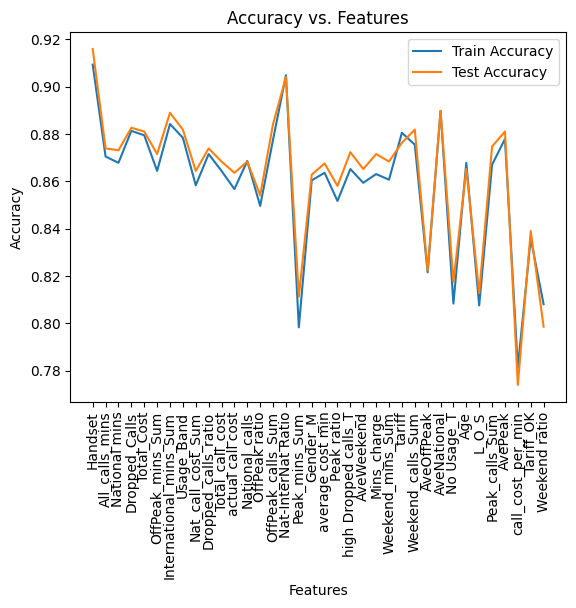

In [49]:
# Initialize lists to store error rates and number of features
train_errors = []
test_errors = []
num_features = []

# Store feature names
feature_names = X_train_shap.columns.tolist()

# Fit the model with increasing number of features
for i in range(1, X_train_shap.shape[1] + 1):
    random_grid.fit(X_train_shap.iloc[:, :i], y_train_split)  # Fit the model with the first i features
    
    # Predictions
    y_train_pred = random_grid.predict(X_train_shap.iloc[:, :i])
    y_test_pred = random_grid.predict(X_test_shap.iloc[:, :i])
    
    # Calculate error rates
    train_error = accuracy_score(y_train_split, y_train_pred)
    test_error = accuracy_score(y_valid_split, y_test_pred)
    
    # Append to lists
    train_errors.append(train_error)
    test_errors.append(test_error)
    num_features.append(i)

# Plot the error rates
plt.plot(feature_names, train_errors, label='Train Accuracy')
plt.plot(feature_names, test_errors, label='Test Accuracy')
plt.xlabel('Features')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Features')
plt.legend()
plt.show()

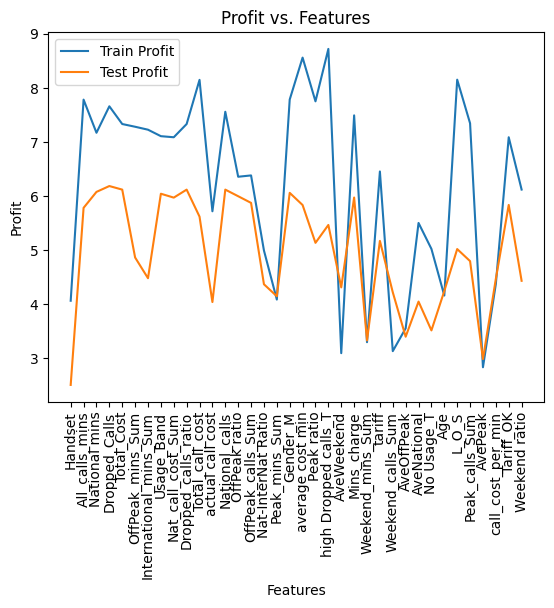

In [50]:
# Initialize lists to store error rates and number of features
train_errors = []
test_errors = []
num_features = []

# Store feature names
feature_names = X_train_shap.columns.tolist()

# Fit the model with increasing number of features
for i in range(1, X_train_shap.shape[1] + 1):
    random_grid.fit(X_train_shap.iloc[:, :i], y_train_split)  # Fit the model with the first i features
    
    # Predictions
    y_train_pred = random_grid.predict_proba(X_train_shap.iloc[:, :i])[:,1]
    y_test_pred = random_grid.predict_proba(X_test_shap.iloc[:, :i])[:,1]
    
    # Calculate error rates
    train_error = calculate_profit_metric_2(y_train_split, y_train_pred, dataset=X_train_preprocessed)
    test_error = calculate_profit_metric_2(y_valid_split, y_test_pred, dataset=X_valid_preprocessed)
    # train_error = roc_auc_score(y_train_smote, y_train_pred)
    # test_error = roc_auc_score(y_test, y_test_pred)
    
    # Append to lists
    train_errors.append(train_error)
    test_errors.append(test_error)
    num_features.append(i)

# Plot the error rates
plt.plot(feature_names, train_errors, label='Train Profit')
plt.plot(feature_names, test_errors, label='Test Profit')
plt.xlabel('Features')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.ylabel('Profit')
plt.title('Profit vs. Features')
plt.legend()
plt.show()

### Best precision - up to pca3

In [51]:
random_grid = RandomForestClassifier(bootstrap=True, max_features=1,random_state=7,criterion="gini",n_estimators=50,class_weight='balanced_subsample',max_depth=2, min_samples_split=0.6)

In [ ]:
# random_grid=RandomForestClassifier(bootstrap=True, random_state=42, class_weight='balanced',max_depth=1, min_samples_split= 2, n_estimators= 141)

In [52]:
mask_shap = mean_shap_values > 0.02496714625580609
mask_shap


array([False, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [53]:
shap_subset_train = X_train_preprocessed.loc[:,mask_shap]
shap_subset_test = X_valid_preprocessed.loc[:,mask_shap]
shap_subset_train.head()

Handset  Dropped_Calls  National mins  All_calls_mins
0 -0.951537            2.0     620.600001      746.602616
1  2.982628            1.0     920.700000     1172.280636
2  0.007327            1.0     479.100000      503.098036
3 -2.908287            1.0     961.800000     1048.851515
4 -0.135439            8.0     795.300000      829.228464

In [54]:
random_grid.fit(shap_subset_train,y_train_split)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=2,
                       max_features=1, min_samples_split=0.6, n_estimators=50,
                       random_state=7)

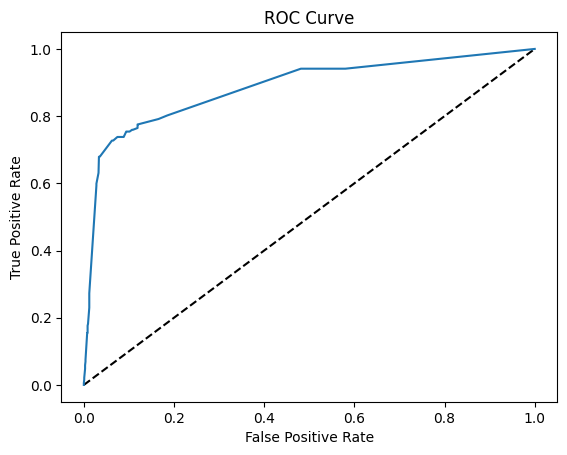

0.885019269261793
[[970 104]
 [ 46 141]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      1074
           1       0.58      0.75      0.65       187

    accuracy                           0.88      1261
   macro avg       0.77      0.83      0.79      1261
weighted avg       0.90      0.88      0.89      1261



In [55]:
 #Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_valid_split, random_grid.predict_proba(shap_subset_test)[:,1])

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate roc_auc_score
print(roc_auc_score(y_valid_split, random_grid.predict_proba(shap_subset_test)[:,1]))

# Calculate the confusion matrix
print(confusion_matrix(y_valid_split,  random_grid.predict(shap_subset_test)))

# Calculate the classification report
print(classification_report(y_valid_split,  random_grid.predict(shap_subset_test)))

In [56]:
calculate_profit_metric_2(y_valid_split, random_grid.predict_proba(shap_subset_test)[:,1], dataset=X_valid_preprocessed)

5.978004

In [57]:
data = {'ID': X_test["id"], 'PRED': random_grid.predict_proba(X_test_preprocessed.loc[:,shap_subset_test.columns])[:,1]}

# Create DataFrame from the dictionary
df = pd.DataFrame(data)

# Display the DataFrame
file_path = 'C:\KU Leuven\Advanced Analytics\Assignment\predictions_simple_shap.csv'  # Specify the file path where you want to save the CSV file
df.to_csv(file_path, index=False)

In [ ]:
#5th 5.971 0.853133 first 2 features best profit
#6th 5.709992 0.845251 next best profit 
#5th 6.150016 0.823073 best auc 

# up to average_cost_min]
#	6.728031 0.812714 up to National_calls]
#	6.823504 0.870438 up to Dropped_Calls]



In [ ]:
# Decide on precision or profit model --> Precision model and vote 

## Vote on methods to use 

In [95]:
votes = np.sum([mask,mask_rfe,mask_anova,mask_shap],axis=0)
print(votes)

[1 3 1 2 4 2 3 2 2 2 2 3 2 2 1 2 2 3 1 3 2]


In [148]:
meta_mask = votes > 3
meta_mask

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [149]:
reduced_vote_train = X_train_preprocessed.loc[:,meta_mask]
reduced_vote_test = X_valid_preprocessed.loc[:,meta_mask]

In [150]:
reduced_vote_train.head()

Handset
0 -0.951537
1  2.982628
2  0.007327
3 -2.908287
4 -0.135439

In [151]:
random_vote = RandomForestClassifier(bootstrap=True,random_state=7)

grid_param = {
    "n_estimators" : [50,70,100,120,150,180,200],
    'criterion': ['gini','entropy'],
    'class_weight' : ["balanced", "balanced_subsample"],
    'max_features' : [1,2,"log2","sqrt"]
}

scoring = {"Profit": custom_scorer, "AUC": "roc_auc"}


random_searcher = GridSearchCV(random_vote, grid_param, cv=stratified_splitter, scoring=scoring, refit="Profit")
random_searcher.fit(reduced_vote_train, y_train_split)

c:\KU Leuven\Advanced Analytics\Assignment\.venv\lib\site-packages\sklearn\model_selection\_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\KU Leuven\Advanced Analytics\Assignment\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 141, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
  File "C:\Users\Johnn\AppData\Local\Temp\ipykernel_17540\1004479836.py", line 12, in custom_scorer
    profit_df = pd.concat([X[['average cost min']], proba_df, y], axis=1)
  File "c:\KU Leuven\Advanced Analytics\Assignment\.venv\lib\site-packages\pandas\core\frame.py", line 4096, in __getitem__
    indexer = self.columns._get_indexer_strict(key, "columns")[1]
  File "c:\KU Leuven\Advanced Analytics\Assignment\.venv\lib\site-packages\pandas\core\indexes\base.py", line 6200, in _get_indexer_strict
    self._raise_if_missing(keyarr, 

KeyboardInterrupt: 

In [142]:
random_searcher.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_features': 2,
 'n_estimators': 50}

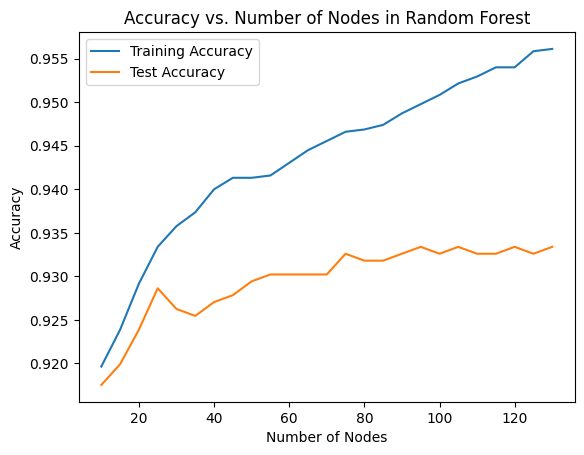

In [143]:
# Define a range of values for the number of nodes
node_values = [10,15,20,25,30,35,40,45,50,55,65,70,75,80,85,90,95,100,105,110,115,120,125,130]  # Adjust this range as needed

# Initialize lists to store accuracy values
train_accuracies = []
test_accuracies = []

# Train Random Forest models with different numbers of nodes
for num_nodes in node_values:
    # Create and fit Random Forest model
    rf_model = RandomForestClassifier(bootstrap=True, max_features=2,random_state=7,criterion="entropy",n_estimators=50, class_weight="balanced_subsample" ,max_leaf_nodes=num_nodes)
    rf_model.fit(reduced_vote_train, y_train_split)
    #RandomForestClassifier(bootstrap=True, max_features="log2", random_state=45, class_weight="balanced")
    # Predict on training and test data
    train_preds = rf_model.predict(reduced_vote_train)
    test_preds = rf_model.predict(reduced_vote_test)
    
    # Calculate accuracy and append to lists
    train_accuracy = accuracy_score(y_train_split, train_preds)
    test_accuracy = accuracy_score(y_valid_split, test_preds)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

plt.plot(node_values, train_accuracies, label='Training Accuracy')
plt.plot(node_values, test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Nodes')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Nodes in Random Forest')
plt.legend()
plt.show()

In [144]:
random_rf_vote = RandomForestClassifier(bootstrap=True, max_features=2,random_state=7,criterion="entropy",n_estimators=50, class_weight="balanced_subsample",max_leaf_nodes=75)
random_rf_vote.fit(reduced_vote_train,y_train_split)

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_features=2, max_leaf_nodes=75, n_estimators=50,
                       random_state=7)

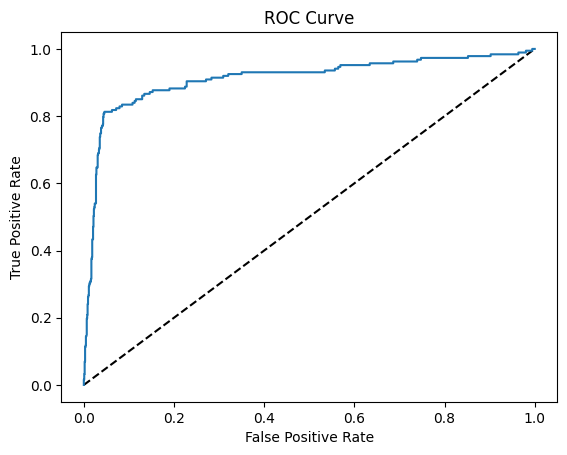

0.9115730090919048
[[1024   50]
 [  35  152]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1074
           1       0.75      0.81      0.78       187

    accuracy                           0.93      1261
   macro avg       0.86      0.88      0.87      1261
weighted avg       0.94      0.93      0.93      1261



In [145]:
 #Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_valid_split, random_rf_vote.predict_proba(reduced_vote_test)[:,1])

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate roc_auc_score
print(roc_auc_score(y_valid_split, random_rf_vote.predict_proba(reduced_vote_test)[:,1]))

# Calculate the confusion matrix
print(confusion_matrix(y_valid_split, random_rf_vote.predict(reduced_vote_test)))

# Calculate the classification report
print(classification_report(y_valid_split, random_rf_vote.predict(reduced_vote_test)))

In [146]:
calculate_profit_metric_2(y_valid_split, random_rf_vote.predict_proba(reduced_vote_test)[:,1], dataset=X_valid_preprocessed)

2.85229

In [147]:
data = {'ID': X_test["id"], 'PRED': random_rf_vote.predict(X_test_preprocessed.loc[:,reduced_vote_test.columns])}

# Create DataFrame from the dictionary
df = pd.DataFrame(data)

# Display the DataFrame
file_path = 'C:\KU Leuven\Advanced Analytics\Assignment\predictions_rf_vote_1.csv'  # Specify the file path where you want to save the CSV file
df.to_csv(file_path, index=False)

# Lennerts Models  RF, XGB, LGB 

## LGB

In [154]:
positive_fraction = y_train_split.sum() / len(y_train_split)
lgb_classifier = lgb.LGBMClassifier(scale_pos_weight=1 / positive_fraction)

In [155]:
lgb_param_dist = {
    'n_estimators': randint(130, 150),  # Adjust bounds based on your preference
    'max_depth': [1, 2, 3, 5],
    'learning_rate': uniform(0.01, 0.05)  # Adjust bounds based on your preference
} 

# Define StratifiedKFold for cross-validation
lgb_grid_search = RandomizedSearchCV(lgb_classifier, lgb_param_dist, scoring={'profit': custom_scorer, 'auc': 'roc_auc'}, refit='profit', verbose=0, cv=5, n_jobs=-1, n_iter=100)


# Fit the GridSearchCV on training data for LightGBM
lgb_grid_search.fit(X_train_preprocessed, y_train_split)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 558, number of negative: 3225
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000957 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2918
[LightGBM] [Info] Number of data points in the train set: 3783, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.147502 -> initscore=-1.754329
[LightGBM] [Info] Start training from score -1.754329


RandomizedSearchCV(cv=5,
                   estimator=LGBMClassifier(scale_pos_weight=6.779569892473118),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002834B3F1EA0>,
                                        'max_depth': [1, 2, 3, 5],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002834CF79060>},
                   refit='profit',
                   scoring={'auc': 'roc_auc',
                            'profit': <function custom_scorer at 0x000002834327E710>})

In [156]:
lgb_grid_search.best_estimator_ 

LGBMClassifier(learning_rate=0.02385607861378539, max_depth=1, n_estimators=134,
               scale_pos_weight=6.779569892473118)

In [163]:
lgb_grid_search.best_estimator_.feature_importances_

array([ 0, 14,  0,  0, 92,  0, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, 16,  0,  0])

In [158]:
best_lgb_model = lgb_grid_search.best_estimator_
best_lgb_model.fit(X_train_preprocessed, y_train_split) 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 558, number of negative: 3225
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000238 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2918
[LightGBM] [Info] Number of data points in the train set: 3783, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.147502 -> initscore=-1.754329
[LightGBM] [Info] Start training from score -1.754329


LGBMClassifier(learning_rate=0.02385607861378539, max_depth=1, n_estimators=134,
               scale_pos_weight=6.779569892473118)

In [159]:
calculate_profit_metric_2(y_valid_split,best_lgb_model.predict_proba(X_valid_preprocessed)[:,1],dataset=X_valid_preprocessed)

3.1950960000000004

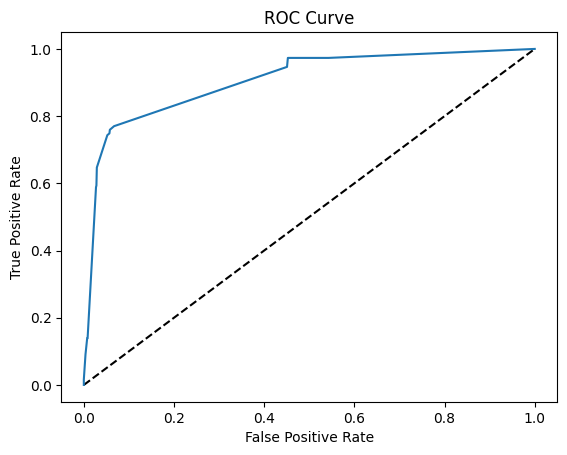

0.9061308118981467
[[1013   61]
 [  47  140]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1074
           1       0.70      0.75      0.72       187

    accuracy                           0.91      1261
   macro avg       0.83      0.85      0.84      1261
weighted avg       0.92      0.91      0.92      1261



In [160]:
 #Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_valid_split, best_lgb_model.predict_proba(X_valid_preprocessed)[:,1])

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate roc_auc_score
print(roc_auc_score(y_valid_split, best_lgb_model.predict_proba(X_valid_preprocessed)[:,1]))

# Calculate the confusion matrix
print(confusion_matrix(y_valid_split, best_lgb_model.predict(X_valid_preprocessed)))

# Calculate the classification report
print(classification_report(y_valid_split, best_lgb_model.predict(X_valid_preprocessed)))

## RF

In [185]:
rf_classifier=RandomForestClassifier(random_state=42, class_weight='balanced')

In [214]:
lgb_param_dist = {
    #'n_estimators': randint(130, 150),  # Adjust bounds based on your preference
    'n_estimators': [130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149],
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 4, 6, 8, 10],  # Adjust bounds based on your preference
} 

# lgb_grid_search = RandomizedSearchCV(rf_classifier, lgb_param_dist, scoring={'profit': custom_scorer}, refit='profit', verbose=0, cv=5, n_jobs=-1, n_iter=100)
lgb_grid_search = GridSearchCV(rf_classifier, lgb_param_dist, scoring={'profit': custom_scorer}, refit='profit', cv=5,verbose=0,n_jobs=-1 )


# Fit the GridSearchCV on training data for LightGBM
lgb_grid_search.fit(X_train_preprocessed, y_train_split)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=3, n_estimators=141,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [130, 131, 132, 133, 134, 135, 136,
                                          137, 138, 139, 140, 141, 142, 143,
                                          144, 145, 146, 147, 148, 149]},
             refit='profit',
             scoring={'profit': <function custom_scorer at 0x000002834327E710>})

In [221]:
lgb_grid_search.best_estimator_
best_lgb_model = lgb_grid_search.best_estimator_

In [216]:
best_lgb_model.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(class_weight='balanced', max_depth=1, n_estimators=143,
                       random_state=42)>

In [219]:
lgb_grid_search.best_score_

4.3388022

In [332]:
rf_classifier=RandomForestClassifier(random_state=42, class_weight='balanced',max_depth=1, min_samples_split= 2, n_estimators= 141)
rf_classifier.fit(X_train_preprocessed,y_train_split)

RandomForestClassifier(class_weight='balanced', max_depth=1, n_estimators=141,
                       random_state=42)

In [333]:
rf_classifier.feature_importances_

array([0.        , 0.14893617, 0.        , 0.0141844 , 0.12765957,
       0.14184397, 0.12765957, 0.0212766 , 0.0070922 , 0.0212766 ,
       0.04964539, 0.05673759, 0.0070922 , 0.19148936, 0.0070922 ,
       0.        , 0.0070922 , 0.        , 0.0212766 , 0.04964539])

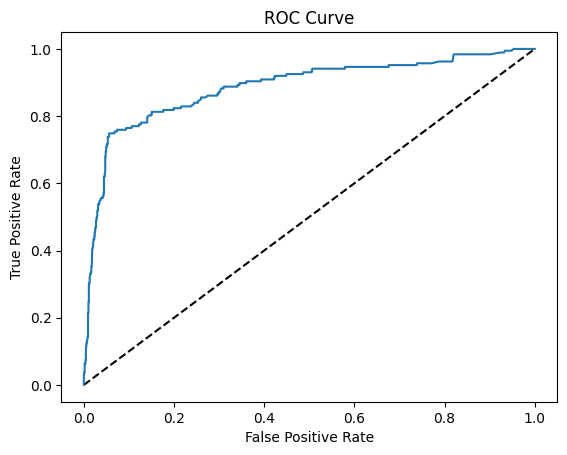

0.8857760981487567
[[1008   66]
 [  47  140]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1074
           1       0.68      0.75      0.71       187

    accuracy                           0.91      1261
   macro avg       0.82      0.84      0.83      1261
weighted avg       0.91      0.91      0.91      1261



In [334]:
 #Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_valid_split, rf_classifier.predict_proba(X_valid_preprocessed)[:,1])

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate roc_auc_score
print(roc_auc_score(y_valid_split, rf_classifier.predict_proba(X_valid_preprocessed)[:,1]))

# Calculate the confusion matrix
print(confusion_matrix(y_valid_split, rf_classifier.predict(X_valid_preprocessed)))

# Calculate the classification report
print(classification_report(y_valid_split, rf_classifier.predict(X_valid_preprocessed)))

In [335]:
calculate_profit_metric_2(y_valid_split, rf_classifier.predict_proba(X_valid_preprocessed)[:,1], dataset=X_valid_preprocessed)

3.0751120000000003

In [336]:
data = {'ID': X_test["id"], 'PRED': rf_classifier.predict_proba(X_test_preprocessed)[:,1]}

# Create DataFrame from the dictionary
df = pd.DataFrame(data)

# Display the DataFrame
file_path = 'C:\KU Leuven\Advanced Analytics\Assignment\predictions_rf_len_3.csv'  # Specify the file path where you want to save the CSV file
df.to_csv(file_path, index=False)

In [ ]:
 #4th	6.348597 0.842554

In [391]:
random_f_best=RandomForestClassifier(random_state=42, class_weight='balanced',max_depth=1, min_samples_split= 2, n_estimators= 141)
random_f_best.fit(X_train_preprocessed,y_train_split)

RandomForestClassifier(class_weight='balanced', max_depth=1, n_estimators=141,
                       random_state=42)

### Feature Importance

In [ ]:
# random_f_best = RandomForestClassifier(bootstrap=True, max_features=1,random_state=7,criterion="gini",n_estimators=70,class_weight='balanced_subsample',max_leaf_nodes=2)

# random_f_best.fit(X_train_preprocessed,y_train_split)

c:\KU Leuven\Advanced Analytics\Assignment\.venv\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: >

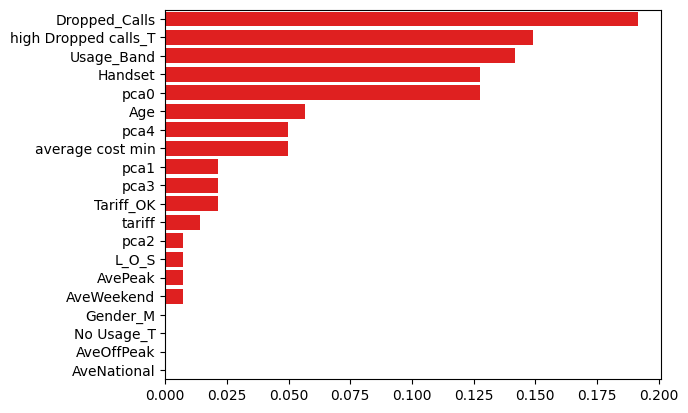

In [392]:
# Feature Importance 

diction = {key: value for key, value in zip(X_valid_preprocessed.columns.values, random_f_best.feature_importances_)}
sorted_dict = dict(sorted(diction.items(), key=lambda item: item[1], reverse=True))

sns.barplot(x=list(sorted_dict.values()),y=list(sorted_dict.keys()),color="red")

In [393]:
sorted_ft = sorted(random_f_best.feature_importances_)
sorted_ft

[0.0,
 0.0,
 0.0,
 0.0,
 0.0070921985815602835,
 0.0070921985815602835,
 0.0070921985815602835,
 0.0070921985815602835,
 0.014184397163120567,
 0.02127659574468085,
 0.02127659574468085,
 0.02127659574468085,
 0.04964539007092199,
 0.04964539007092199,
 0.05673758865248227,
 0.1276595744680851,
 0.1276595744680851,
 0.14184397163120568,
 0.14893617021276595,
 0.19148936170212766]

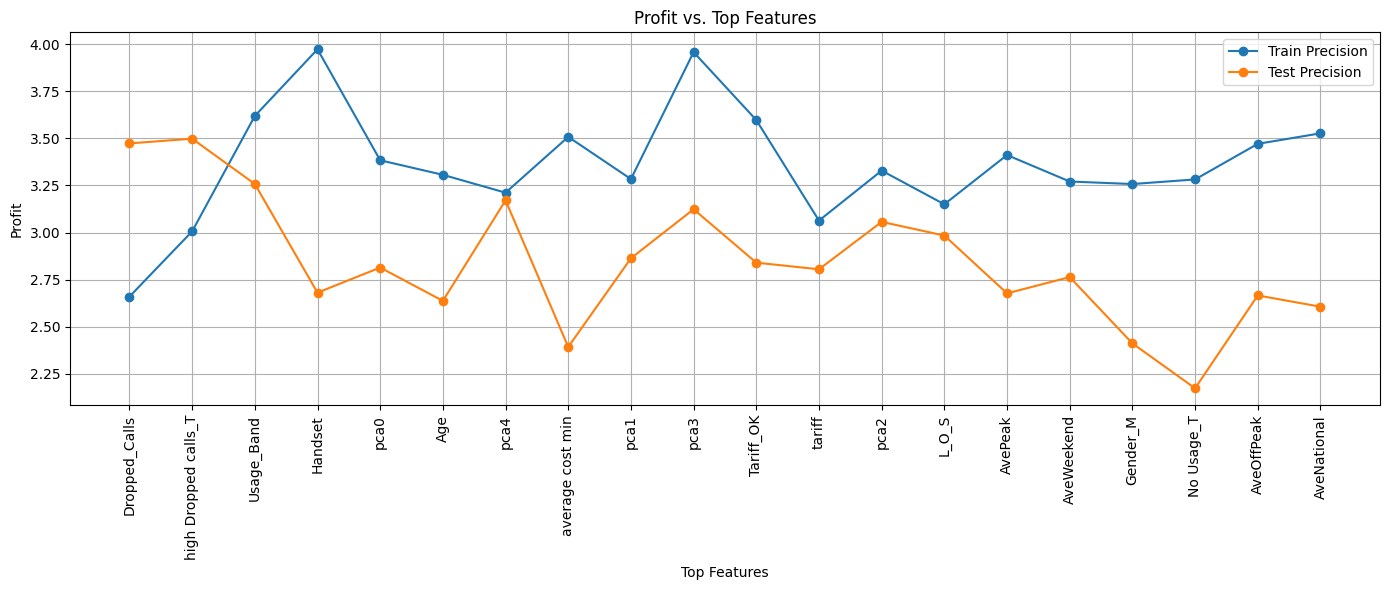

In [340]:
# Get feature importance dictionary
feature_importance_dict = {key: value for key, value in zip(X_train_preprocessed_smote.columns.values, random_f_best.feature_importances_)}
sorted_dict = dict(sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True))

# Initialize lists to store precision scores
train_precision_scores = []
test_precision_scores = []

# Initialize the model
model = RandomForestClassifier()

# Iterate over increasing number of top features
for i in range(1, len(sorted_dict) + 1):
    top_features = list(sorted_dict.keys())[:i]
    
    # Train model using top features
    model.fit(X_train_preprocessed[top_features], y_train_split)
    
    # Predictions on train and test set
    train_pred = model.predict_proba(X_train_preprocessed[top_features])[:,1]
    test_pred = model.predict_proba(X_valid_preprocessed[top_features])[:,1]
    
    # Calculate precision scores
    train_precision = calculate_profit_metric_2(y_train_split, train_pred, dataset=X_train_preprocessed)
    test_precision = calculate_profit_metric_2(y_valid_split, test_pred, dataset=X_valid_preprocessed)
    
    # Append precision scores to lists
    train_precision_scores.append(train_precision)
    test_precision_scores.append(test_precision)

# Plot precision scores
plt.figure(figsize=(14, 6))
plt.plot(list(sorted_dict.keys()), train_precision_scores, label='Train Precision', marker='o')
plt.plot(list(sorted_dict.keys()), test_precision_scores, label='Test Precision', marker='o')
plt.xlabel('Top Features')
plt.ylabel('Profit')
plt.title('Profit vs. Top Features')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

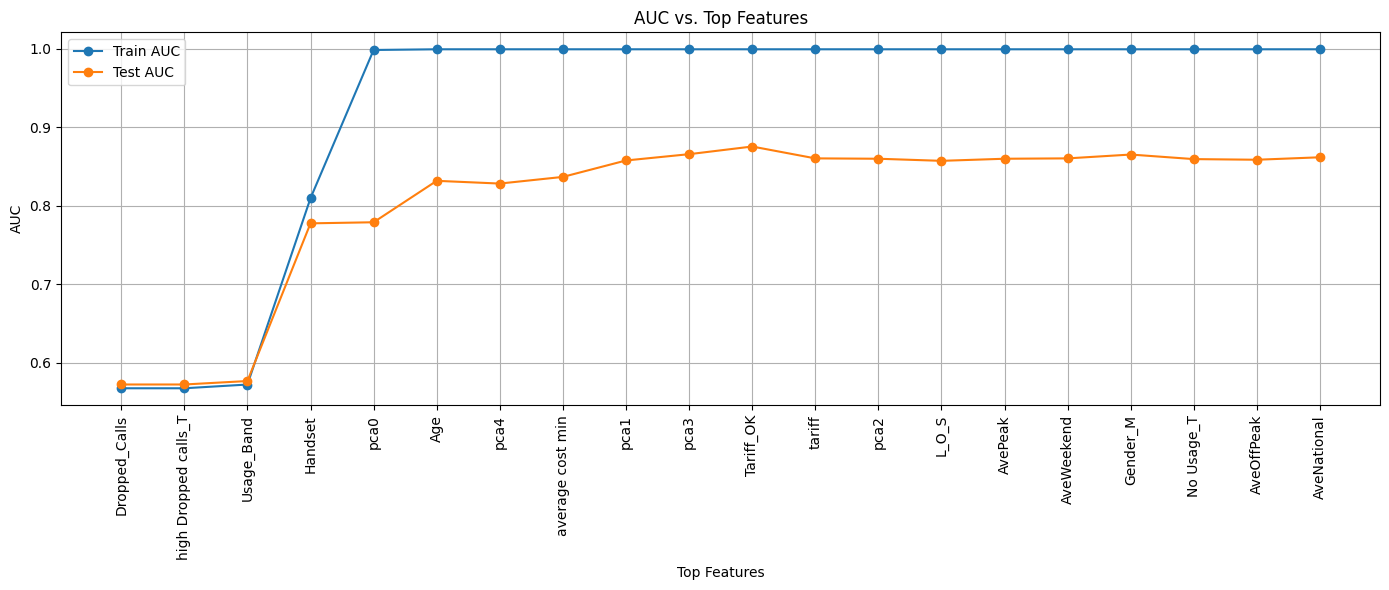

In [341]:
# Get feature importance dictionary
feature_importance_dict = {key: value for key, value in zip(X_train_preprocessed_smote.columns.values, random_f_best.feature_importances_)}
sorted_dict = dict(sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True))

# Initialize lists to store precision scores
train_precision_scores = []
test_precision_scores = []

# Initialize the model
model = RandomForestClassifier()

# Iterate over increasing number of top features
for i in range(1, len(sorted_dict) + 1):
    top_features = list(sorted_dict.keys())[:i]
    
    # Train model using top features
    model.fit(X_train_preprocessed[top_features], y_train_split)
    
    # Predictions on train and test set
    train_pred = model.predict(X_train_preprocessed[top_features])
    test_pred = model.predict(X_valid_preprocessed[top_features])
    
    # Calculate precision scores
    train_precision = roc_auc_score(y_train_split, train_pred)
    test_precision = roc_auc_score(y_valid_split, test_pred)
    
    # Append precision scores to lists
    train_precision_scores.append(train_precision)
    test_precision_scores.append(test_precision)

# Plot precision scores
plt.figure(figsize=(14, 6))
plt.plot(list(sorted_dict.keys()), train_precision_scores, label='Train AUC', marker='o')
plt.plot(list(sorted_dict.keys()), test_precision_scores, label='Test AUC', marker='o')
plt.xlabel('Top Features')
plt.ylabel('AUC')
plt.title('AUC vs. Top Features')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

In [385]:
mask = random_f_best.feature_importances_ > 0.014184397163120567
mask

array([False,  True, False, False,  True,  True,  True,  True, False,
        True,  True,  True, False,  True, False, False, False, False,
        True,  True])

In [386]:
reduced_train = X_train_preprocessed.loc[:,mask]
reduced_test = X_valid_preprocessed.loc[:,mask]
reduced_train.head()

high Dropped calls_T   Handset  Usage_Band      pca0      pca1      pca3  \
0                   0.0 -0.951537   -0.271153 -2.568681  2.103107  0.336637   
1                   0.0  2.982628   -0.271153  0.727921 -1.376481  1.714494   
2                   0.0  0.007327    0.756511 -2.222597 -1.437766 -0.437399   
3                   0.0 -2.908287   -0.271153 -2.209708  3.358562 -0.961110   
4                   0.0 -0.135439   -0.271153 -1.667525 -0.510305 -1.002194   

       pca4       Age  Dropped_Calls  Tariff_OK  average cost min  
0  0.443232  1.479855      -0.198503          1          0.150531  
1  0.402646 -0.491319      -0.491152          1          0.188988  
2  0.605702  2.189477      -0.491152          1          0.221467  
3 -0.250943 -0.491319      -0.491152          1          0.107509  
4  1.142253 -0.333625       1.557391          1          0.162952

In [373]:
reduced_train_new = reduced_train.drop("average cost min",axis=1)
reduced_test_new = reduced_test.drop("average cost min",axis=1)
reduced_train_new.head()

high Dropped calls_T   Handset  Usage_Band      pca0      pca4       Age  \
0                   0.0 -0.951537   -0.271153 -2.568681  0.443232  1.479855   
1                   0.0  2.982628   -0.271153  0.727921  0.402646 -0.491319   
2                   0.0  0.007327    0.756511 -2.222597  0.605702  2.189477   
3                   0.0 -2.908287   -0.271153 -2.209708 -0.250943 -0.491319   
4                   0.0 -0.135439   -0.271153 -1.667525  1.142253 -0.333625   

   Dropped_Calls  
0      -0.198503  
1      -0.491152  
2      -0.491152  
3      -0.491152  
4       1.557391

In [387]:
random_f_best=RandomForestClassifier(random_state=42, class_weight='balanced',max_depth=1, min_samples_split= 2, n_estimators= 141)
random_f_best.fit(reduced_train,y_train_split)

RandomForestClassifier(class_weight='balanced', max_depth=1, n_estimators=141,
                       random_state=42)

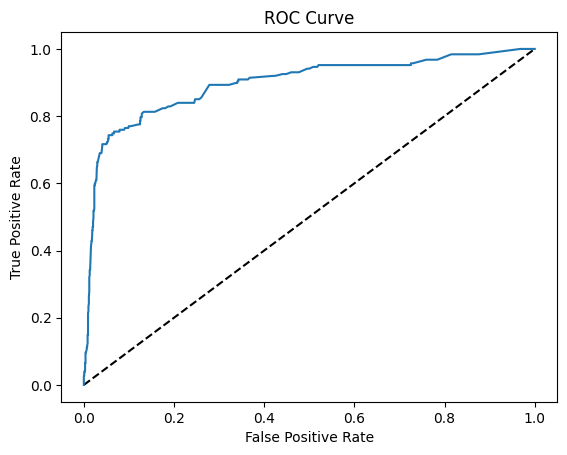

0.8962845676614983
[[1014   60]
 [  48  139]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1074
           1       0.70      0.74      0.72       187

    accuracy                           0.91      1261
   macro avg       0.83      0.84      0.83      1261
weighted avg       0.92      0.91      0.92      1261



In [388]:
 #Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_valid_split, random_f_best.predict_proba(reduced_test)[:,1])

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate roc_auc_score
print(roc_auc_score(y_valid_split, random_f_best.predict_proba(reduced_test)[:,1]))

# Calculate the confusion matrix
print(confusion_matrix(y_valid_split, random_f_best.predict(reduced_test)))

# Calculate the classification report
print(classification_report(y_valid_split, random_f_best.predict(reduced_test)))

In [389]:
calculate_profit_metric_2(y_valid_split, random_f_best.predict_proba(reduced_test)[:,1], dataset=X_valid_preprocessed)


3.063824

In [390]:
data = {'ID': X_test["id"], 'PRED': random_f_best.predict_proba(X_test_preprocessed.loc[:,reduced_test.columns])[:,1]}

# Create DataFrame from the dictionary
df = pd.DataFrame(data)

# Display the DataFrame
file_path = 'C:\KU Leuven\Advanced Analytics\Assignment\predictions_pr_rf_len_3.csv'  # Specify the file path where you want to save the CSV file
df.to_csv(file_path, index=False)

In [ ]:
#
#5th 6.348597 0.842554
#5th 6.348597 0.832859

In [236]:
df

ID  PRED
0     K751808     0
1     K837351     0
2     K548114     0
3     K736156     0
4     K508080     0
...       ...   ...
1677  K588314     0
1678  K826807     0
1679  K982731     0
1680  K623037     0
1681  K883413     0

[1682 rows x 2 columns]

In [211]:
sum(data_test["id"] == X_test["id"])

1682

## XGB

In [171]:
positive_fraction = y_train_split.sum() / len(y_train_split)
xgb_classifier= xgb.XGBClassifier(scale_pos_weight = 1 / positive_fraction, random_state=42)

In [172]:
lgb_param_dist = {
    'n_estimators': randint(130, 150),  # Adjust bounds based on your preference
    'max_depth': [1, 2, 3, 5, 6],
    'learning_rate': uniform(0.01, 0.05) #0.15
} 

lgb_grid_search = RandomizedSearchCV(xgb_classifier, lgb_param_dist, scoring={'profit': custom_scorer}, refit='profit', verbose=0, cv=5, n_jobs=-1, n_iter=100)


# Fit the GridSearchCV on training data for LightGBM
lgb_grid_search.fit(X_train_preprocessed, y_train_split)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           random_state=42, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002834CF7B400>,
                                        'max_depth': [1, 2, 3, 5, 6],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002835056BAF0>},
                   refit='profit',
                   scoring={'profit': <function custom_scorer at 0x000002834327E710>})

In [173]:
lgb_grid_search.best_estimator_
best_lgb_model = lgb_grid_search.best_estimator_

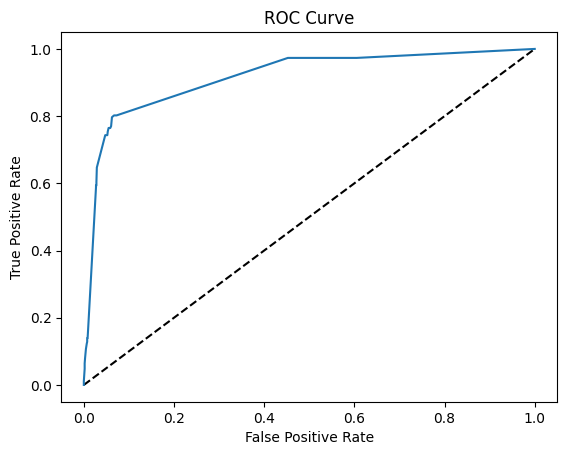

0.9164625220326832
[[1011   63]
 [  44  143]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1074
           1       0.69      0.76      0.73       187

    accuracy                           0.92      1261
   macro avg       0.83      0.85      0.84      1261
weighted avg       0.92      0.92      0.92      1261



In [174]:
 #Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_valid_split, best_lgb_model.predict_proba(X_valid_preprocessed)[:,1])

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate roc_auc_score
print(roc_auc_score(y_valid_split, best_lgb_model.predict_proba(X_valid_preprocessed)[:,1]))

# Calculate the confusion matrix
print(confusion_matrix(y_valid_split, best_lgb_model.predict(X_valid_preprocessed)))

# Calculate the classification report
print(classification_report(y_valid_split, best_lgb_model.predict(X_valid_preprocessed)))

In [49]:
calculate_profit_metric_2(y_valid_split, knn.predict_proba(X_valid_preprocessed)[:,1], dataset=X_valid_preprocessed)

2.3369350000000004

# KNN 

In [42]:
knn = KNeighborsClassifier()

grid_param = {
    "weights" : ["uniform","distance"],
    "n_neighbors" : [3,4,5,6,8],
    "algorithm" : ["auto"]
}

scoring = {"Profit": custom_scorer, "AUC": "roc_auc"}

knn_searcher = GridSearchCV(knn, grid_param, scoring=scoring, refit="Profit", cv=stratified_splitter)
knn_searcher.fit(X_train_preprocessed_smote, y_train_smote)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto'], 'n_neighbors': [3, 4, 5, 6, 8],
                         'weights': ['uniform', 'distance']},
             refit='Profit',
             scoring={'AUC': 'roc_auc',
                      'Profit': <function custom_scorer at 0x0000024FC6F8B250>})

In [43]:
knn_searcher.best_params_

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}

In [44]:
knn = KNeighborsClassifier(algorithm="auto",n_neighbors=5,weights="uniform")
knn.fit(X_train_preprocessed_smote,y_train_smote)

KNeighborsClassifier()

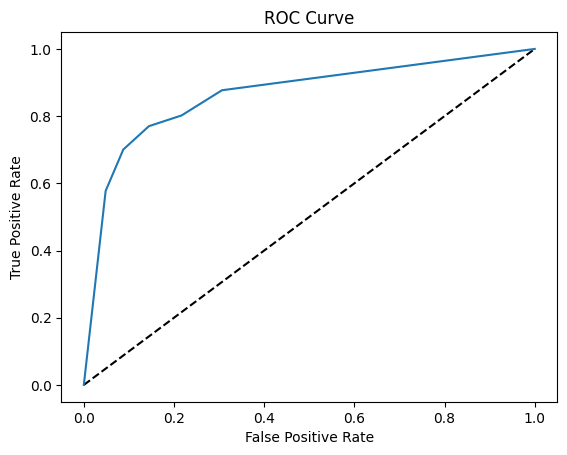

0.8638803413696612
[[919 155]
 [ 43 144]]
              precision    recall  f1-score   support

           0       0.96      0.86      0.90      1074
           1       0.48      0.77      0.59       187

    accuracy                           0.84      1261
   macro avg       0.72      0.81      0.75      1261
weighted avg       0.89      0.84      0.86      1261



In [47]:
 #Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_valid_split, knn.predict_proba(X_valid_preprocessed)[:,1])

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate roc_auc_score
print(roc_auc_score(y_valid_split, knn.predict_proba(X_valid_preprocessed)[:,1]))

# Calculate the confusion matrix
print(confusion_matrix(y_valid_split, knn.predict(X_valid_preprocessed)))

# Calculate the classification report
print(classification_report(y_valid_split, knn.predict(X_valid_preprocessed)))

In [50]:
calculate_profit_metric_2(y_valid_split, knn.predict_proba(X_valid_preprocessed)[:,1], dataset=X_valid_preprocessed)

2.3369350000000004

In [ ]:
data = {'ID': X_test["id"], 'PRED': random_f_best.predict_proba(X_test_preprocessed.loc[:,reduced_test.columns])[:,1]}

# Create DataFrame from the dictionary
df = pd.DataFrame(data)

# Display the DataFrame
file_path = 'C:\KU Leuven\Advanced Analytics\Assignment\predictions_pr_rf_len_3.csv'  # Specify the file path where you want to save the CSV file
df.to_csv(file_path, index=False)

In [ ]:
calculate_profit_metric_3(y_valid_split, lr.predict_proba(X_valid_preprocessed.loc[: ,reduced_test_lasso.columns])[:,1])

In [61]:
# Specify L1 regularization
#liblinear is the optimization method used to estimate the coefficients. liblinear is need for l1

lr = LogisticRegression(random_state=8,max_iter=1000, class_weight="balanced")

param_grid = {
    'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]

}

scoring = {"Profit": custom_scorer, "AUC": "roc_auc"}
# kf = KFold(n_splits=5, shuffle=True, random_state=5)

# Instantiate the GridSearchCV object and run the search
# The GridSeachCV object, when fitted on the data, creates 5-fold splits for every C value and calculates a default scoring metric
searcher_ridge = GridSearchCV(lr, param_grid, cv=stratified_splitter, scoring=scoring, refit="Profit")
searcher_ridge.fit(X_train_preprocessed, y_train_split)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=8),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             refit='Profit',
             scoring={'AUC': 'roc_auc',
                      'Profit': <function custom_scorer at 0x0000024FC6F8B250>})

In [62]:
searcher_ridge.best_params_

{'C': 0.001}

In [63]:
lr = LogisticRegression(random_state=8,C=0.001,class_weight="balanced") 
lr.fit(X_train_preprocessed,y_train_split)

LogisticRegression(C=0.001, class_weight='balanced', random_state=8)

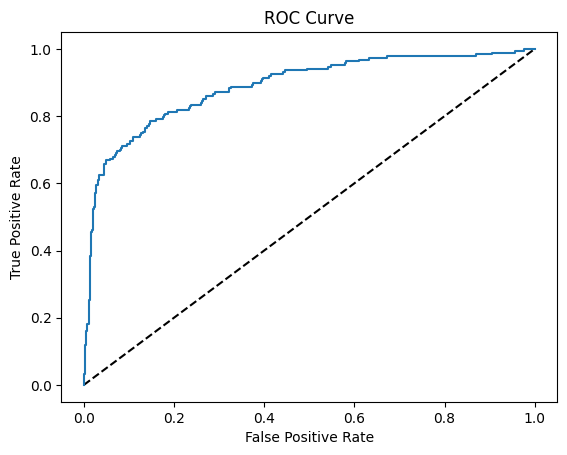

0.8877304095838436
[[947 127]
 [ 49 138]]
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      1074
           1       0.52      0.74      0.61       187

    accuracy                           0.86      1261
   macro avg       0.74      0.81      0.76      1261
weighted avg       0.89      0.86      0.87      1261



In [65]:
 #Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_valid_split, lr.predict_proba(X_valid_preprocessed)[:,1])

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate roc_auc_score
print(roc_auc_score(y_valid_split, lr.predict_proba(X_valid_preprocessed)[:,1]))

# Calculate the confusion matrix
print(confusion_matrix(y_valid_split,  lr.predict(X_valid_preprocessed)))

# Calculate the classification report
print(classification_report(y_valid_split,  lr.predict(X_valid_preprocessed)))

In [66]:
calculate_profit_metric_3(y_valid_split, lr.predict_proba(X_valid_preprocessed)[:,1])

3.745702

In [67]:
data = {'ID': X_test["id"], 'PRED': lr.predict_proba(X_test_preprocessed)[:,1]}

# Create DataFrame from the dictionary
df = pd.DataFrame(data)


# Display the DataFrame
file_path = 'C:\KU Leuven\Advanced Analytics\Assignment\predictions_pr_lr_ridge_2.csv'  # Specify the file path where you want to save the CSV file
df.to_csv(file_path, index=False)

In [ ]:
 #7th	5.242231 0.877079

# ENSEMBLE

In [ ]:
# Best Logistic on the dataset without SMOTE 

In [51]:
# Specify L1 regularization
#liblinear is the optimization method used to estimate the coefficients. liblinear is need for l1
lr = LogisticRegression(solver='liblinear', penalty="l1",random_state=8, class_weight="balanced") 

param_grid = {
    'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]

}

scoring = {"Profit": custom_scorer, "AUC": "roc_auc"}

# Instantiate the GridSearchCV object and run the search
# The GridSeachCV object, when fitted on the data, creates 5-fold splits for every C value and calculates a default scoring metric
searcher_lasso = GridSearchCV(lr, param_grid, cv=stratified_splitter, scoring=scoring, refit="Profit")
searcher_lasso.fit(X_train_preprocessed, y_train_split)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced', penalty='l1',
                                          random_state=8, solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             refit='Profit',
             scoring={'AUC': 'roc_auc',
                      'Profit': <function custom_scorer at 0x0000024FC6F8B250>})

In [52]:
searcher_lasso.best_params_

{'C': 0.1}

In [53]:
lr = LogisticRegression(solver='liblinear', penalty="l1",random_state=8,C=0.1,class_weight="balanced") 
lr.fit(X_train_preprocessed,y_train_split)

LogisticRegression(C=0.1, class_weight='balanced', penalty='l1', random_state=8,
                   solver='liblinear')

In [54]:
lr.coef_

array([[ 0.00000000e+00,  2.06736470e+00,  0.00000000e+00,
         1.24664957e+00,  1.08655091e+00,  7.94576225e-01,
         2.21815767e-03,  1.19466210e-02,  1.85848616e-02,
         9.16861905e-02,  0.00000000e+00, -2.27805620e-01,
        -1.43580419e-01,  9.32193091e-02, -1.61155290e-02,
         2.82513427e-02,  7.81471941e-04,  1.03743489e-02,
        -2.73757859e+00,  0.00000000e+00]])

In [55]:
mask_lasso = abs(lr.coef_) > 0
mask_lasso.shape
mask_lasso = mask_lasso[0]
mask_lasso

array([False,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False])

In [56]:
reduced_train_lasso= X_train_preprocessed.loc[:,mask_lasso]
reduced_test_lasso = X_valid_preprocessed.loc[:,mask_lasso]
reduced_train_lasso.head()

high Dropped calls_T    tariff   Handset  Usage_Band      pca0      pca1  \
0                   0.0  0.421050 -0.951537   -0.271153 -2.568681  2.103107   
1                   0.0 -0.173919  2.982628   -0.271153  0.727921 -1.376481   
3                   0.0 -0.016968  0.007327    0.756511 -2.222597 -1.437766   
4                   0.0 -0.485256 -2.908287   -0.271153 -2.209708  3.358562   
5                   0.0 -0.173919 -0.135439   -0.271153 -1.667525 -0.510305   

       pca2      pca3       Age     L_O_S  Dropped_Calls   AvePeak  \
0 -0.970825  0.336637  1.479855 -0.315520      -0.198503 -0.108087   
1 -0.489993  1.714494 -0.491319  0.917762      -0.491152  0.507529   
3 -2.204695 -0.437399  2.189477 -0.443591      -0.491152  0.220543   
4 -1.820766 -0.961110 -0.491319 -0.868125      -0.491152  4.817387   
5 -0.414703 -1.002194 -0.333625  0.374644       1.557391 -0.115337   

   AveOffPeak  AveWeekend  AveNational  Tariff_OK  
0   -0.148181    1.265743    -0.219327          1  
1   -0.330827    1.851660     0.337205          1  
3   -0.024856   -0.806401     0.195994          1  
4   -0.257835   -0.120450    -0.081423          1  
5   44.515591   -0.283772     0.520425          1

In [57]:
lr.fit(reduced_train_lasso,y_train_split)

LogisticRegression(C=0.1, class_weight='balanced', penalty='l1', random_state=8,
                   solver='liblinear')

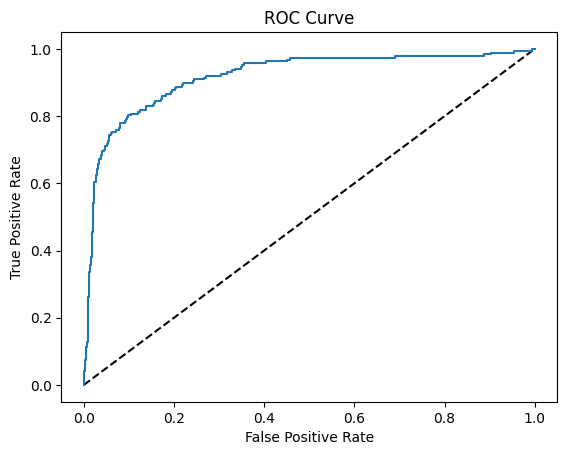

0.9171471534271404
[[980  94]
 [ 41 146]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.94      1074
           1       0.61      0.78      0.68       187

    accuracy                           0.89      1261
   macro avg       0.78      0.85      0.81      1261
weighted avg       0.91      0.89      0.90      1261



In [58]:
 #Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_valid_split, lr.predict_proba(reduced_test_lasso)[:,1])

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate roc_auc_score
print(roc_auc_score(y_valid_split, lr.predict_proba(reduced_test_lasso)[:,1]))

# Calculate the confusion matrix
print(confusion_matrix(y_valid_split,  lr.predict(reduced_test_lasso)))

# Calculate the classification report
print(classification_report(y_valid_split,  lr.predict(reduced_test_lasso)))

In [59]:
calculate_profit_metric_3(y_valid_split, lr.predict_proba(X_valid_preprocessed.loc[: ,reduced_test_lasso.columns])[:,1])

3.013672

In [60]:
data = {'ID': X_test["id"], 'PRED': lr.predict_proba(X_test_preprocessed.loc[:, reduced_test_lasso.columns])[:,1]}

# Create DataFrame from the dictionary
df = pd.DataFrame(data)


# Display the DataFrame
file_path = 'C:\KU Leuven\Advanced Analytics\Assignment\predictions_pr_lr_lasso_2.csv'  # Specify the file path where you want to save the CSV file
df.to_csv(file_path, index=False)

In [ ]:
#10th  4.272663 0.91499

In [68]:
random_mine = RandomForestClassifier(bootstrap=True, max_features=1,random_state=7,criterion="gini",n_estimators=70,class_weight='balanced_subsample',max_leaf_nodes=2)
random_len = RandomForestClassifier(random_state=42, class_weight='balanced',max_depth=1, min_samples_split= 2, n_estimators= 141)
logistic = LogisticRegression(random_state=8,C=0.001,class_weight="balanced") 


classifiers = [('lr', logistic), ('rf_mine', random_mine), ('rf_len', random_len)]

vc = VotingClassifier(estimators=classifiers, voting="hard", n_jobs=-1) 

vc.fit(X_train_preprocessed, y_train_split)  

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.001,
                                                 class_weight='balanced',
                                                 random_state=8)),
                             ('rf_mine',
                              RandomForestClassifier(class_weight='balanced_subsample',
                                                     max_features=1,
                                                     max_leaf_nodes=2,
                                                     n_estimators=70,
                                                     random_state=7)),
                             ('rf_len',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=1,
                                                     n_estimators=141,
                                                     random_state=42))],
                 n_jobs=-1)